In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/AUD_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74258, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,0.70137,0.70112,0.70086,0.70139
2020-01-01 17:15:00,0.70112,0.70095,0.70078,0.70159
2020-01-01 17:30:00,0.70094,0.70079,0.70067,0.70099
2020-01-01 17:45:00,0.70078,0.70060,0.70048,0.70109
2020-01-01 18:00:00,0.70062,0.70182,0.70062,0.70182


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74257, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,0.70137,0.70112,0.70086,0.70139,0.70095,17,2,1,0.00025,0.701125,0.00053,0.701185
2020-01-01 17:15:00,0.70112,0.70095,0.70078,0.70159,0.70079,17,2,1,0.00017,0.701185,0.00081,0.701110
2020-01-01 17:30:00,0.70094,0.70079,0.70067,0.70099,0.70060,17,2,1,0.00015,0.700830,0.00032,0.700848
2020-01-01 17:45:00,0.70078,0.70060,0.70048,0.70109,0.70182,17,2,1,0.00018,0.700785,0.00061,0.700738
2020-01-01 18:00:00,0.70062,0.70182,0.70062,0.70182,0.70168,18,2,1,-0.00120,0.701220,0.00120,0.701220


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,0.70137,0.70112,0.70086,0.70139,0.70095,17,2,1,0.00025,0.701125,0.00053,0.701185,-25.516687
2020-01-01 17:15:00,0.70112,0.70095,0.70078,0.70159,0.70079,17,2,1,0.00017,0.701185,0.00081,0.701110,-25.516582
2020-01-01 17:30:00,0.70094,0.70079,0.70067,0.70099,0.70060,17,2,1,0.00015,0.700830,0.00032,0.700848,-25.516582
2020-01-01 17:45:00,0.70078,0.70060,0.70048,0.70109,0.70182,17,2,1,0.00018,0.700785,0.00061,0.700738,-25.516445
2020-01-01 18:00:00,0.70062,0.70182,0.70062,0.70182,0.70168,18,2,1,-0.00120,0.701220,0.00120,0.701220,-25.516905


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.70137  0.70086  0.70139         0.70095    17    2   
2020-01-01 17:15:00  0.70112  0.70078  0.70159         0.70079    17    2   
2020-01-01 17:30:00  0.70094  0.70067  0.70099         0.70060    17    2   
2020-01-01 17:45:00  0.70078  0.70048  0.70109         0.70182    17    2   
2020-01-01 18:00:00  0.70062  0.70062  0.70182         0.70168    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00025   0.701125  0.00053    0.701185 -25.516687  
2020-01-01 17:15:00     1   0.00017   0.701185  0.00081    0.701110 -25.516582  
2020-01-01 17:30:00     1   0.00015   0.700830  0.00032    0.700848 -25.516582  
2020-01-01 17:45:00     1   0.00018   0.700785  0.00061

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59405
59405
7500
7500
7352
7352


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(59405, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59380, 24, 12)
(7475, 24, 12)
(7327, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59380, 1)
(7475, 1)
(7327, 1)


array([[0.5947361 ],
       [0.593925  ],
       [0.5944116 ],
       ...,
       [0.61659503],
       [0.61890674],
       [0.6258011 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.5947361 , 0.593925  , 0.5944116 , ..., 0.61659503, 0.61890674,
       0.6258011 ], dtype=float32)

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 301.3287 - mae: 3.0017 - mse: 301.3287 - root_mean_squared_error: 17.3588 - mape: 16593.7305
Epoch 1: val_mse improved from inf to 0.10233, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 178s 356ms/step - loss: 301.3287 - mae: 3.0017 - mse: 301.3287 - root_mean_squared_error: 17.3588 - mape: 16593.7305 - val_loss: 0.1023 - val_mae: 0.2789 - val_mse: 0.1023 - val_root_mean_squared_error: 0.3199 - val_mape: 94107.7031
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0345 - mae: 0.1436 - mse: 0.0345 - root_mean_squared_error: 0.1856 - mape: 10835.5986
Epoch 2: val_mse improved from 0.10233 to 0.08793, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 167s 360ms/step - loss: 0.0345 - mae: 0.1436 - mse: 0.0345 - root_mean_squared_error: 0.1856 - mape: 10835.5986 - val_loss: 0.0879 - val_mae: 0.2590 - val_mse: 0.0879 - val_root_mean_squared_error: 0.2965 - val_mape: 89344.2812
Epoch 3/75
464/464 [==============================] - ETA: 0s - loss: 0.0341 - mae: 0.1433 - mse: 0.0341 - root_mean_squared_error: 0.1847 - mape: 11725.7920
Epoch 3: val_mse improved from 0.08793 to 0.08667, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 163s 351ms/step - loss: 0.0341 - mae: 0.1433 - mse: 0.0341 - root_mean_squared_error: 0.1847 - mape: 11725.7920 - val_loss: 0.0867 - val_mae: 0.2572 - val_mse: 0.0867 - val_root_mean_squared_error: 0.2944 - val_mape: 88709.2266
Epoch 4/75
464/464 [==============================] - ETA: 0s - loss: 0.0339 - mae: 0.1432 - mse: 0.0339 - root_mean_squared_error: 0.1842 - mape: 12111.4834
Epoch 4: val_mse did not improve from 0.08667
464/464 [==============================] - 127s 274ms/step - loss: 0.0339 - mae: 0.1432 - mse: 0.0339 - root_mean_squared_error: 0.1842 - mape: 12111.4834 - val_loss: 0.0880 - val_mae: 0.2592 - val_mse: 0.0880 - val_root_mean_squared_error: 0.2967 - val_mape: 88973.8750
Epoch 5/75
464/464 [==============================] - ETA: 0s - loss: 0.0336 - mae: 0.1424 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 10299.0068
Epoch 5: val_mse did not improve from 0.08667
464/464 [==============================] - 124s 26

464/464 [==============================] - 171s 370ms/step - loss: 0.0332 - mae: 0.1413 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 11250.9980 - val_loss: 0.0854 - val_mae: 0.2556 - val_mse: 0.0854 - val_root_mean_squared_error: 0.2922 - val_mape: 87362.6562
Epoch 7/75
464/464 [==============================] - ETA: 0s - loss: 0.0324 - mae: 0.1393 - mse: 0.0324 - root_mean_squared_error: 0.1799 - mape: 11879.4160
Epoch 7: val_mse improved from 0.08535 to 0.08405, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 164s 355ms/step - loss: 0.0324 - mae: 0.1393 - mse: 0.0324 - root_mean_squared_error: 0.1799 - mape: 11879.4160 - val_loss: 0.0840 - val_mae: 0.2537 - val_mse: 0.0840 - val_root_mean_squared_error: 0.2899 - val_mape: 86613.3047
Epoch 8/75
464/464 [==============================] - ETA: 0s - loss: 0.0314 - mae: 0.1374 - mse: 0.0314 - root_mean_squared_error: 0.1771 - mape: 11626.0840
Epoch 8: val_mse improved from 0.08405 to 0.08398, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 168s 362ms/step - loss: 0.0314 - mae: 0.1374 - mse: 0.0314 - root_mean_squared_error: 0.1771 - mape: 11626.0840 - val_loss: 0.0840 - val_mae: 0.2538 - val_mse: 0.0840 - val_root_mean_squared_error: 0.2898 - val_mape: 86038.0703
Epoch 9/75
464/464 [==============================] - ETA: 0s - loss: 0.0298 - mae: 0.1336 - mse: 0.0298 - root_mean_squared_error: 0.1726 - mape: 11253.8369
Epoch 9: val_mse improved from 0.08398 to 0.07774, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 169s 365ms/step - loss: 0.0298 - mae: 0.1336 - mse: 0.0298 - root_mean_squared_error: 0.1726 - mape: 11253.8369 - val_loss: 0.0777 - val_mae: 0.2447 - val_mse: 0.0777 - val_root_mean_squared_error: 0.2788 - val_mape: 82576.4062
Epoch 10/75
464/464 [==============================] - ETA: 0s - loss: 0.0255 - mae: 0.1242 - mse: 0.0255 - root_mean_squared_error: 0.1596 - mape: 9587.2197
Epoch 10: val_mse improved from 0.07774 to 0.05724, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 167s 359ms/step - loss: 0.0255 - mae: 0.1242 - mse: 0.0255 - root_mean_squared_error: 0.1596 - mape: 9587.2197 - val_loss: 0.0572 - val_mae: 0.2099 - val_mse: 0.0572 - val_root_mean_squared_error: 0.2393 - val_mape: 72345.9922
Epoch 11/75
464/464 [==============================] - ETA: 0s - loss: 0.0182 - mae: 0.1059 - mse: 0.0182 - root_mean_squared_error: 0.1348 - mape: 8775.9590
Epoch 11: val_mse improved from 0.05724 to 0.02682, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 169s 364ms/step - loss: 0.0182 - mae: 0.1059 - mse: 0.0182 - root_mean_squared_error: 0.1348 - mape: 8775.9590 - val_loss: 0.0268 - val_mae: 0.1392 - val_mse: 0.0268 - val_root_mean_squared_error: 0.1638 - val_mape: 55978.0430
Epoch 12/75
464/464 [==============================] - ETA: 0s - loss: 0.0107 - mae: 0.0810 - mse: 0.0107 - root_mean_squared_error: 0.1034 - mape: 6362.5708
Epoch 12: val_mse improved from 0.02682 to 0.00984, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 169s 365ms/step - loss: 0.0107 - mae: 0.0810 - mse: 0.0107 - root_mean_squared_error: 0.1034 - mape: 6362.5708 - val_loss: 0.0098 - val_mae: 0.0769 - val_mse: 0.0098 - val_root_mean_squared_error: 0.0992 - val_mape: 42592.4883
Epoch 13/75
464/464 [==============================] - ETA: 0s - loss: 0.0066 - mae: 0.0640 - mse: 0.0066 - root_mean_squared_error: 0.0813 - mape: 5527.6260
Epoch 13: val_mse improved from 0.00984 to 0.00671, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 166s 359ms/step - loss: 0.0066 - mae: 0.0640 - mse: 0.0066 - root_mean_squared_error: 0.0813 - mape: 5527.6260 - val_loss: 0.0067 - val_mae: 0.0622 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0819 - val_mape: 37472.4609
Epoch 14/75
464/464 [==============================] - ETA: 0s - loss: 0.0054 - mae: 0.0579 - mse: 0.0054 - root_mean_squared_error: 0.0735 - mape: 4426.7549
Epoch 14: val_mse improved from 0.00671 to 0.00499, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 172s 370ms/step - loss: 0.0054 - mae: 0.0579 - mse: 0.0054 - root_mean_squared_error: 0.0735 - mape: 4426.7549 - val_loss: 0.0050 - val_mae: 0.0526 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0706 - val_mape: 34837.0508
Epoch 15/75
464/464 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0530 - mse: 0.0045 - root_mean_squared_error: 0.0674 - mape: 4013.2822
Epoch 15: val_mse improved from 0.00499 to 0.00431, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 166s 359ms/step - loss: 0.0045 - mae: 0.0530 - mse: 0.0045 - root_mean_squared_error: 0.0674 - mape: 4013.2822 - val_loss: 0.0043 - val_mae: 0.0483 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0657 - val_mape: 33837.1055
Epoch 16/75
464/464 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0486 - mse: 0.0038 - root_mean_squared_error: 0.0620 - mape: 4525.0601
Epoch 16: val_mse improved from 0.00431 to 0.00368, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 171s 368ms/step - loss: 0.0038 - mae: 0.0486 - mse: 0.0038 - root_mean_squared_error: 0.0620 - mape: 4525.0601 - val_loss: 0.0037 - val_mae: 0.0437 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0606 - val_mape: 32856.0156
Epoch 17/75
464/464 [==============================] - ETA: 0s - loss: 0.0032 - mae: 0.0444 - mse: 0.0032 - root_mean_squared_error: 0.0565 - mape: 4343.2534
Epoch 17: val_mse improved from 0.00368 to 0.00330, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 173s 373ms/step - loss: 0.0032 - mae: 0.0444 - mse: 0.0032 - root_mean_squared_error: 0.0565 - mape: 4343.2534 - val_loss: 0.0033 - val_mae: 0.0415 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0574 - val_mape: 31812.6270
Epoch 18/75
464/464 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0404 - mse: 0.0027 - root_mean_squared_error: 0.0518 - mape: 4789.9229
Epoch 18: val_mse improved from 0.00330 to 0.00303, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 169s 365ms/step - loss: 0.0027 - mae: 0.0404 - mse: 0.0027 - root_mean_squared_error: 0.0518 - mape: 4789.9229 - val_loss: 0.0030 - val_mae: 0.0405 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0551 - val_mape: 30380.3906
Epoch 19/75
464/464 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0372 - mse: 0.0023 - root_mean_squared_error: 0.0478 - mape: 3399.6389
Epoch 19: val_mse improved from 0.00303 to 0.00247, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 172s 372ms/step - loss: 0.0023 - mae: 0.0372 - mse: 0.0023 - root_mean_squared_error: 0.0478 - mape: 3399.6389 - val_loss: 0.0025 - val_mae: 0.0359 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0497 - val_mape: 28702.2656
Epoch 20/75
464/464 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0341 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 3339.0667
Epoch 20: val_mse improved from 0.00247 to 0.00246, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 171s 368ms/step - loss: 0.0019 - mae: 0.0341 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 3339.0667 - val_loss: 0.0025 - val_mae: 0.0366 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0496 - val_mape: 28255.5020
Epoch 21/75
464/464 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0315 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 3594.4077
Epoch 21: val_mse improved from 0.00246 to 0.00237, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 167s 361ms/step - loss: 0.0016 - mae: 0.0315 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 3594.4077 - val_loss: 0.0024 - val_mae: 0.0362 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0487 - val_mape: 27496.6426
Epoch 22/75
464/464 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0290 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 3505.4756
Epoch 22: val_mse did not improve from 0.00237
464/464 [==============================] - 130s 281ms/step - loss: 0.0014 - mae: 0.0290 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 3505.4756 - val_loss: 0.0024 - val_mae: 0.0366 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0493 - val_mape: 27499.2285
Epoch 23/75
464/464 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0274 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 3231.6370
Epoch 23: val_mse improved from 0.00237 to 0.00236, saving model to /content/drive/MyDrive/modelw

464/464 [==============================] - 167s 361ms/step - loss: 0.0012 - mae: 0.0274 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 3231.6370 - val_loss: 0.0024 - val_mae: 0.0366 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0486 - val_mape: 26526.7129
Epoch 24/75
464/464 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 3326.0464
Epoch 24: val_mse improved from 0.00236 to 0.00209, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 171s 369ms/step - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 3326.0464 - val_loss: 0.0021 - val_mae: 0.0337 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0457 - val_mape: 25949.6543
Epoch 25/75
464/464 [==============================] - ETA: 0s - loss: 8.4678e-04 - mae: 0.0224 - mse: 8.4678e-04 - root_mean_squared_error: 0.0291 - mape: 2923.0715
Epoch 25: val_mse improved from 0.00209 to 0.00183, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 170s 366ms/step - loss: 8.4678e-04 - mae: 0.0224 - mse: 8.4678e-04 - root_mean_squared_error: 0.0291 - mape: 2923.0715 - val_loss: 0.0018 - val_mae: 0.0318 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0428 - val_mape: 24292.0586
Epoch 26/75
464/464 [==============================] - ETA: 0s - loss: 7.2750e-04 - mae: 0.0208 - mse: 7.2750e-04 - root_mean_squared_error: 0.0270 - mape: 2647.5046
Epoch 26: val_mse improved from 0.00183 to 0.00164, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 170s 367ms/step - loss: 7.2750e-04 - mae: 0.0208 - mse: 7.2750e-04 - root_mean_squared_error: 0.0270 - mape: 2647.5046 - val_loss: 0.0016 - val_mae: 0.0299 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0405 - val_mape: 23368.1660
Epoch 27/75
464/464 [==============================] - ETA: 0s - loss: 6.2828e-04 - mae: 0.0193 - mse: 6.2828e-04 - root_mean_squared_error: 0.0251 - mape: 2914.4136
Epoch 27: val_mse did not improve from 0.00164
464/464 [==============================] - 130s 280ms/step - loss: 6.2828e-04 - mae: 0.0193 - mse: 6.2828e-04 - root_mean_squared_error: 0.0251 - mape: 2914.4136 - val_loss: 0.0017 - val_mae: 0.0305 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0409 - val_mape: 22755.0762
Epoch 28/75
464/464 [==============================] - ETA: 0s - loss: 5.5316e-04 - mae: 0.0182 - mse: 5.5316e-04 - root_mean_squared_error: 0.0235 - mape: 2616.5190
Epoch 28: val_mse improved from 0.00164 to 0.00146, saving model 

464/464 [==============================] - 169s 365ms/step - loss: 5.5316e-04 - mae: 0.0182 - mse: 5.5316e-04 - root_mean_squared_error: 0.0235 - mape: 2616.5190 - val_loss: 0.0015 - val_mae: 0.0284 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0382 - val_mape: 21573.9824
Epoch 29/75
464/464 [==============================] - ETA: 0s - loss: 4.6189e-04 - mae: 0.0167 - mse: 4.6189e-04 - root_mean_squared_error: 0.0215 - mape: 2720.9951
Epoch 29: val_mse did not improve from 0.00146
464/464 [==============================] - 132s 284ms/step - loss: 4.6189e-04 - mae: 0.0167 - mse: 4.6189e-04 - root_mean_squared_error: 0.0215 - mape: 2720.9951 - val_loss: 0.0015 - val_mae: 0.0292 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0390 - val_mape: 21929.8477
Epoch 30/75
464/464 [==============================] - ETA: 0s - loss: 3.9697e-04 - mae: 0.0154 - mse: 3.9697e-04 - root_mean_squared_error: 0.0199 - mape: 2525.9353
Epoch 30: val_mse improved from 0.00146 to 0.00145, saving model 

464/464 [==============================] - 171s 369ms/step - loss: 3.9697e-04 - mae: 0.0154 - mse: 3.9697e-04 - root_mean_squared_error: 0.0199 - mape: 2525.9353 - val_loss: 0.0014 - val_mae: 0.0285 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0380 - val_mape: 21183.4902
Epoch 31/75
464/464 [==============================] - ETA: 0s - loss: 3.6821e-04 - mae: 0.0149 - mse: 3.6821e-04 - root_mean_squared_error: 0.0192 - mape: 2588.2034
Epoch 31: val_mse improved from 0.00145 to 0.00132, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 169s 365ms/step - loss: 3.6821e-04 - mae: 0.0149 - mse: 3.6821e-04 - root_mean_squared_error: 0.0192 - mape: 2588.2034 - val_loss: 0.0013 - val_mae: 0.0269 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 20992.4219
Epoch 32/75
464/464 [==============================] - ETA: 0s - loss: 3.2138e-04 - mae: 0.0139 - mse: 3.2138e-04 - root_mean_squared_error: 0.0179 - mape: 2524.6323
Epoch 32: val_mse improved from 0.00132 to 0.00118, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 169s 365ms/step - loss: 3.2138e-04 - mae: 0.0139 - mse: 3.2138e-04 - root_mean_squared_error: 0.0179 - mape: 2524.6323 - val_loss: 0.0012 - val_mae: 0.0255 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0343 - val_mape: 19887.5781
Epoch 33/75
464/464 [==============================] - ETA: 0s - loss: 2.7634e-04 - mae: 0.0129 - mse: 2.7634e-04 - root_mean_squared_error: 0.0166 - mape: 2646.5913
Epoch 33: val_mse improved from 0.00118 to 0.00117, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 166s 357ms/step - loss: 2.7634e-04 - mae: 0.0129 - mse: 2.7634e-04 - root_mean_squared_error: 0.0166 - mape: 2646.5913 - val_loss: 0.0012 - val_mae: 0.0258 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0341 - val_mape: 19010.8203
Epoch 34/75
464/464 [==============================] - ETA: 0s - loss: 2.7347e-04 - mae: 0.0129 - mse: 2.7347e-04 - root_mean_squared_error: 0.0165 - mape: 2515.4902
Epoch 34: val_mse improved from 0.00117 to 0.00099, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 168s 363ms/step - loss: 2.7347e-04 - mae: 0.0129 - mse: 2.7347e-04 - root_mean_squared_error: 0.0165 - mape: 2515.4902 - val_loss: 9.8678e-04 - val_mae: 0.0236 - val_mse: 9.8678e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 17593.0977
Epoch 35/75
464/464 [==============================] - ETA: 0s - loss: 2.4409e-04 - mae: 0.0122 - mse: 2.4409e-04 - root_mean_squared_error: 0.0156 - mape: 2037.7899
Epoch 35: val_mse did not improve from 0.00099
464/464 [==============================] - 130s 281ms/step - loss: 2.4409e-04 - mae: 0.0122 - mse: 2.4409e-04 - root_mean_squared_error: 0.0156 - mape: 2037.7899 - val_loss: 0.0011 - val_mae: 0.0249 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0325 - val_mape: 16648.2051
Epoch 36/75
464/464 [==============================] - ETA: 0s - loss: 2.3765e-04 - mae: 0.0120 - mse: 2.3765e-04 - root_mean_squared_error: 0.0154 - mape: 2039.8867
Epoch 36: val_mse improved from 0.00099 to 0.00097, savin

464/464 [==============================] - 166s 357ms/step - loss: 2.3765e-04 - mae: 0.0120 - mse: 2.3765e-04 - root_mean_squared_error: 0.0154 - mape: 2039.8867 - val_loss: 9.7235e-04 - val_mae: 0.0238 - val_mse: 9.7235e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 16543.3516
Epoch 37/75
464/464 [==============================] - ETA: 0s - loss: 1.8385e-04 - mae: 0.0105 - mse: 1.8385e-04 - root_mean_squared_error: 0.0136 - mape: 2080.4495
Epoch 37: val_mse did not improve from 0.00097
464/464 [==============================] - 130s 281ms/step - loss: 1.8385e-04 - mae: 0.0105 - mse: 1.8385e-04 - root_mean_squared_error: 0.0136 - mape: 2080.4495 - val_loss: 0.0010 - val_mae: 0.0245 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0317 - val_mape: 15769.6104
Epoch 38/75
464/464 [==============================] - ETA: 0s - loss: 2.0407e-04 - mae: 0.0112 - mse: 2.0407e-04 - root_mean_squared_error: 0.0143 - mape: 2056.9441
Epoch 38: val_mse did not improve from 0.00097
464/464 [=

464/464 [==============================] - 169s 364ms/step - loss: 1.8738e-04 - mae: 0.0107 - mse: 1.8738e-04 - root_mean_squared_error: 0.0137 - mape: 1865.6957 - val_loss: 7.6196e-04 - val_mae: 0.0207 - val_mse: 7.6196e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 15211.4072
Epoch 40/75
464/464 [==============================] - ETA: 0s - loss: 1.8835e-04 - mae: 0.0108 - mse: 1.8835e-04 - root_mean_squared_error: 0.0137 - mape: 1799.0587
Epoch 40: val_mse improved from 0.00076 to 0.00072, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 173s 373ms/step - loss: 1.8835e-04 - mae: 0.0108 - mse: 1.8835e-04 - root_mean_squared_error: 0.0137 - mape: 1799.0587 - val_loss: 7.2204e-04 - val_mae: 0.0202 - val_mse: 7.2204e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 14931.1982
Epoch 41/75
464/464 [==============================] - ETA: 0s - loss: 1.6619e-04 - mae: 0.0101 - mse: 1.6619e-04 - root_mean_squared_error: 0.0129 - mape: 2047.9153
Epoch 41: val_mse did not improve from 0.00072
464/464 [==============================] - 128s 275ms/step - loss: 1.6619e-04 - mae: 0.0101 - mse: 1.6619e-04 - root_mean_squared_error: 0.0129 - mape: 2047.9153 - val_loss: 8.7980e-04 - val_mae: 0.0233 - val_mse: 8.7980e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 14554.3281
Epoch 42/75
464/464 [==============================] - ETA: 0s - loss: 1.6509e-04 - mae: 0.0101 - mse: 1.6509e-04 - root_mean_squared_error: 0.0128 - mape: 1870.6902
Epoch 42: val_mse did not improve from 0.00072
46

464/464 [==============================] - 165s 356ms/step - loss: 1.8427e-04 - mae: 0.0105 - mse: 1.8427e-04 - root_mean_squared_error: 0.0136 - mape: 1773.5088 - val_loss: 6.0045e-04 - val_mae: 0.0183 - val_mse: 6.0045e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 14112.1807
Epoch 44/75
464/464 [==============================] - ETA: 0s - loss: 1.6177e-04 - mae: 0.0100 - mse: 1.6177e-04 - root_mean_squared_error: 0.0127 - mape: 1796.7610
Epoch 44: val_mse did not improve from 0.00060
464/464 [==============================] - 128s 277ms/step - loss: 1.6177e-04 - mae: 0.0100 - mse: 1.6177e-04 - root_mean_squared_error: 0.0127 - mape: 1796.7610 - val_loss: 6.7745e-04 - val_mae: 0.0201 - val_mse: 6.7745e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 13720.8691
Epoch 45/75
464/464 [==============================] - ETA: 0s - loss: 1.5245e-04 - mae: 0.0098 - mse: 1.5245e-04 - root_mean_squared_error: 0.0123 - mape: 1761.7350
Epoch 45: val_mse did not improve from 0.00060
46

464/464 [==============================] - 165s 356ms/step - loss: 1.1696e-04 - mae: 0.0085 - mse: 1.1696e-04 - root_mean_squared_error: 0.0108 - mape: 1843.8003 - val_loss: 5.2429e-04 - val_mae: 0.0170 - val_mse: 5.2429e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 12974.7051
Epoch 49/75
464/464 [==============================] - ETA: 0s - loss: 1.3336e-04 - mae: 0.0092 - mse: 1.3336e-04 - root_mean_squared_error: 0.0115 - mape: 1516.0414
Epoch 49: val_mse improved from 0.00052 to 0.00052, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 168s 362ms/step - loss: 1.3336e-04 - mae: 0.0092 - mse: 1.3336e-04 - root_mean_squared_error: 0.0115 - mape: 1516.0414 - val_loss: 5.1754e-04 - val_mae: 0.0161 - val_mse: 5.1754e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 13068.0615
Epoch 50/75
464/464 [==============================] - ETA: 0s - loss: 1.1684e-04 - mae: 0.0085 - mse: 1.1684e-04 - root_mean_squared_error: 0.0108 - mape: 1608.4019
Epoch 50: val_mse did not improve from 0.00052
464/464 [==============================] - 126s 271ms/step - loss: 1.1684e-04 - mae: 0.0085 - mse: 1.1684e-04 - root_mean_squared_error: 0.0108 - mape: 1608.4019 - val_loss: 7.7201e-04 - val_mae: 0.0226 - val_mse: 7.7201e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 12549.7051
Epoch 51/75
464/464 [==============================] - ETA: 0s - loss: 1.1705e-04 - mae: 0.0084 - mse: 1.1705e-04 - root_mean_squared_error: 0.0108 - mape: 1649.0961
Epoch 51: val_mse did not improve from 0.00052
46

464/464 [==============================] - 167s 360ms/step - loss: 9.2473e-05 - mae: 0.0075 - mse: 9.2473e-05 - root_mean_squared_error: 0.0096 - mape: 1738.2192 - val_loss: 4.7504e-04 - val_mae: 0.0166 - val_mse: 4.7504e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 12115.2021
Epoch 53/75
464/464 [==============================] - ETA: 0s - loss: 9.7063e-05 - mae: 0.0077 - mse: 9.7063e-05 - root_mean_squared_error: 0.0099 - mape: 1492.1500
Epoch 53: val_mse did not improve from 0.00048
464/464 [==============================] - 126s 272ms/step - loss: 9.7063e-05 - mae: 0.0077 - mse: 9.7063e-05 - root_mean_squared_error: 0.0099 - mape: 1492.1500 - val_loss: 6.6165e-04 - val_mae: 0.0213 - val_mse: 6.6165e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 11808.8340
Epoch 54/75
464/464 [==============================] - ETA: 0s - loss: 9.6550e-05 - mae: 0.0076 - mse: 9.6550e-05 - root_mean_squared_error: 0.0098 - mape: 1489.3123
Epoch 54: val_mse did not improve from 0.00048
46

464/464 [==============================] - 167s 361ms/step - loss: 5.7079e-05 - mae: 0.0060 - mse: 5.7079e-05 - root_mean_squared_error: 0.0076 - mape: 1089.1838 - val_loss: 4.7433e-04 - val_mae: 0.0182 - val_mse: 4.7433e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 8496.2998
Epoch 69/75
464/464 [==============================] - ETA: 0s - loss: 4.8880e-05 - mae: 0.0055 - mse: 4.8880e-05 - root_mean_squared_error: 0.0070 - mape: 1107.0417
Epoch 69: val_mse improved from 0.00047 to 0.00045, saving model to /content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM


464/464 [==============================] - 175s 376ms/step - loss: 4.8880e-05 - mae: 0.0055 - mse: 4.8880e-05 - root_mean_squared_error: 0.0070 - mape: 1107.0417 - val_loss: 4.5033e-04 - val_mae: 0.0176 - val_mse: 4.5033e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 8023.9126
Epoch 70/75
464/464 [==============================] - ETA: 0s - loss: 6.7347e-05 - mae: 0.0064 - mse: 6.7347e-05 - root_mean_squared_error: 0.0082 - mape: 992.7915
Epoch 70: val_mse did not improve from 0.00045
464/464 [==============================] - 130s 280ms/step - loss: 6.7347e-05 - mae: 0.0064 - mse: 6.7347e-05 - root_mean_squared_error: 0.0082 - mape: 992.7915 - val_loss: 5.0587e-04 - val_mae: 0.0189 - val_mse: 5.0587e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 10036.1797
Epoch 71/75
464/464 [==============================] - ETA: 0s - loss: 5.3721e-05 - mae: 0.0053 - mse: 5.3721e-05 - root_mean_squared_error: 0.0073 - mape: 957.9706
Epoch 71: val_mse did not improve from 0.00045
464/46

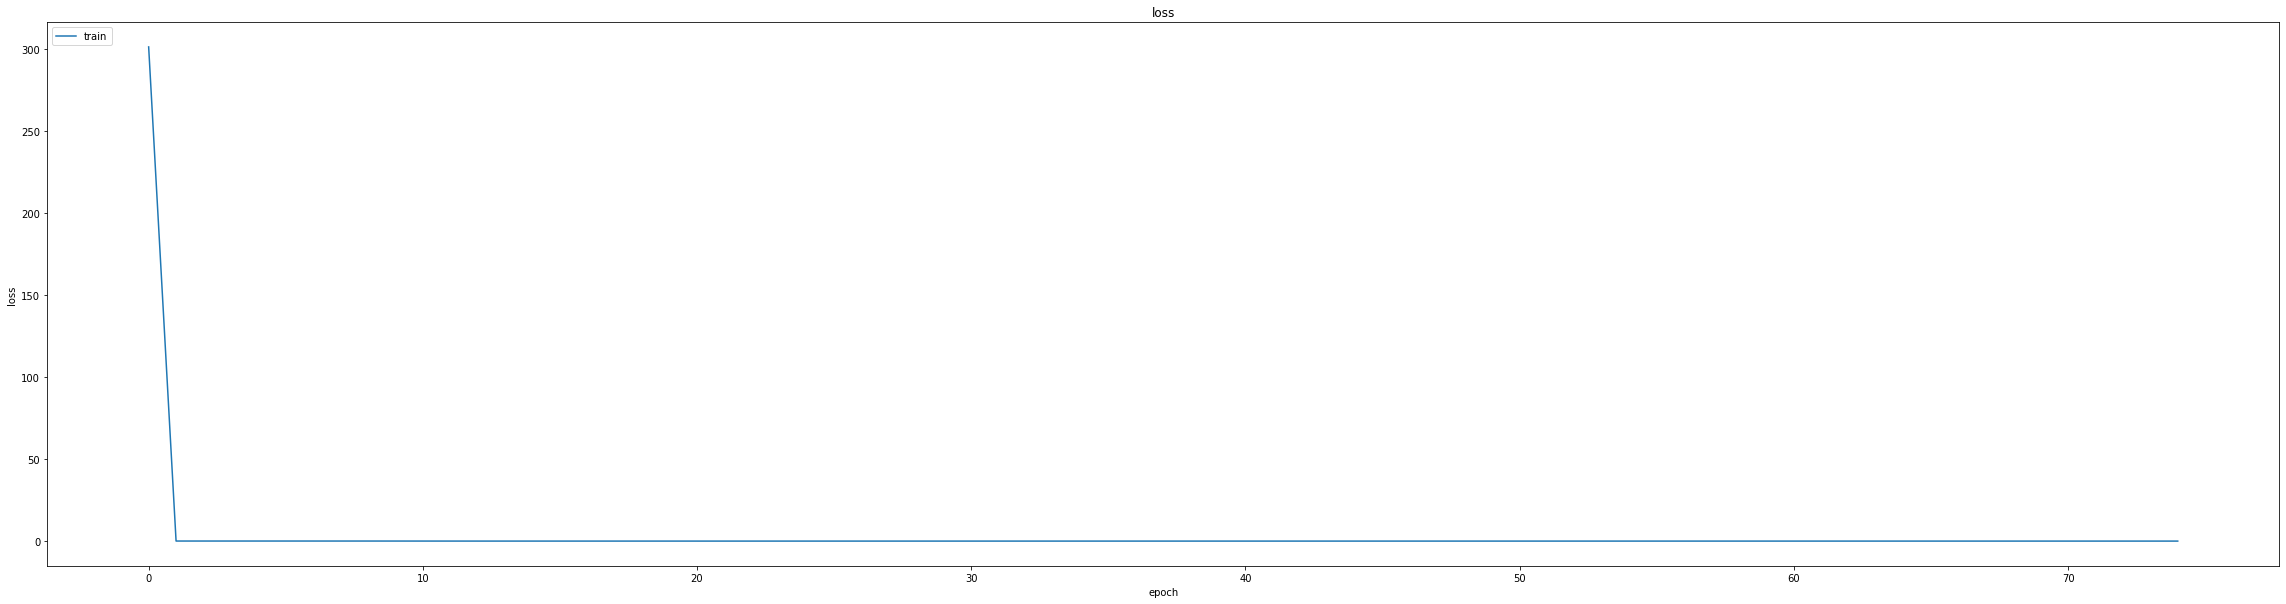

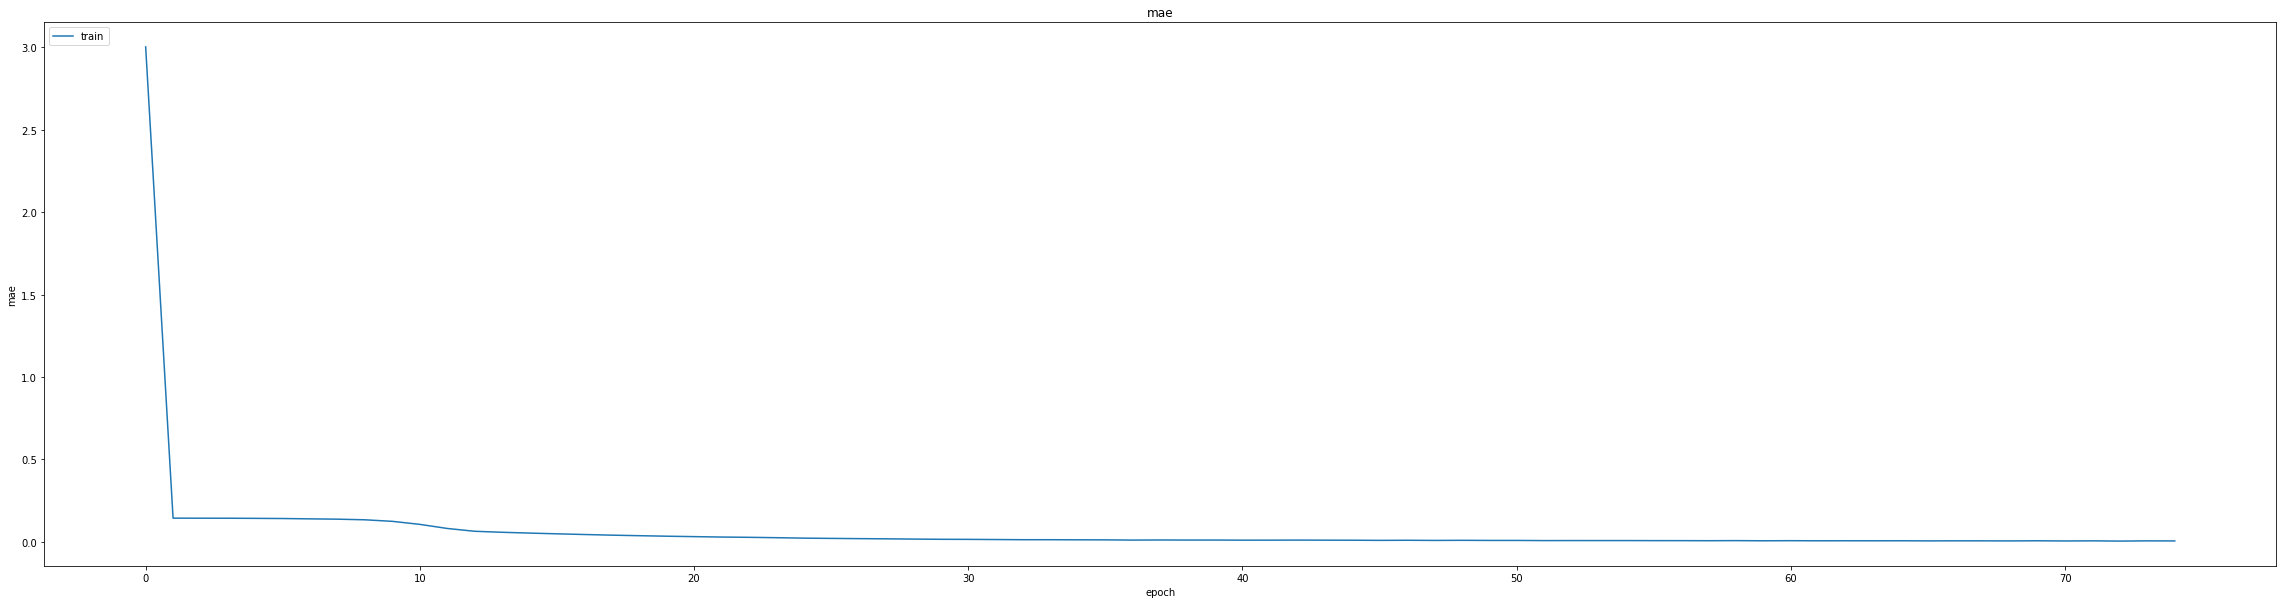

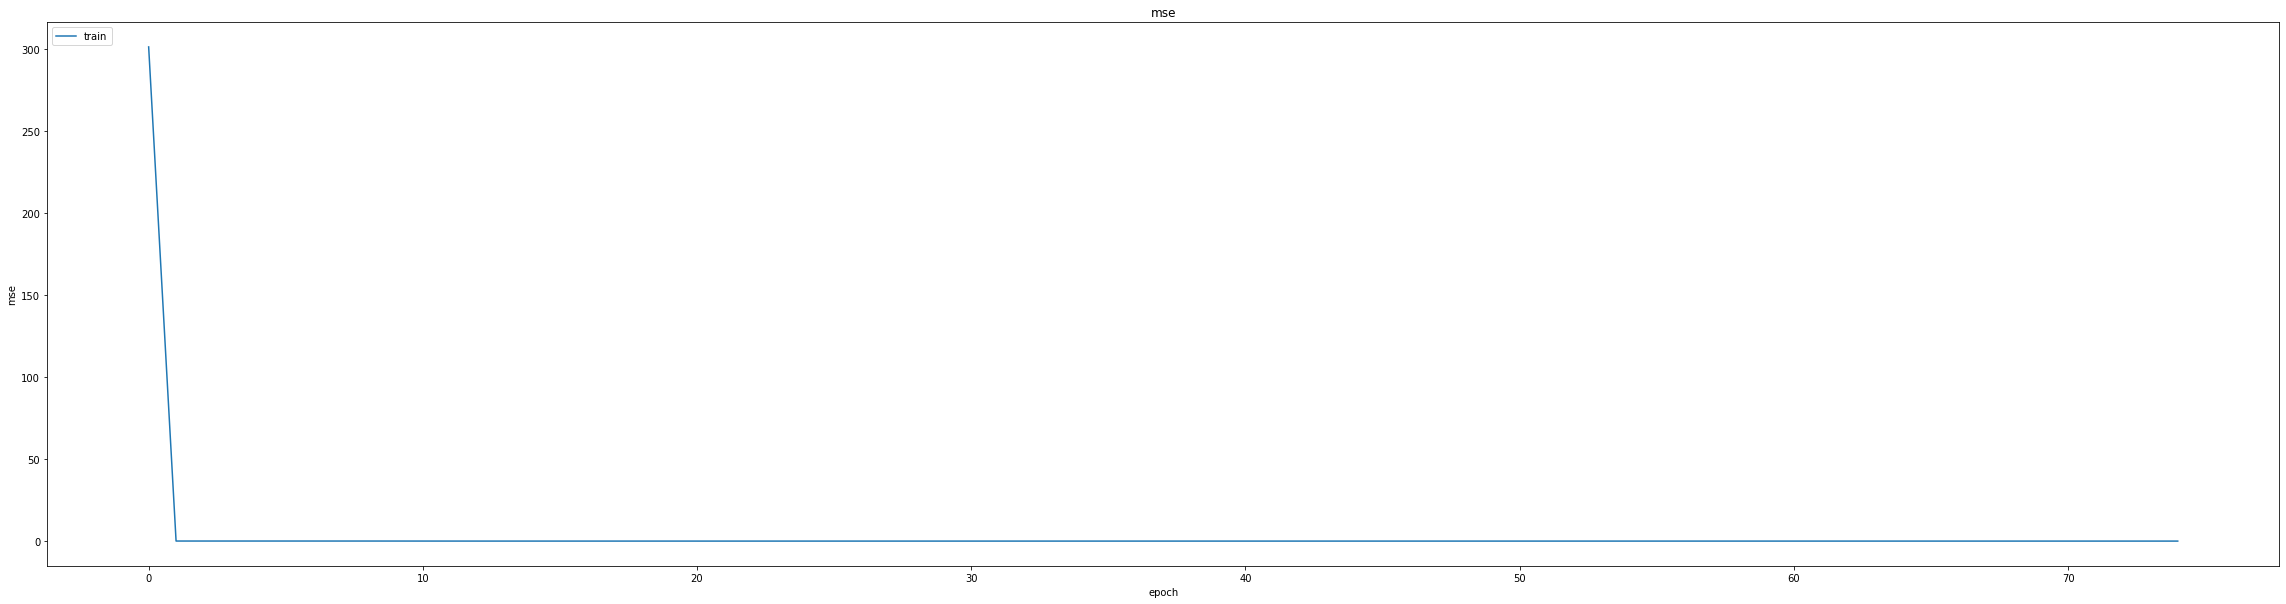

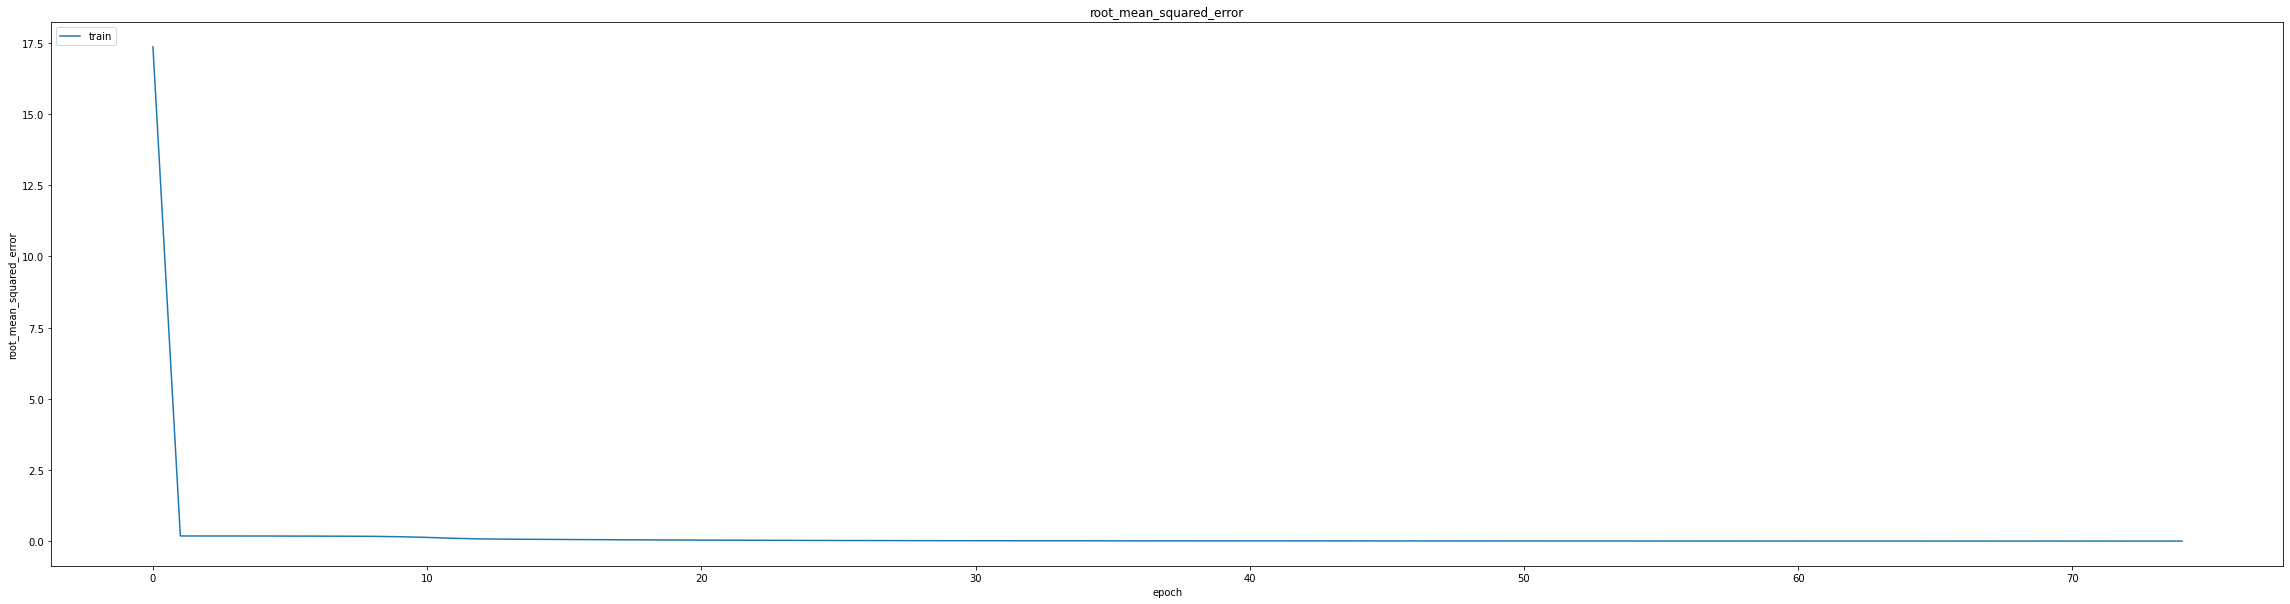

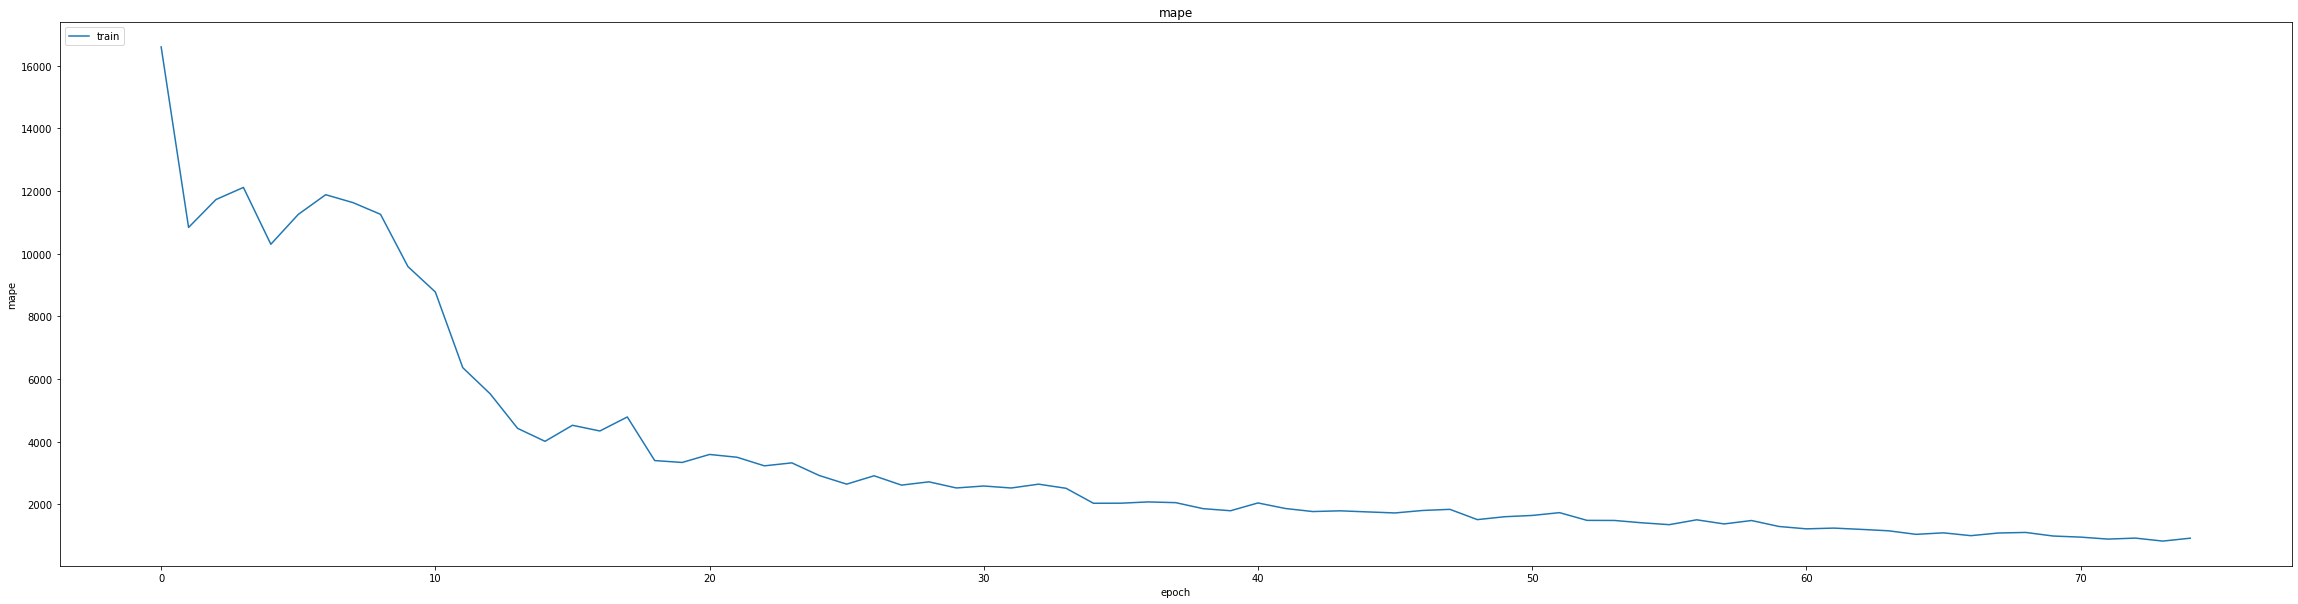

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01614680141210556
0.021221039816737175
234/234 [==============================] - 11s 37ms/step
0.9904432479271089


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 3.4082e-04 - mae: 0.0084 - mse: 3.4082e-04 - root_mean_squared_error: 0.0185 - mape: 1006.1976
Epoch 1: val_mse did not improve from 0.00045
464/464 [==============================] - 141s 282ms/step - loss: 3.4082e-04 - mae: 0.0084 - mse: 3.4082e-04 - root_mean_squared_error: 0.0185 - mape: 1006.1976 - val_loss: 6.8588e-04 - val_mae: 0.0228 - val_mse: 6.8588e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 8985.7539 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.8910e-05 - mae: 0.0033 - mse: 1.8910e-05 - root_mean_squared_error: 0.0043 - mape: 950.8226
Epoch 2: val_mse did not improve from 0.00045
464/464 [==============================] - 132s 284ms/step - loss: 1.8910e-05 - mae: 0.0033 - mse: 1.8910e-05 - root_mean_squared_error: 0.0043 - mape: 950.8226 - val_loss: 6.2865e-04 - val_mae: 0.0216 - val_mse: 6.2865e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 8185.48

464/464 [==============================] - 174s 376ms/step - loss: 1.9364e-05 - mae: 0.0034 - mse: 1.9364e-05 - root_mean_squared_error: 0.0044 - mape: 314.3786 - val_loss: 3.7808e-04 - val_mae: 0.0158 - val_mse: 3.7808e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 8978.6963 - lr: 5.3144e-04
Epoch 14/25
464/464 [==============================] - ETA: 0s - loss: 2.1203e-05 - mae: 0.0036 - mse: 2.1203e-05 - root_mean_squared_error: 0.0046 - mape: 377.0153
Epoch 14: val_mse did not improve from 0.00038
464/464 [==============================] - 132s 285ms/step - loss: 2.1203e-05 - mae: 0.0036 - mse: 2.1203e-05 - root_mean_squared_error: 0.0046 - mape: 377.0153 - val_loss: 6.5769e-04 - val_mae: 0.0223 - val_mse: 6.5769e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 6718.9102 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
464/464 [==============================] - ETA: 0s - loss: 1.6492e-05 - mae: 0.0031 - mse: 1.6492e-05 - root_mean_squared_error: 0.0041 -

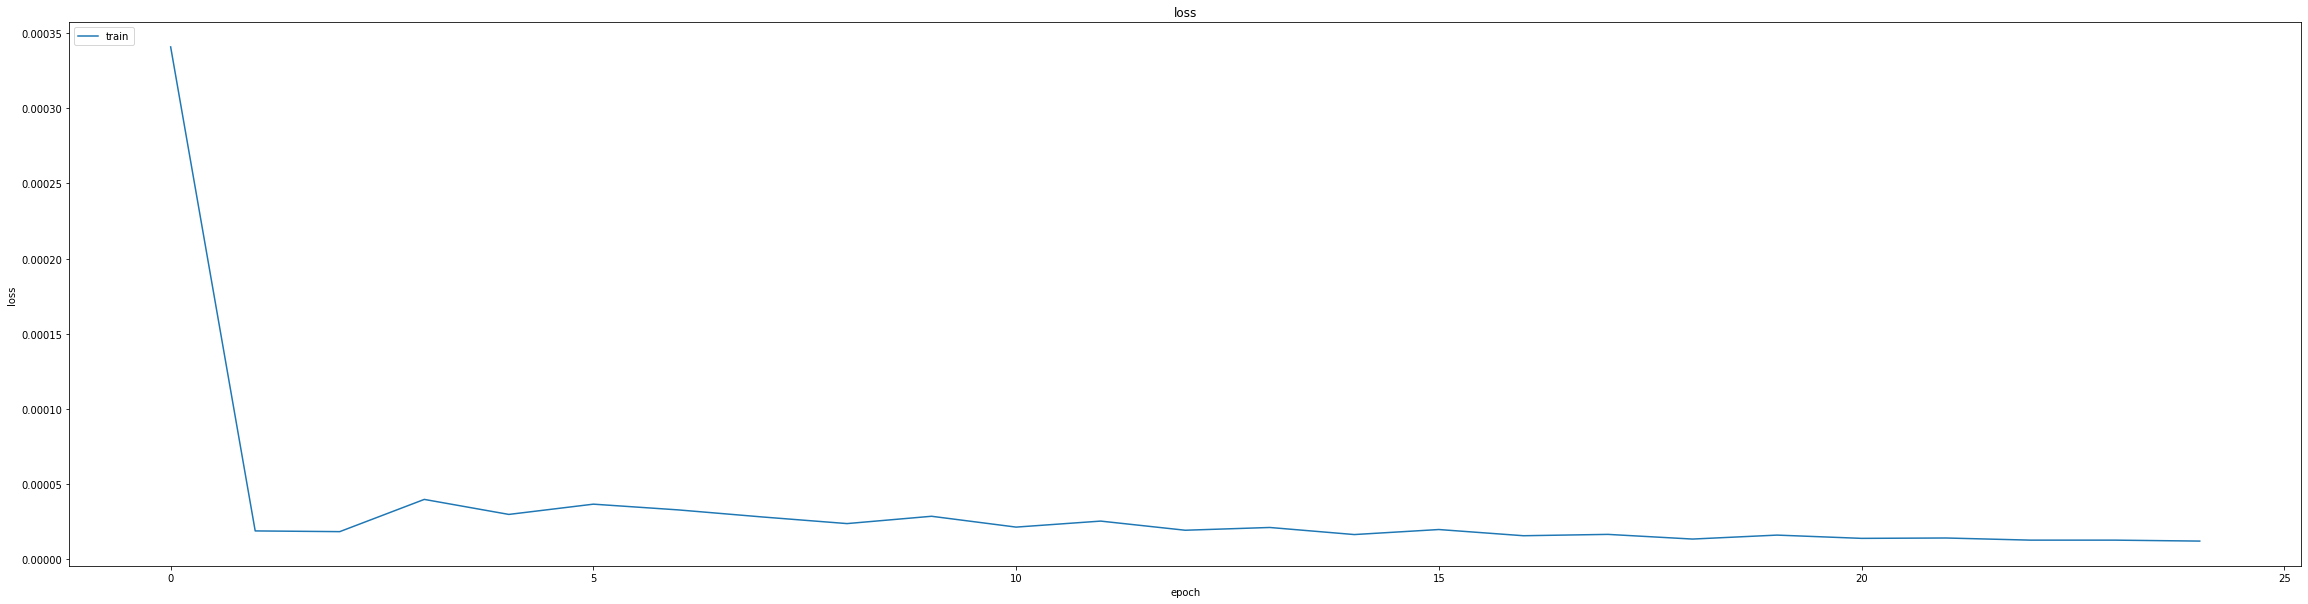

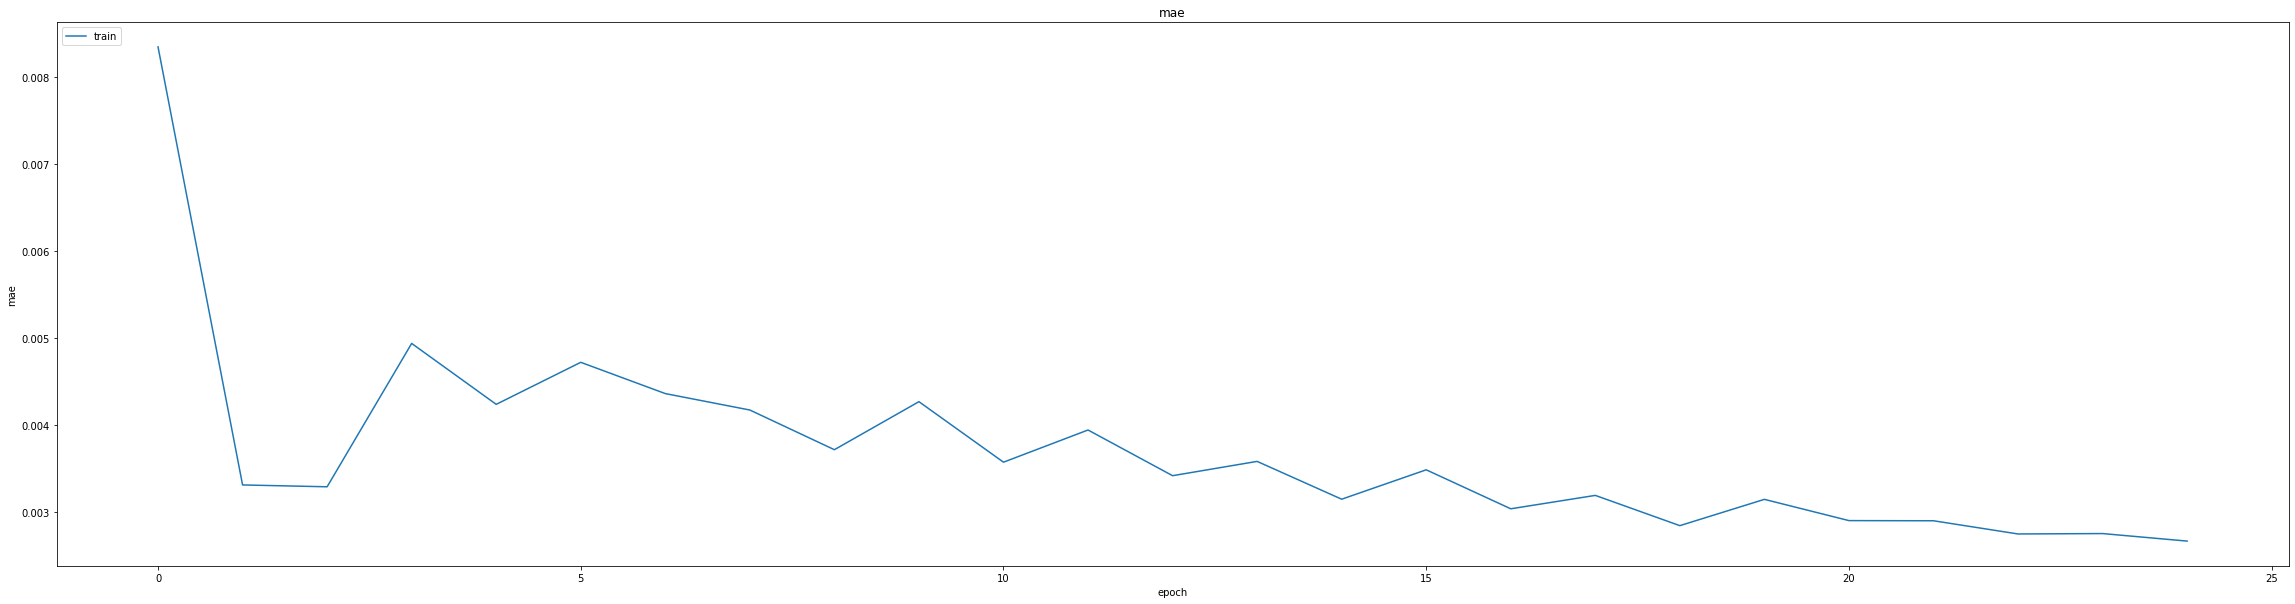

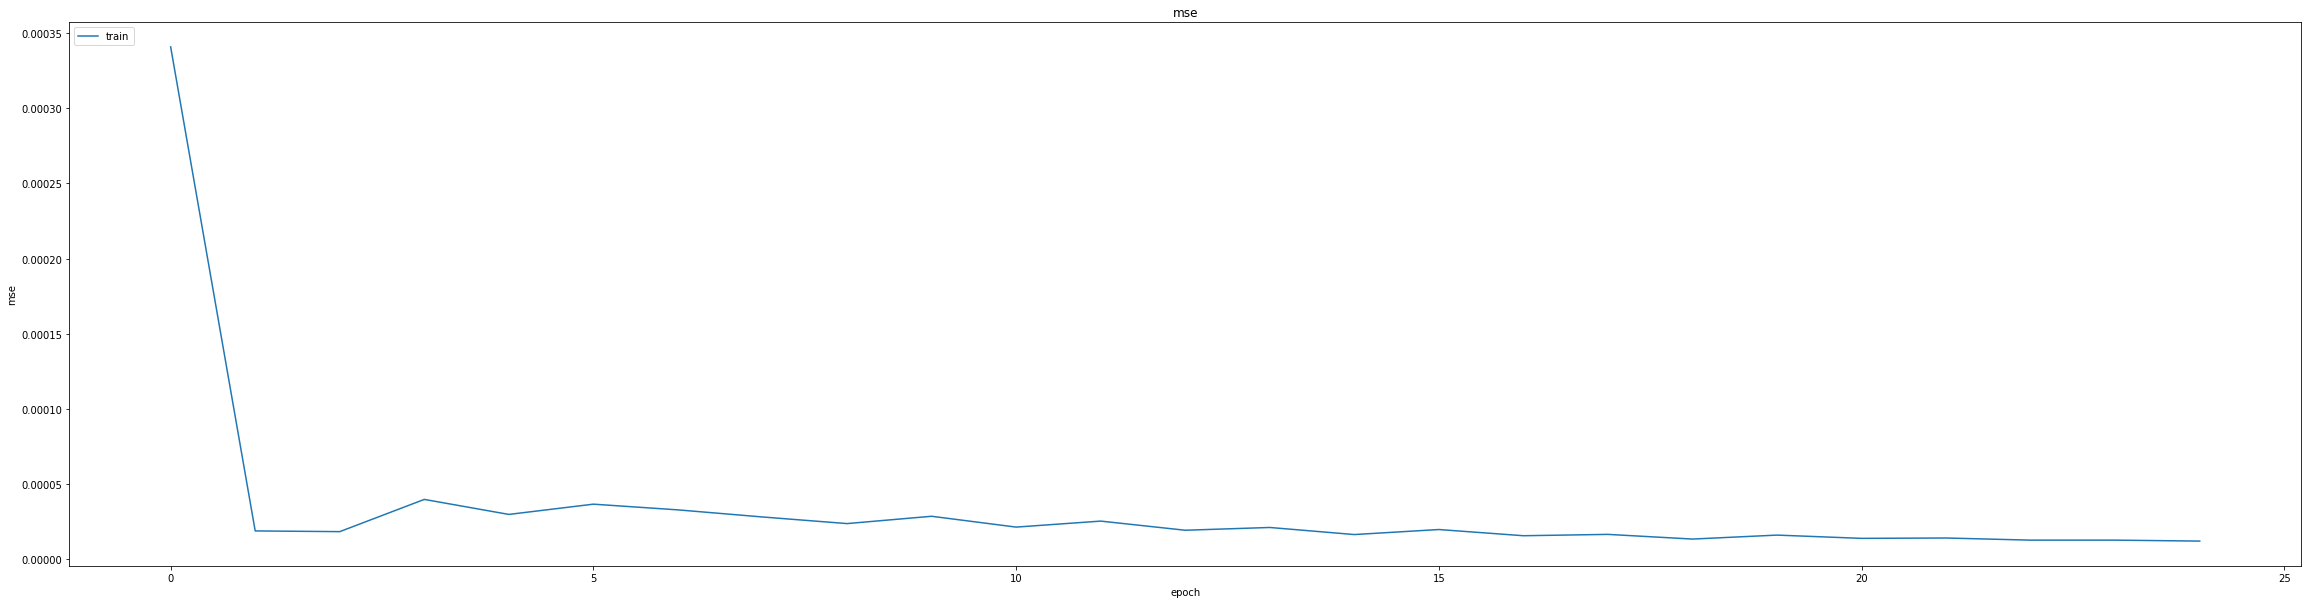

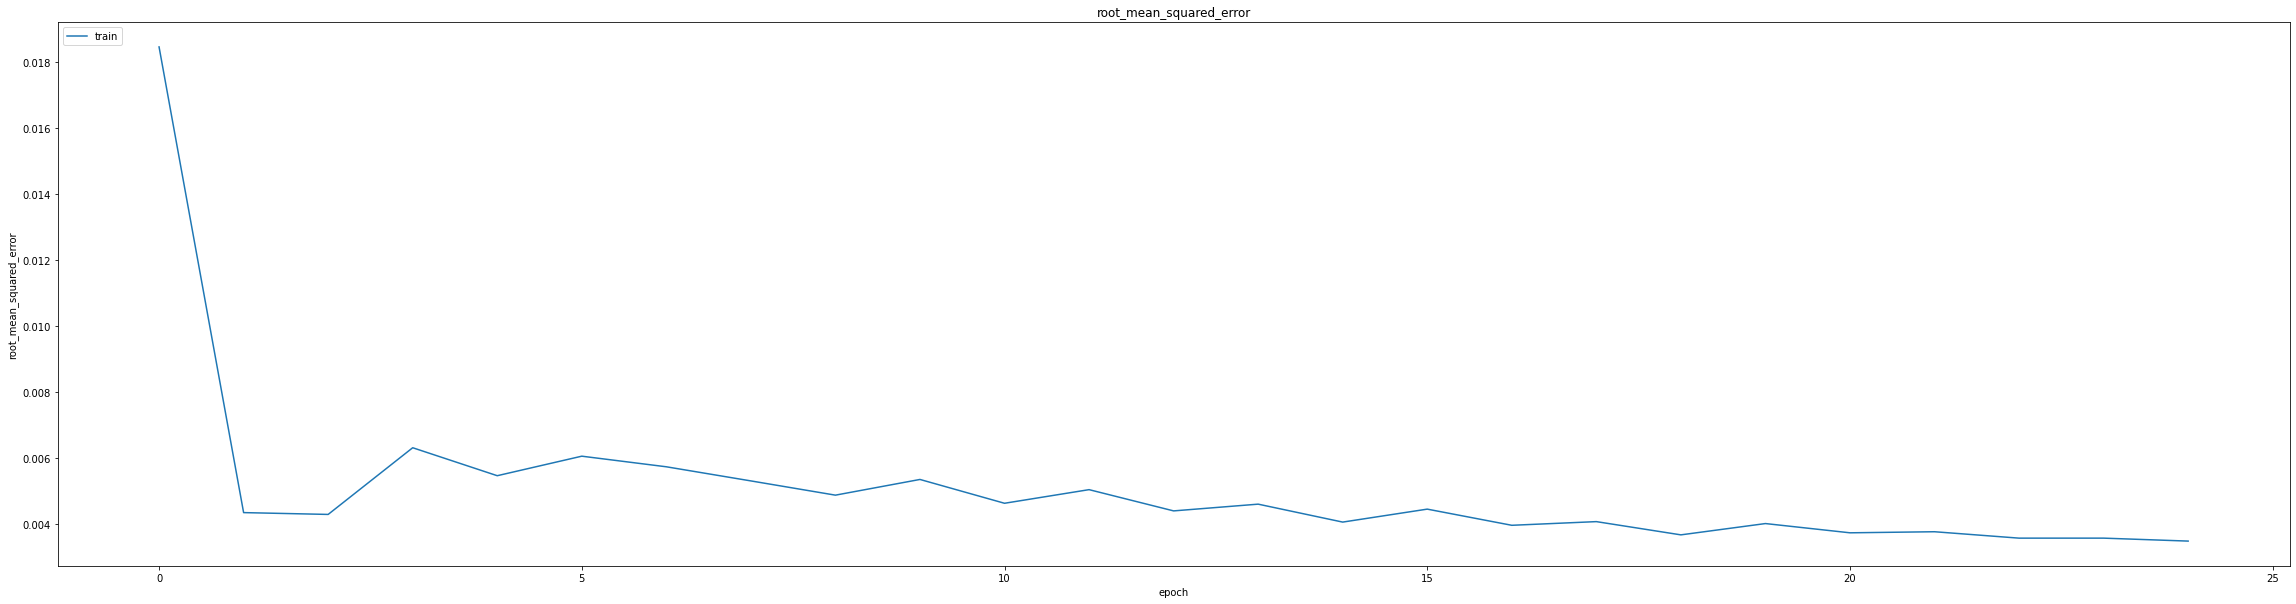

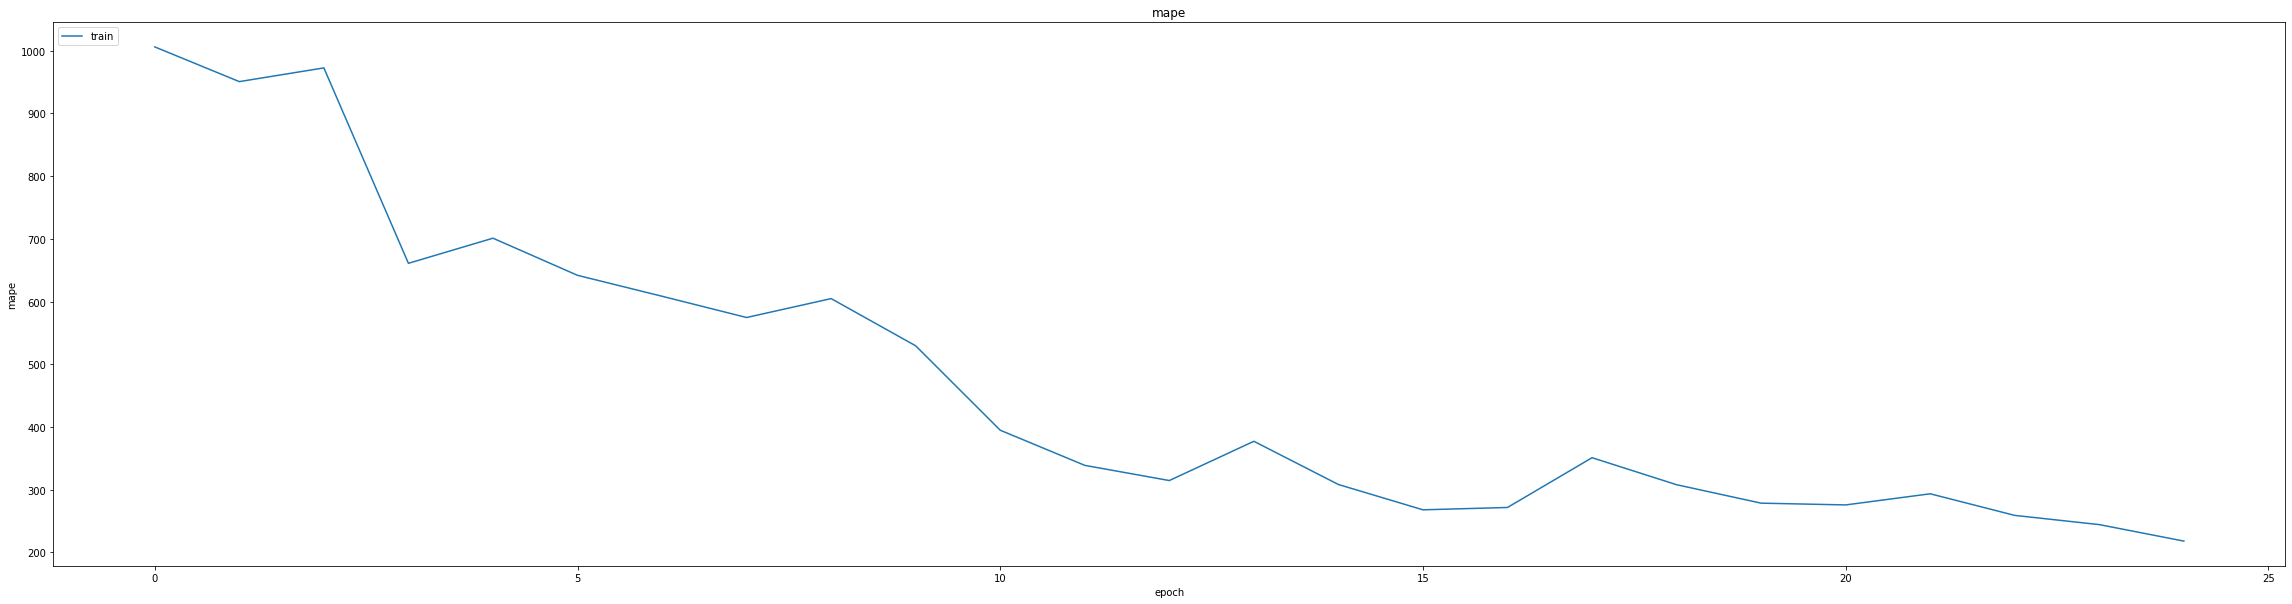

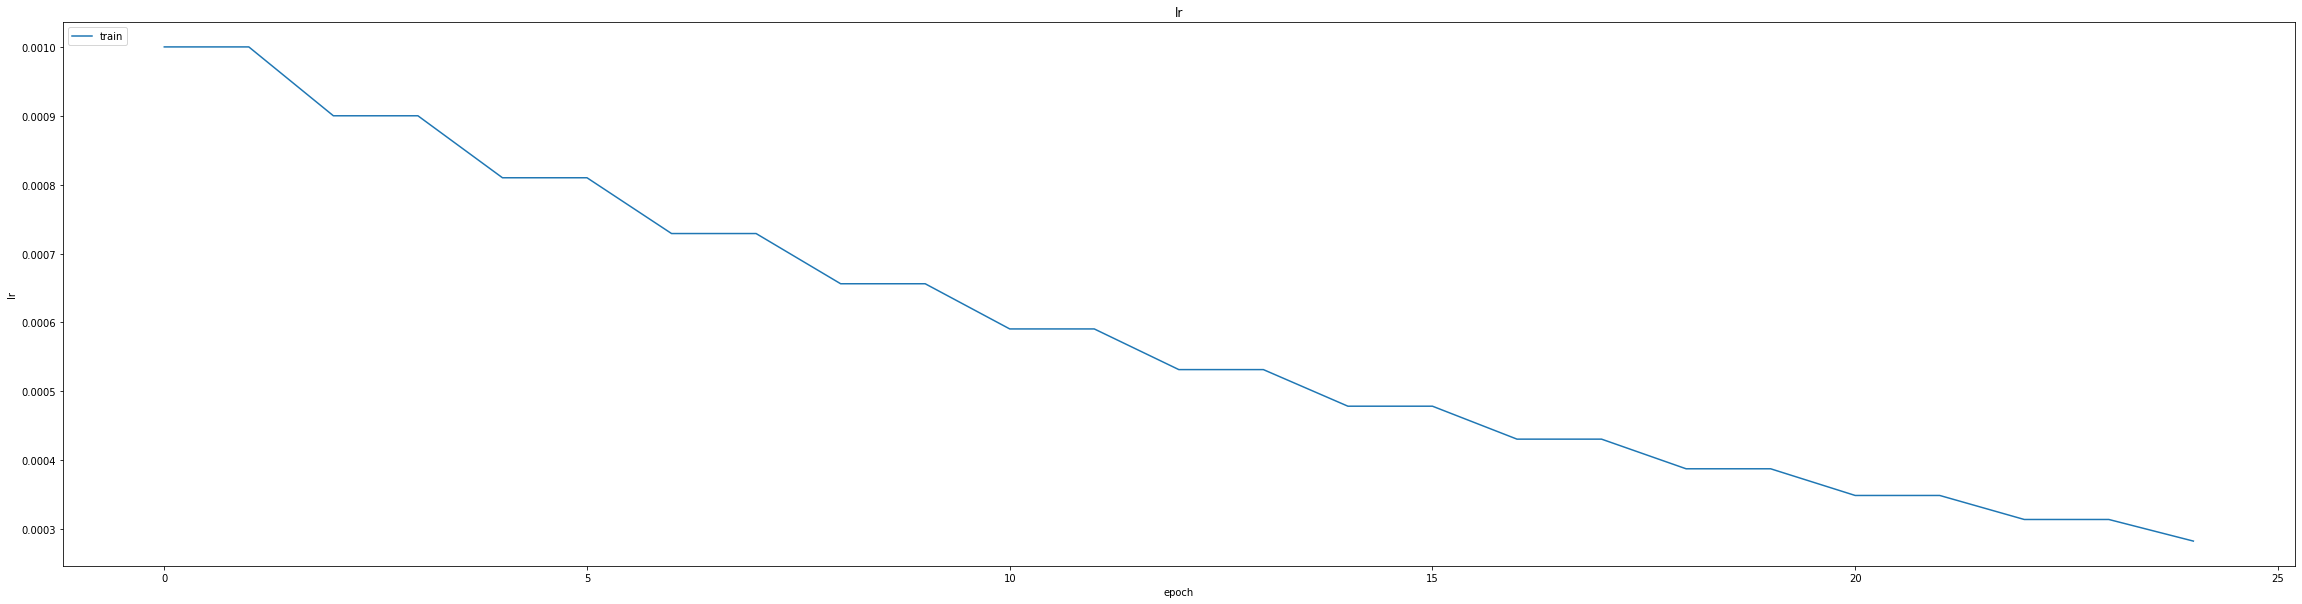

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01580778881907463
0.019444406032562256
234/234 [==============================] - 13s 46ms/step
0.9889051327605964


234/234 [==============================] - 9s 37ms/step


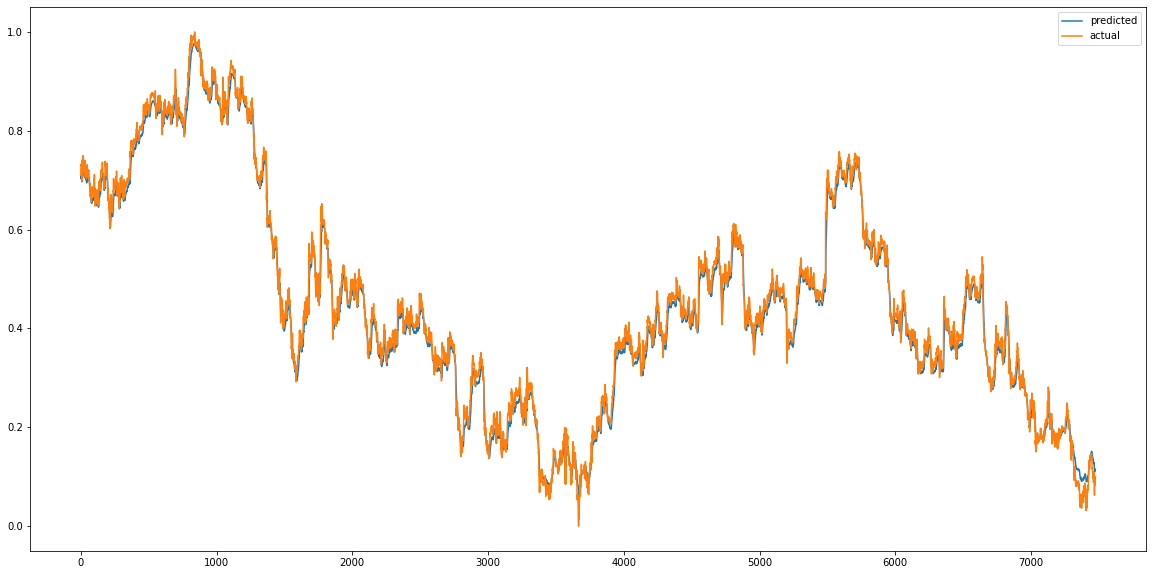

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD15_BiLSTM")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


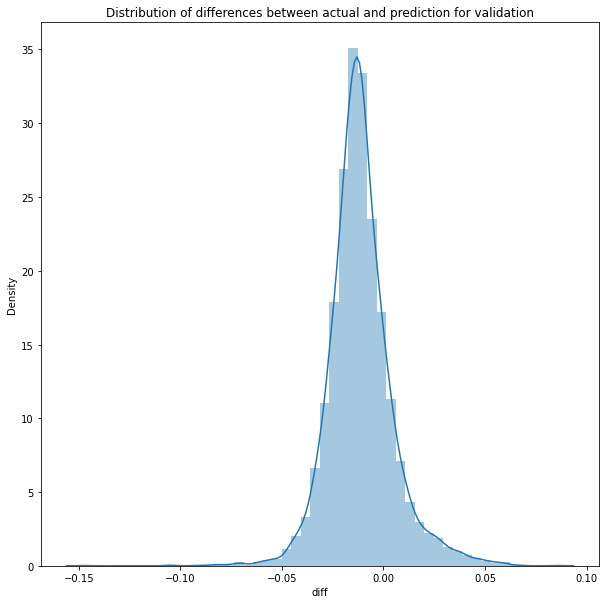

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 38ms/step


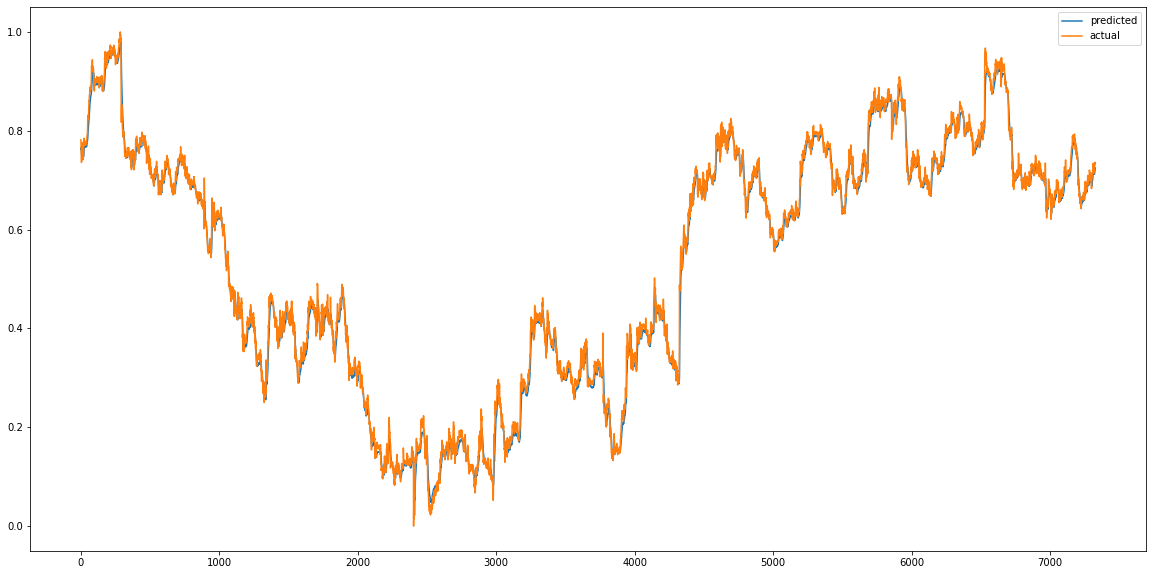

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


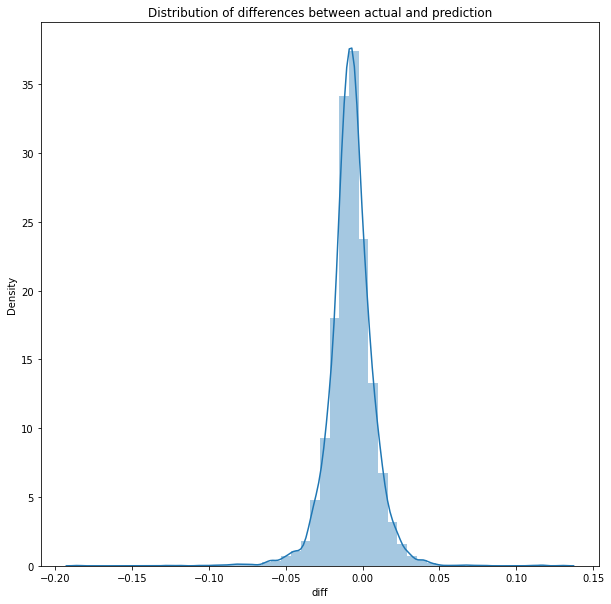

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0002707736200956427
MAE :  0.012185046673776899
RMSE  : 0.01645520039670264
229/229 [==============================] - 9s 37ms/step
R2_Score  : 0.9956446732988681


count    7327.000000
mean       -0.007538
std         0.014628
min        -0.185468
25%        -0.014527
50%        -0.007500
75%        -0.000130
max         0.129872
Name: diff, dtype: float64

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           275456    
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("AUD15minLSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 2234.6951 - mae: 21.1591 - mse: 2234.6951 - root_mean_squared_error: 47.2726 - mape: 112878.4141
Epoch 1: val_mse improved from inf to 4.57774, saving model to AUD15minLSTM.hdf5
464/464 [==============================] - 103s 211ms/step - loss: 2234.6951 - mae: 21.1591 - mse: 2234.6951 - root_mean_squared_error: 47.2726 - mape: 112878.4141 - val_loss: 4.5777 - val_mae: 2.1282 - val_mse: 4.5777 - val_root_mean_squared_error: 2.1396 - val_mape: 346532.3750
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 1.5558 - mae: 1.1874 - mse: 1.5558 - root_mean_squared_error: 1.2473 - mape: 32223.8574
Epoch 2: val_mse improved from 4.57774 to 0.91758, saving model to AUD15minLSTM.hdf5
464/464 [==============================] - 95s 205ms/step - loss: 1.5558 - mae: 1.1874 - mse: 1.5558 - root_mean_squared_error: 1.2473 - mape: 32223.8574 - val_loss: 0.9176 - val_mae: 0.9323 - val_mse: 0.9176 - val_root_mean_squ

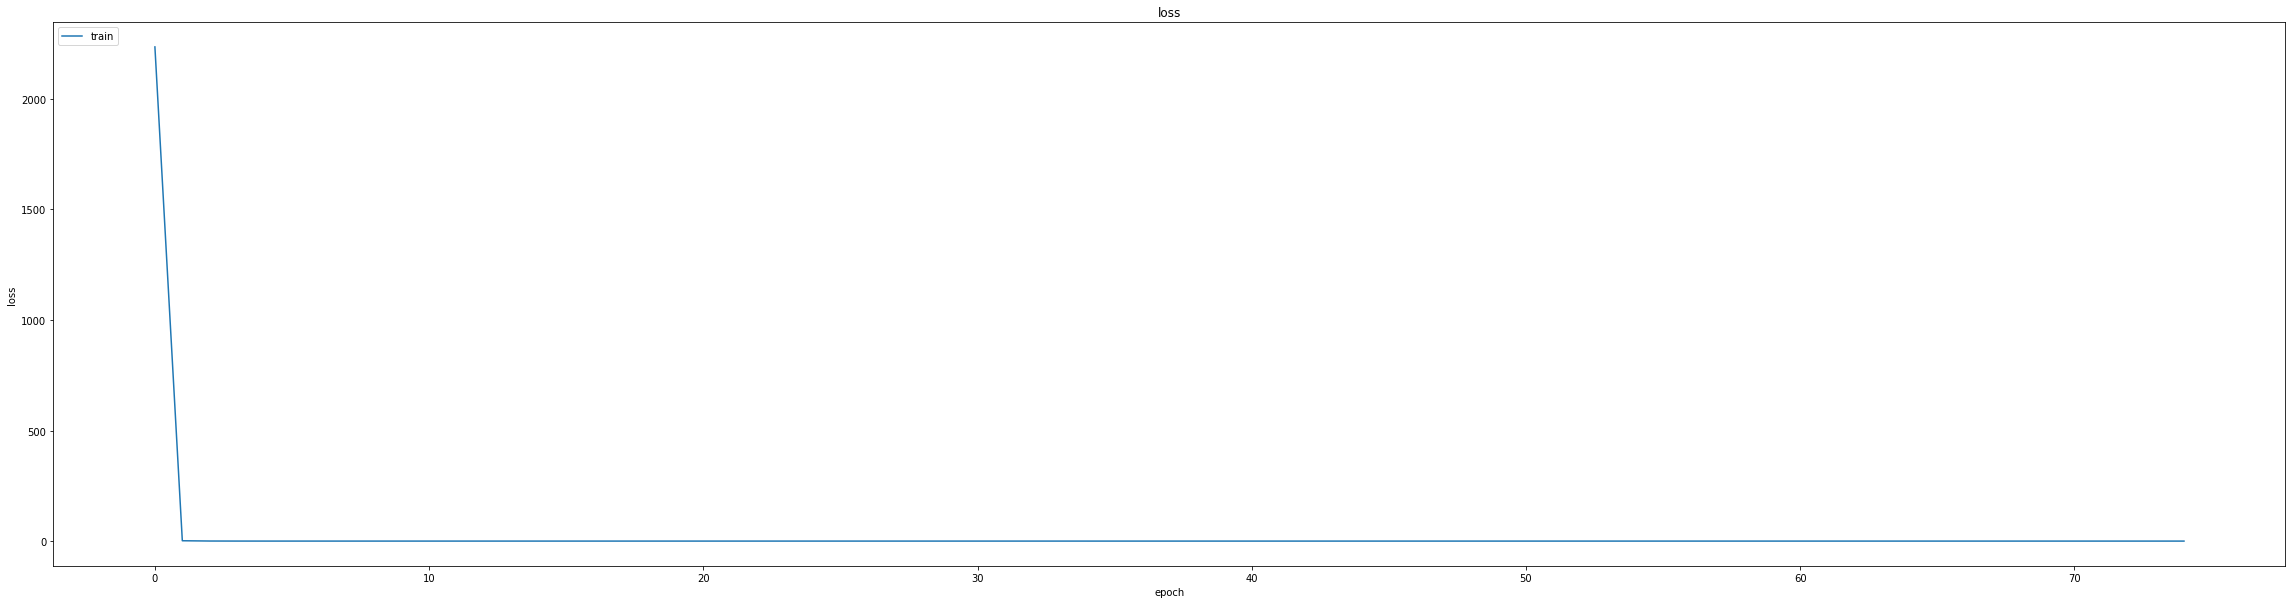

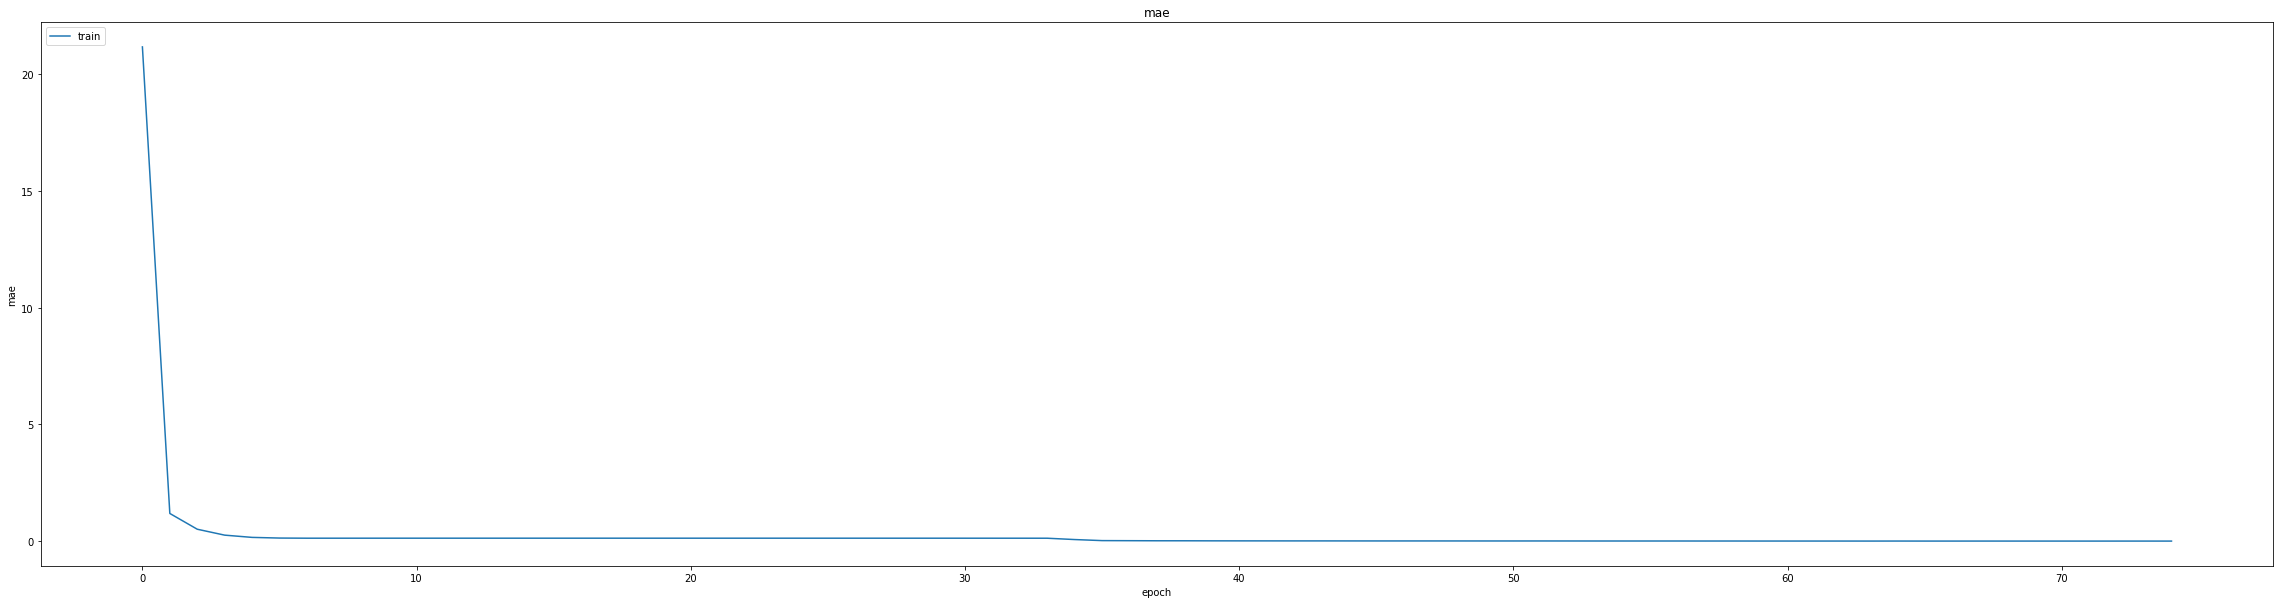

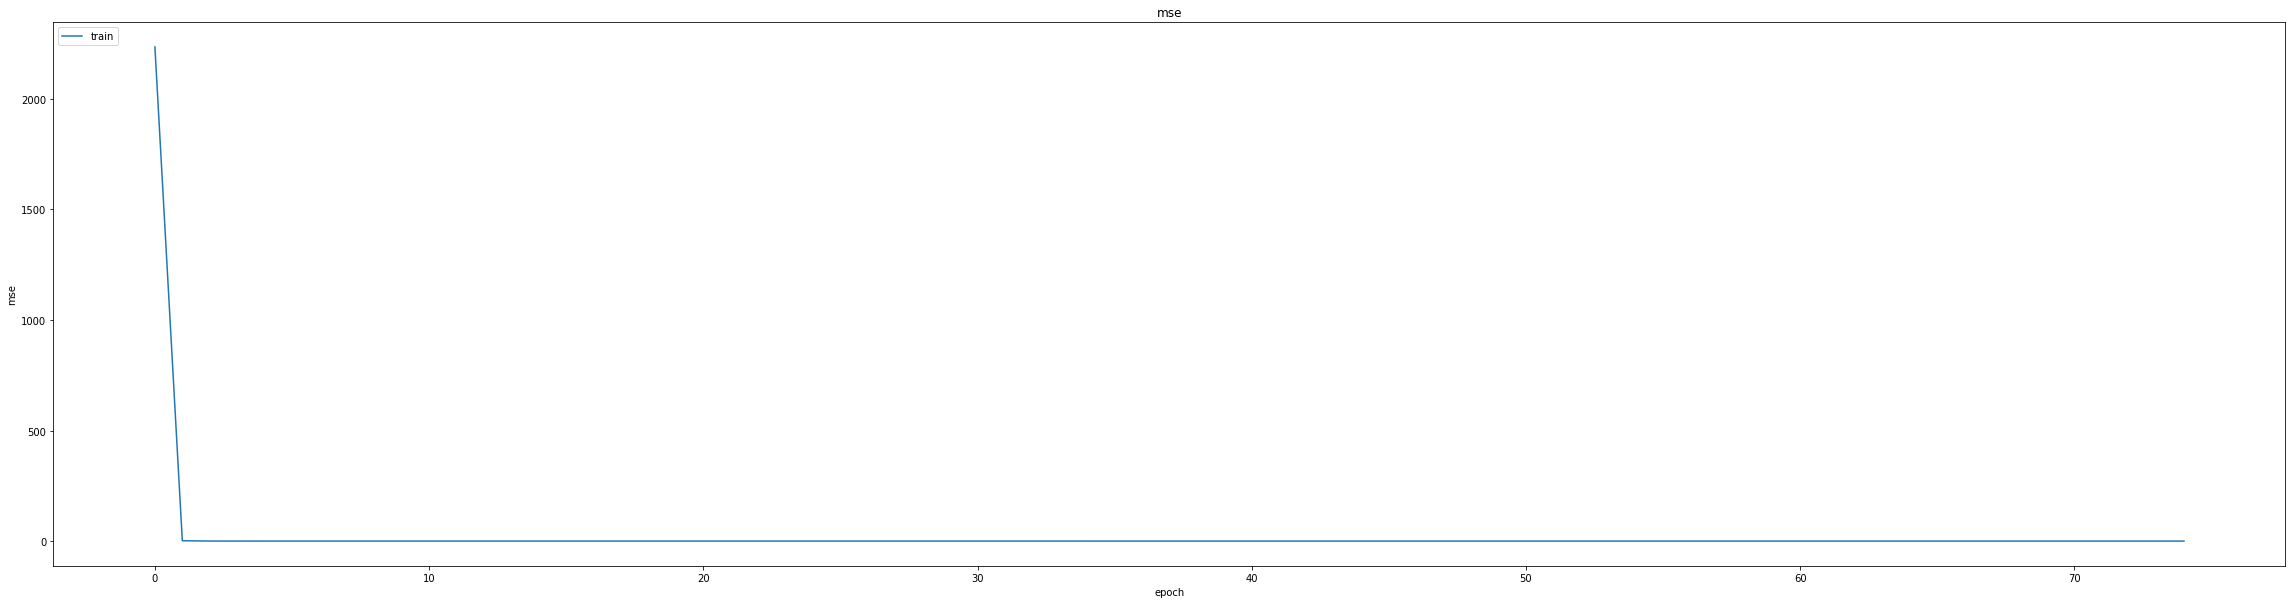

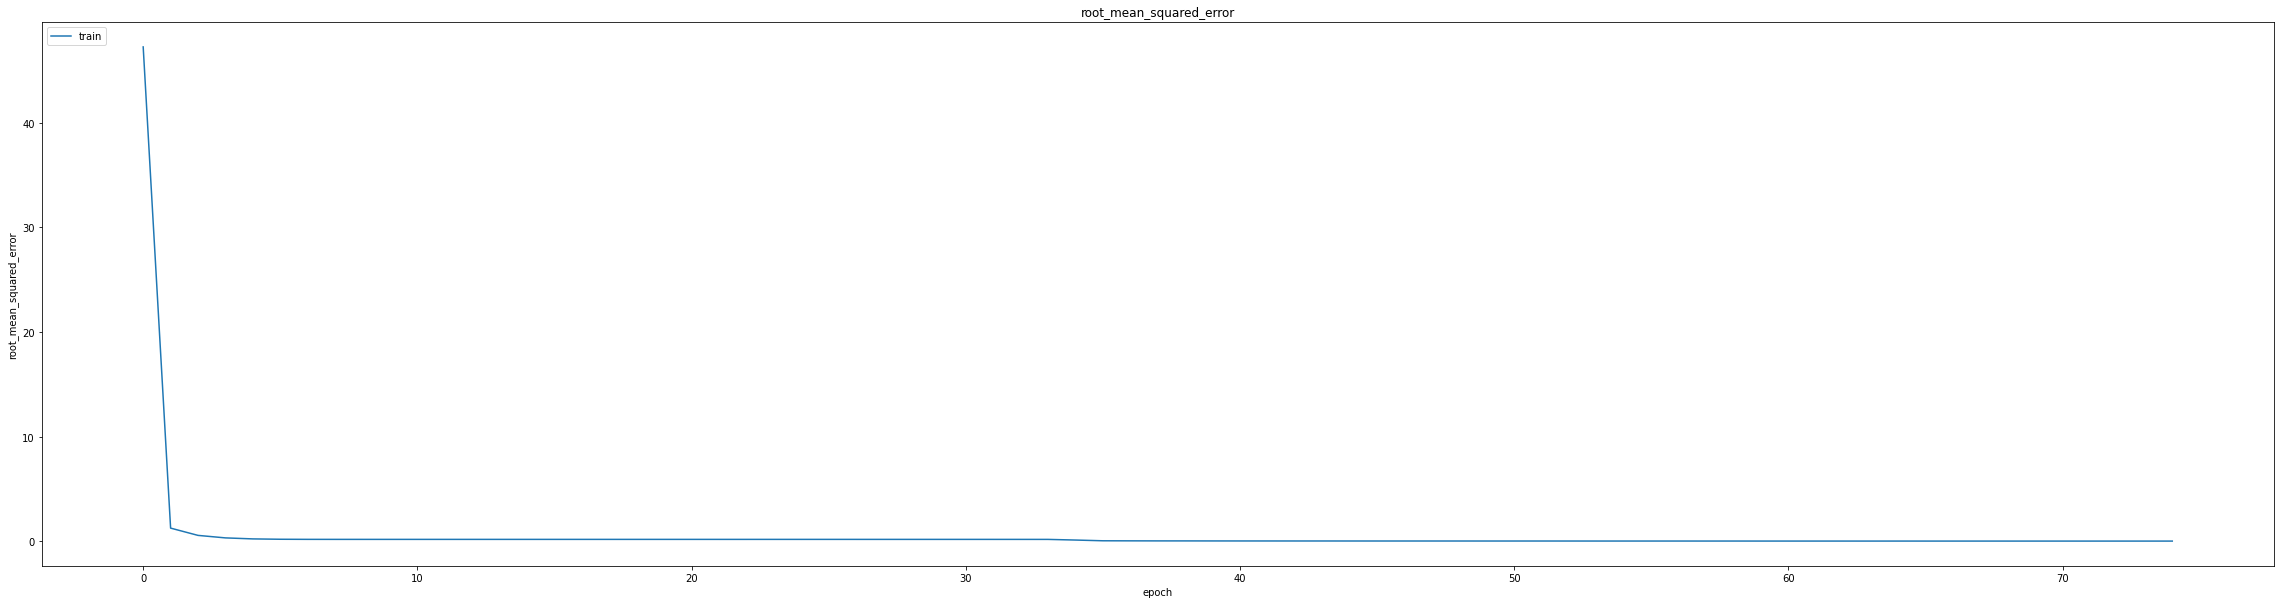

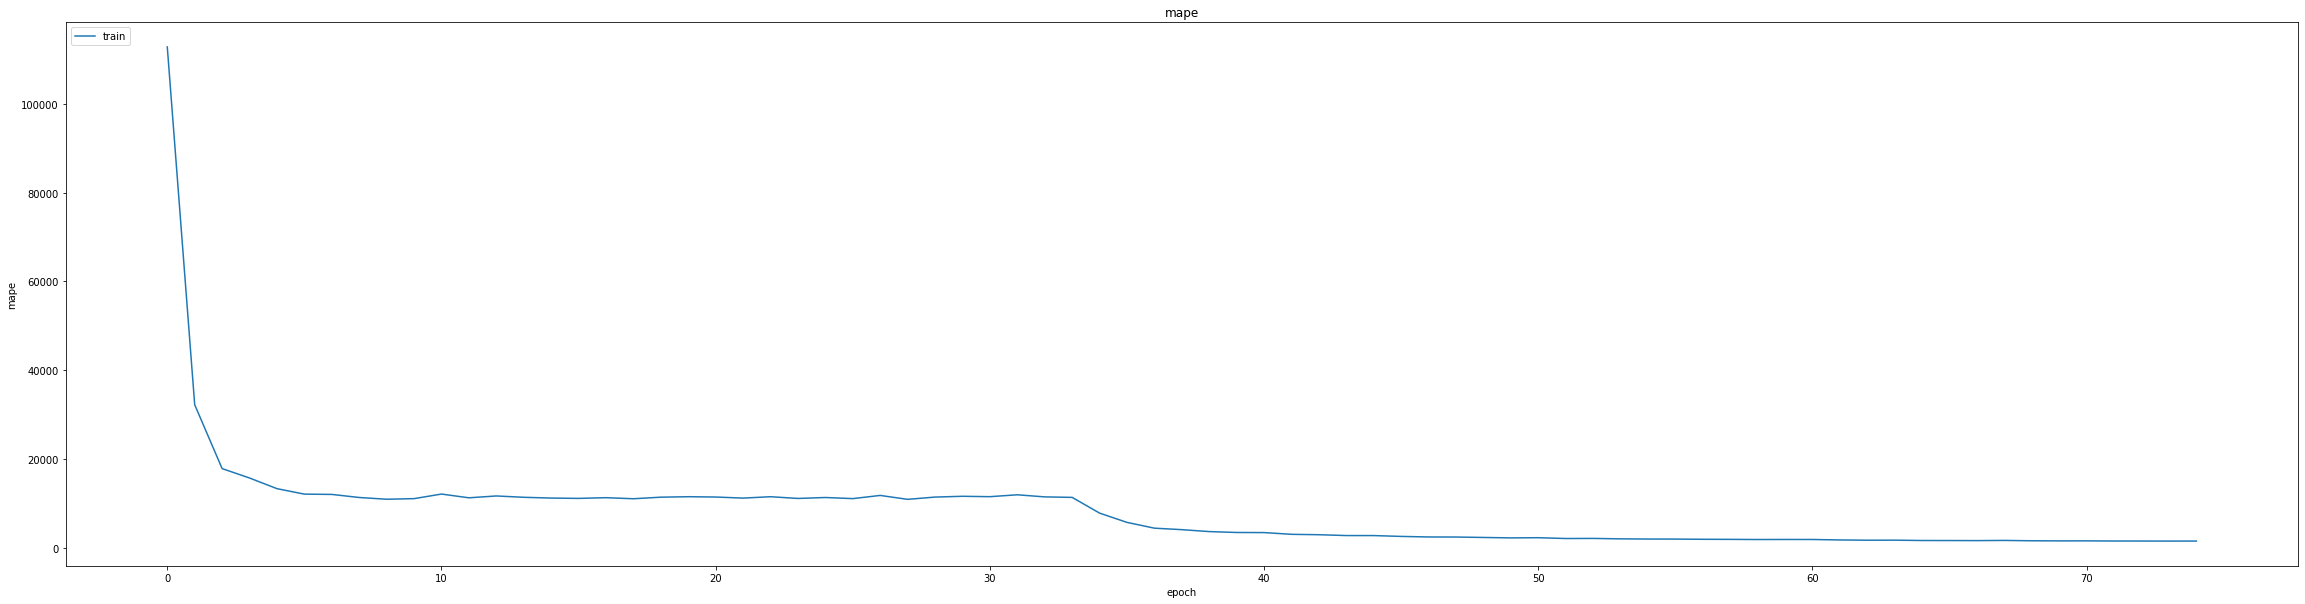

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.021546246483922005
0.027642985805869102
234/234 [==============================] - 8s 28ms/step
0.9814333025621119


In [ ]:
model.load_weights("AUD15minLSTM.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 1.1517e-04 - mae: 0.0046 - mse: 1.1517e-04 - root_mean_squared_error: 0.0107 - mape: 1532.1991
Epoch 1: val_mse improved from 0.00076 to 0.00071, saving model to AUD15minLSTM.hdf5
464/464 [==============================] - 109s 224ms/step - loss: 1.1517e-04 - mae: 0.0046 - mse: 1.1517e-04 - root_mean_squared_error: 0.0107 - mape: 1532.1991 - val_loss: 7.1040e-04 - val_mae: 0.0216 - val_mse: 7.1040e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 12200.5273 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 2.0526e-05 - mae: 0.0032 - mse: 2.0526e-05 - root_mean_squared_error: 0.0045 - mape: 1511.8789
Epoch 2: val_mse improved from 0.00071 to 0.00066, saving model to AUD15minLSTM.hdf5
464/464 [==============================] - 105s 226ms/step - loss: 2.0526e-05 - mae: 0.0032 - mse: 2.0526e-05 - root_mean_squared_error: 0.0045 - mape: 1511.8789 - val_loss: 6.6220e-04 - val_mae: 0.021

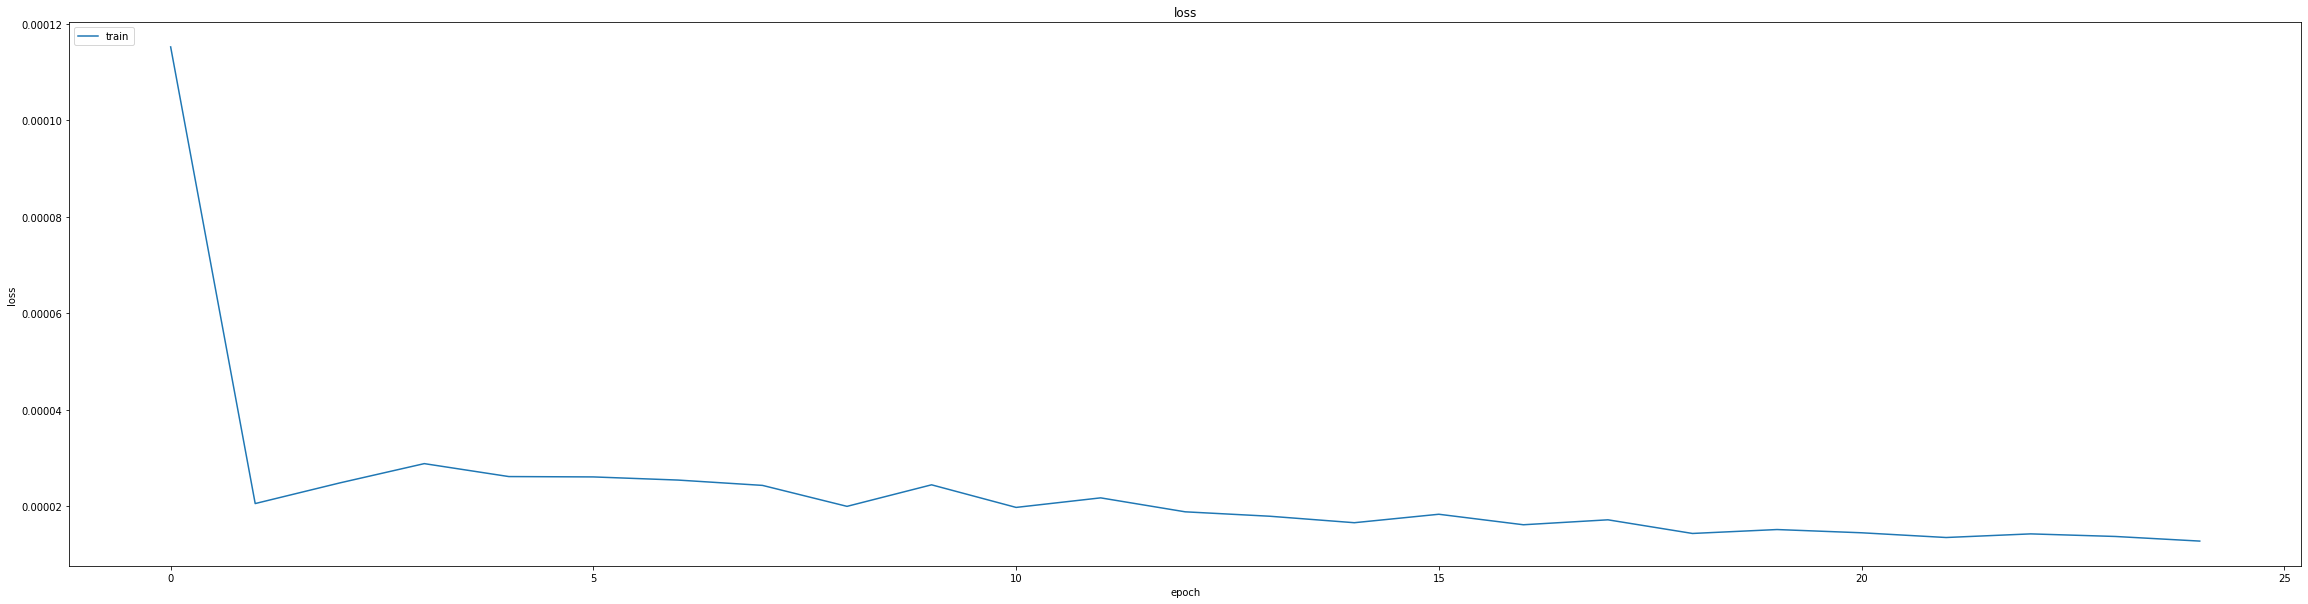

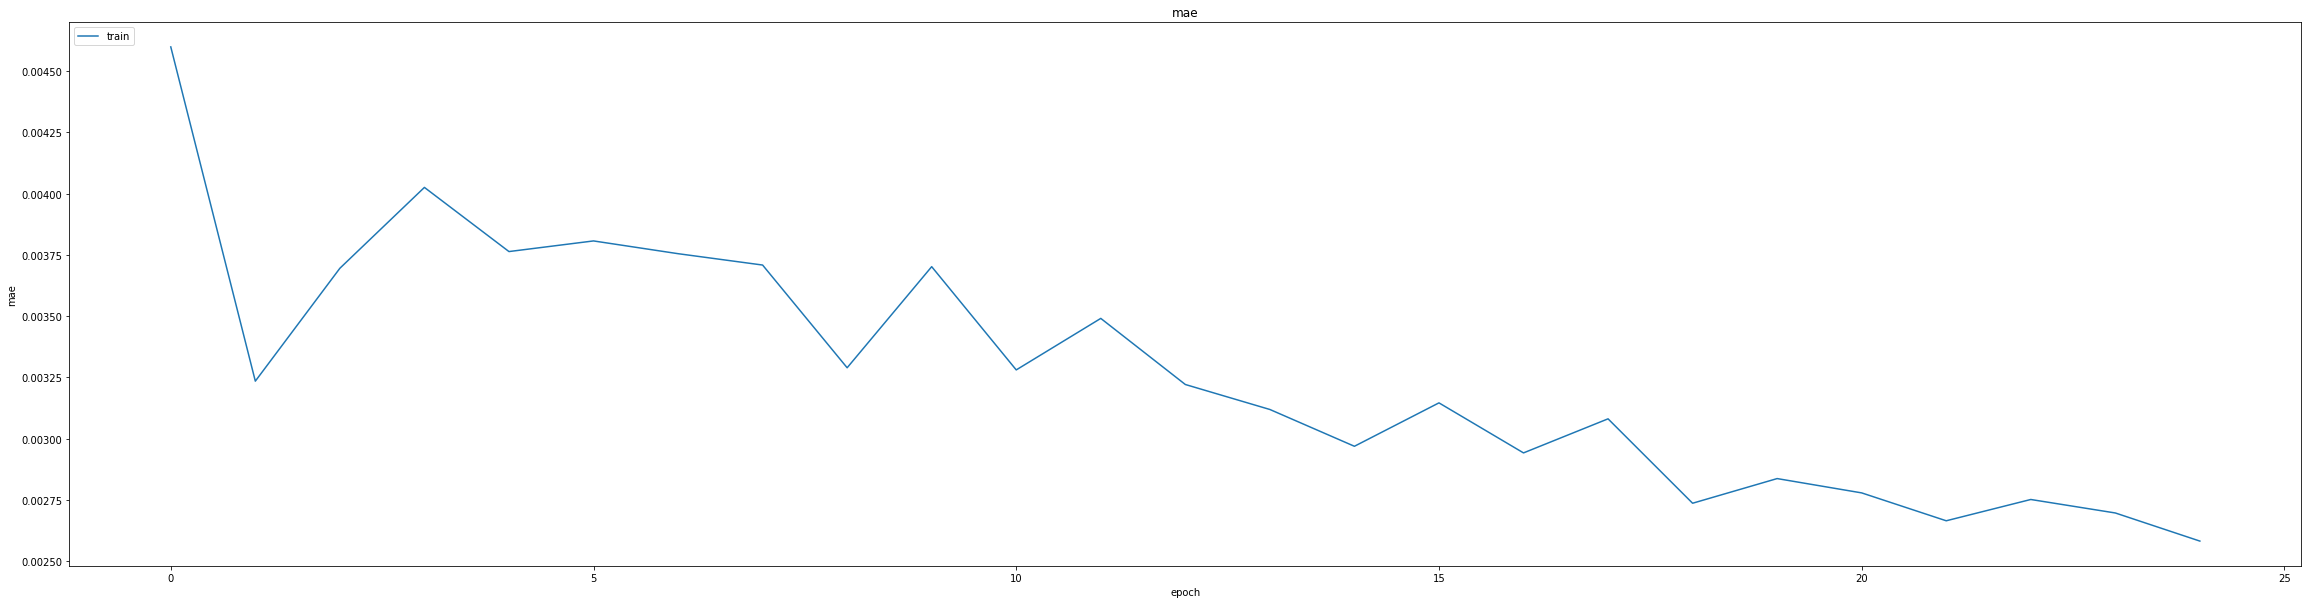

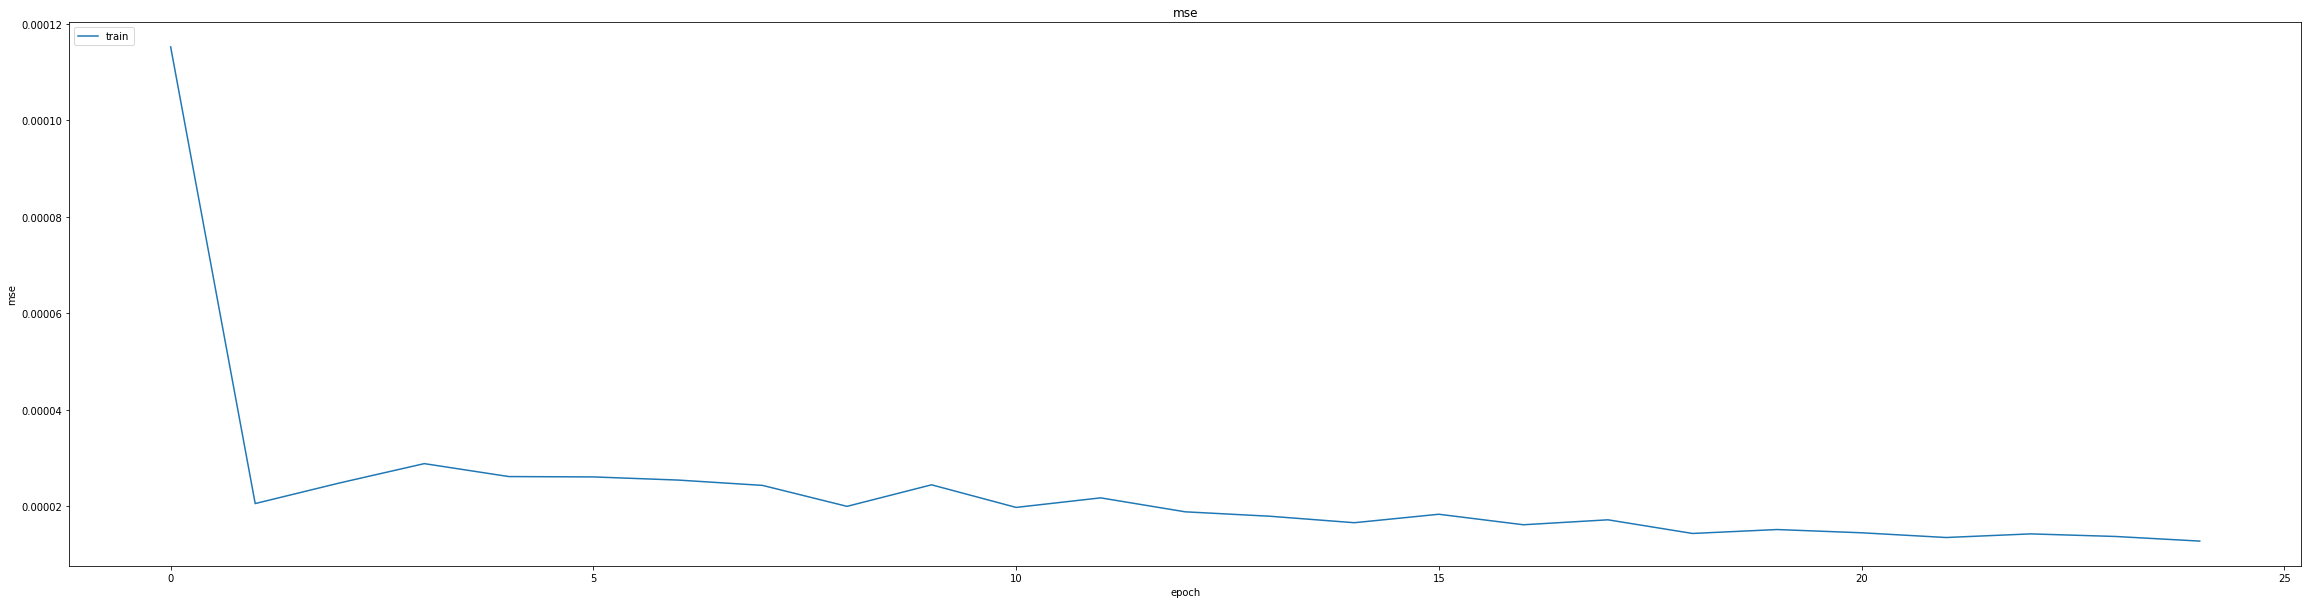

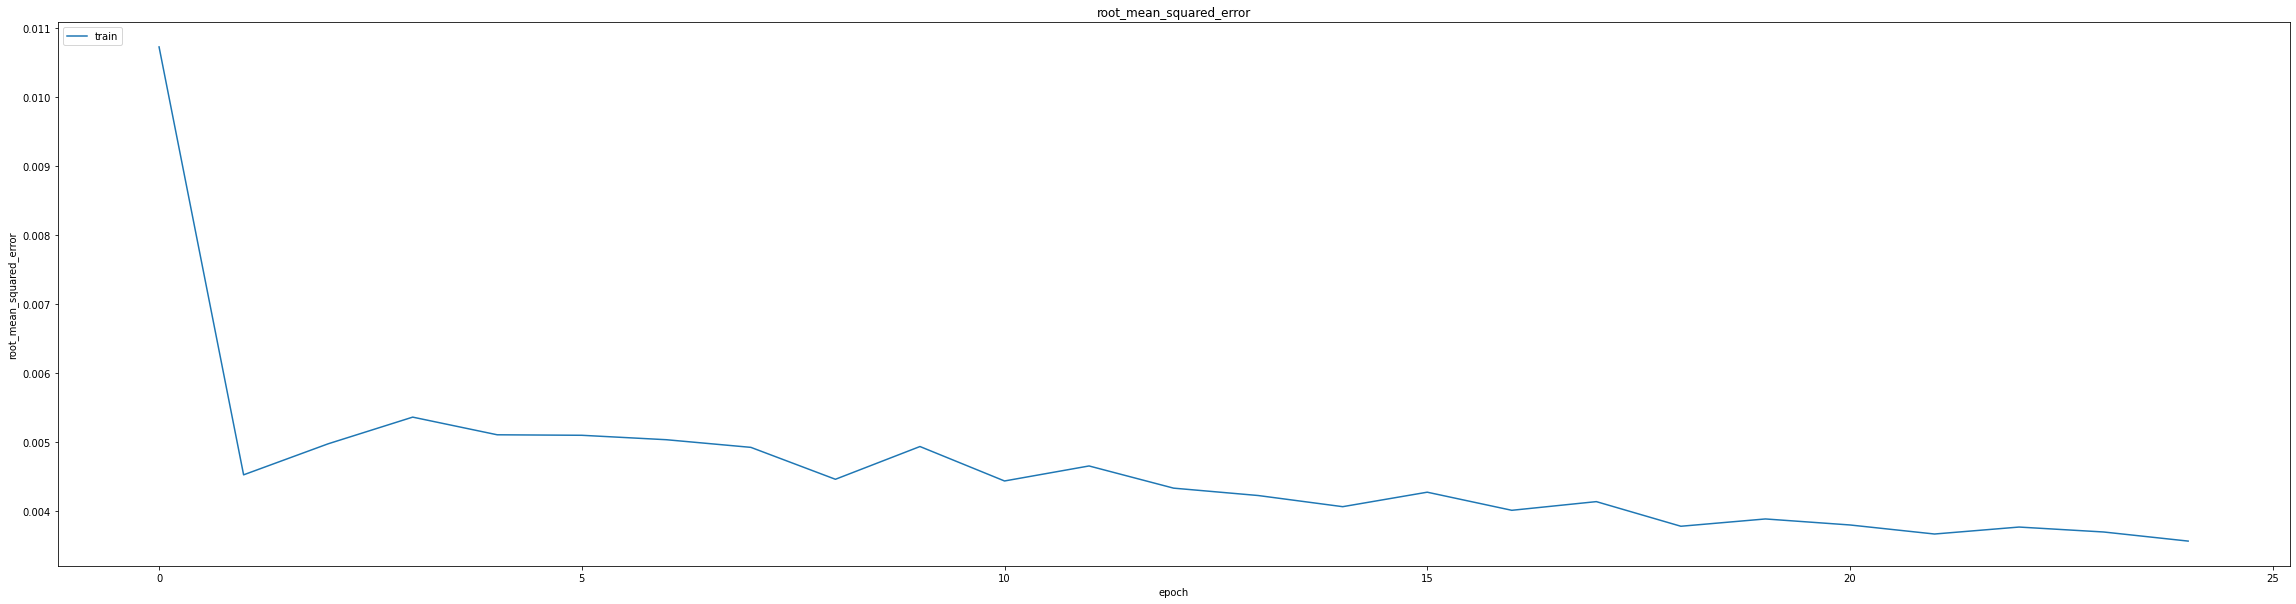

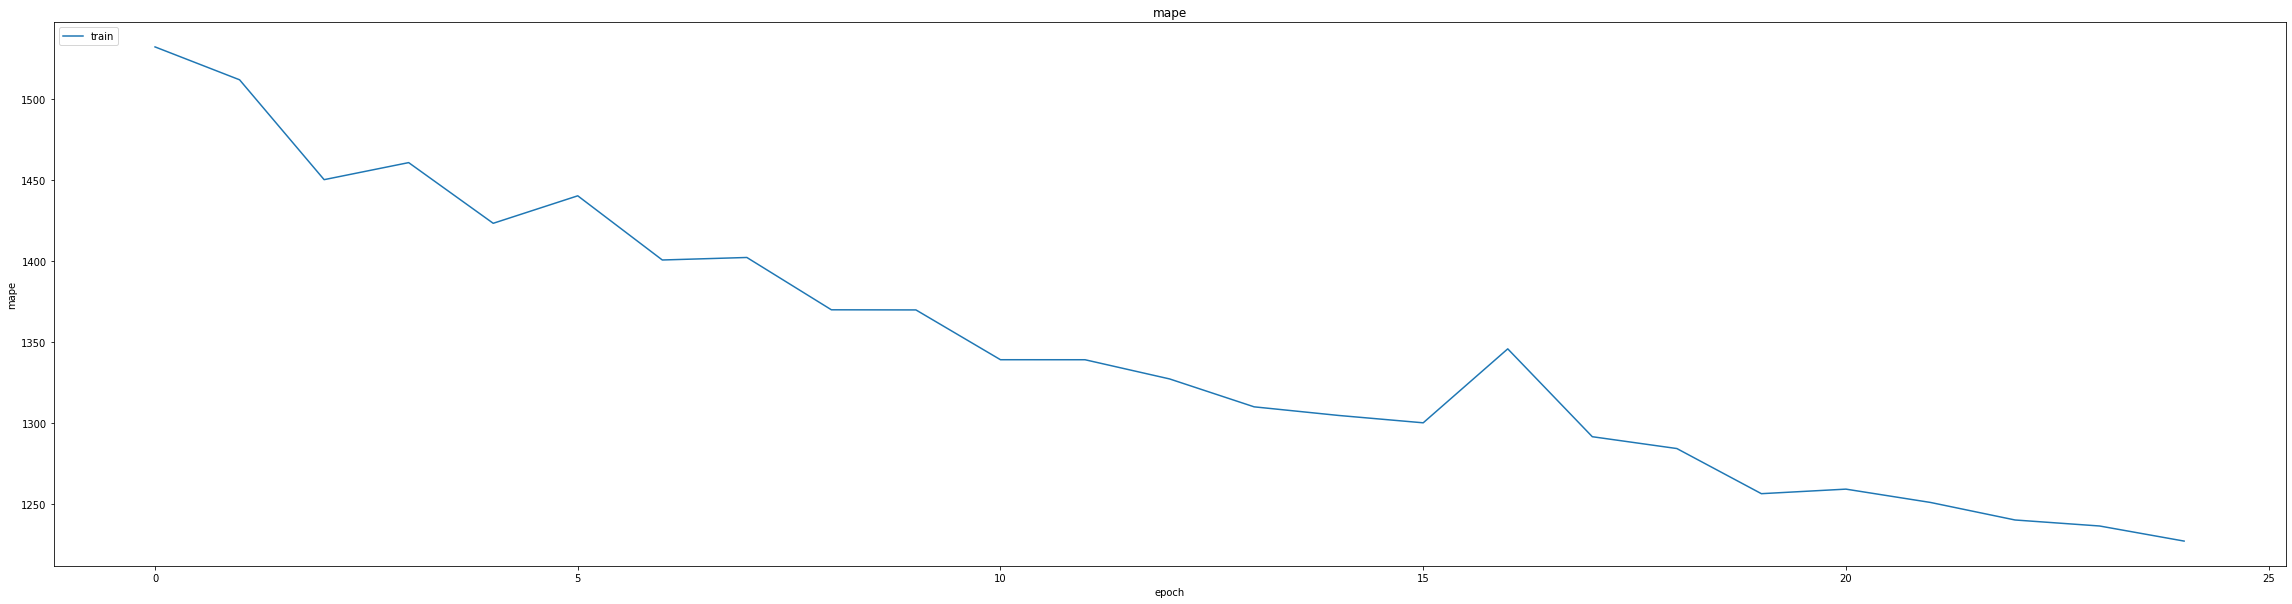

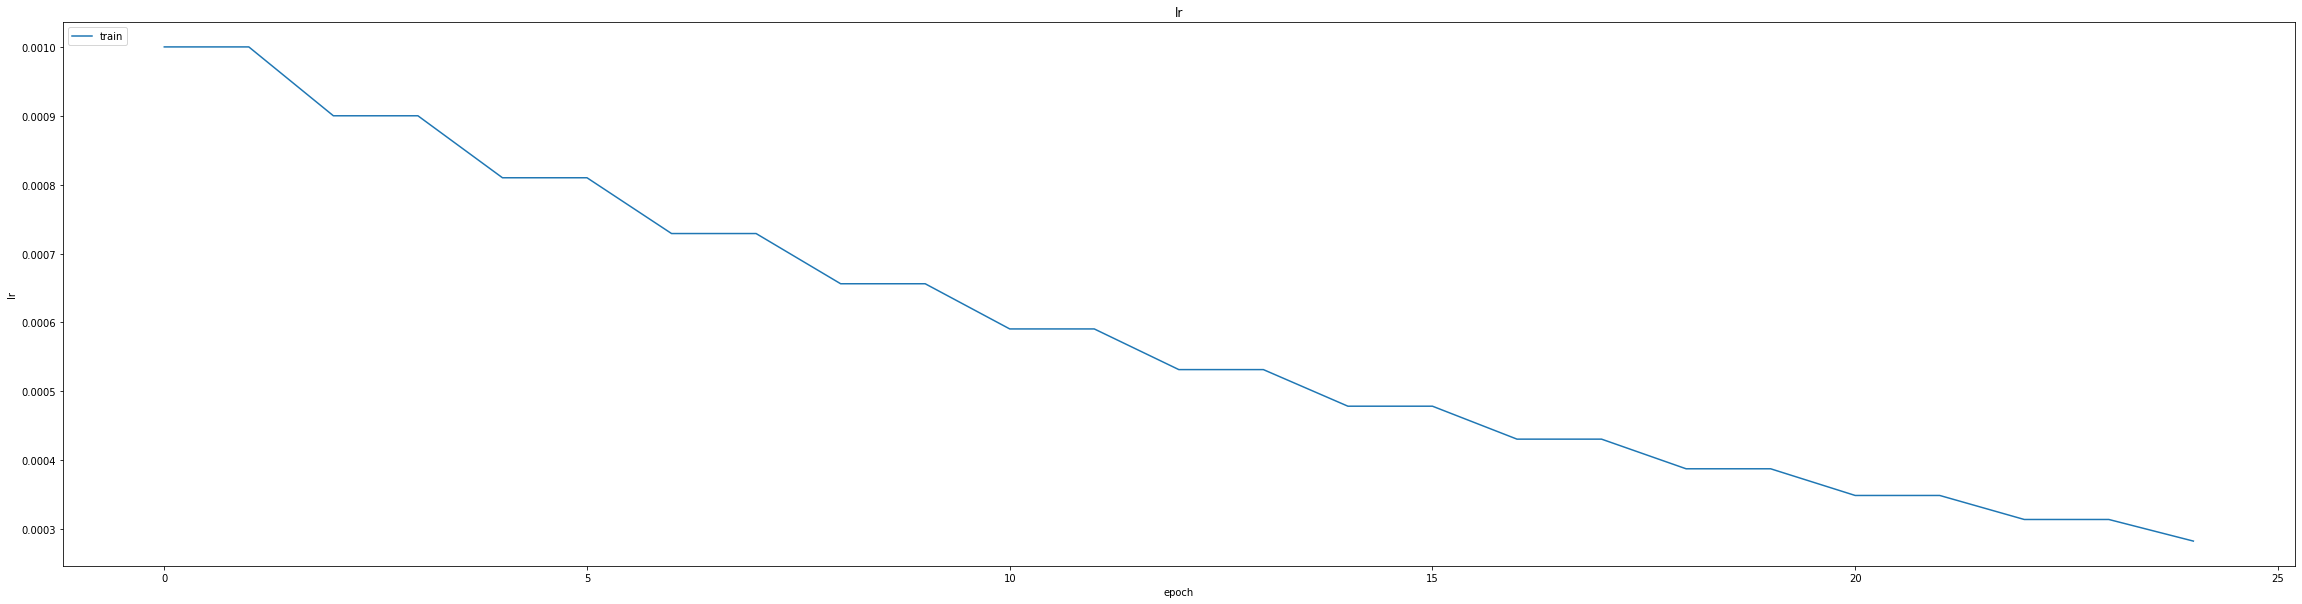

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.019752824679017067
0.023815233260393143
234/234 [==============================] - 8s 28ms/step
0.986943791386037


234/234 [==============================] - 7s 29ms/step


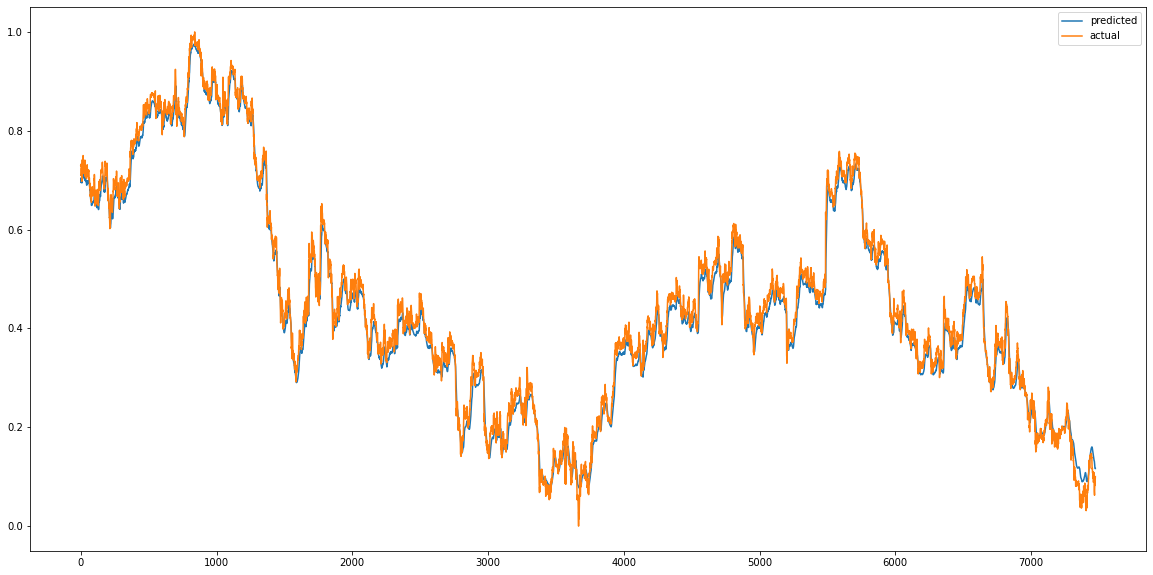

In [ ]:
model.load_weights("AUD15minLSTM.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


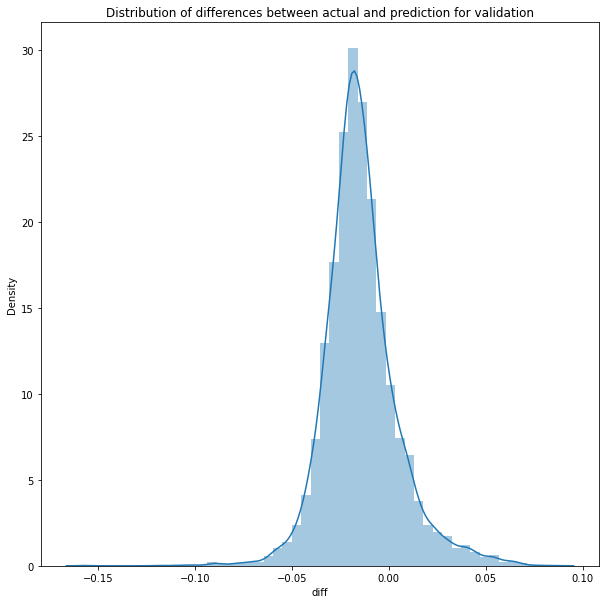

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 7s 29ms/step


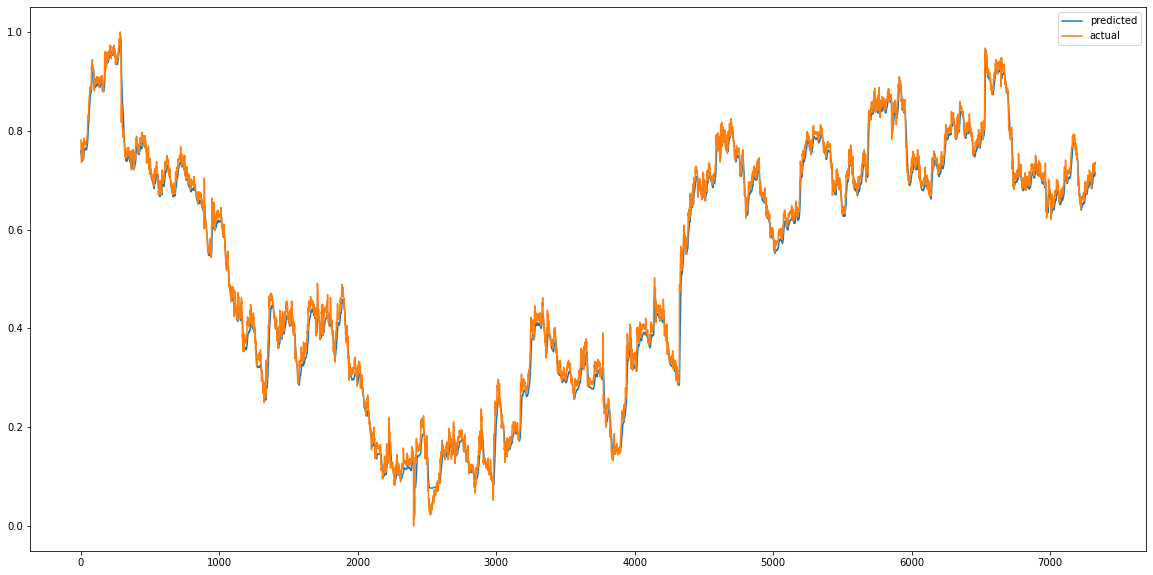

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


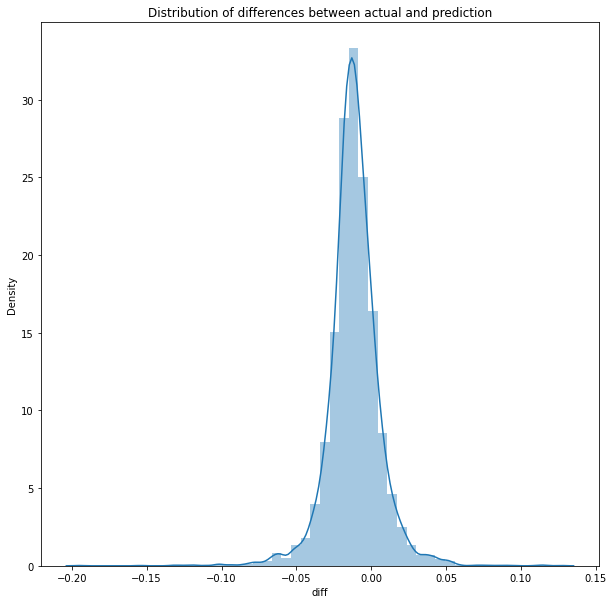

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00043332389898763363
MAE :  0.015922042631071456
RMSE  : 0.020816433387774037
229/229 [==============================] - 7s 29ms/step
R2_Score  : 0.9930300922652944


count    7327.000000
mean       -0.011547
std         0.017321
min        -0.194935
25%        -0.019579
50%        -0.011778
75%        -0.003035
max         0.126456
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 197.1857 - mae: 2.0335 - mse: 197.1857 - root_mean_squared_error: 14.0423 - mape: 767.7272
Epoch 1: val_mse improved from inf to 0.23985, saving model to weights.best.hdf5
464/464 [==============================] - 138s 280ms/step - loss: 197.1857 - mae: 2.0335 - mse: 197.1857 - root_mean_squared_error: 14.0423 - mape: 767.7272 - val_loss: 0.2398 - val_mae: 0.4369 - val_mse: 0.2398 - val_root_mean_squared_error: 0.4897 - val_mape: 3581.4553
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.4560 - mae: 0.6535 - mse: 0.4560 - root_mean_squared_error: 0.6753 - mape: 571.1284
Epoch 2: val_mse improved from 0.23985 to 0.22744, saving model to weights.best.hdf5
464/464 [==============================] - 127s 273ms/step - loss: 0.4560 - mae: 0.6535 - mse: 0.4560 - root_mean_squared_error: 0.6753 - mape: 571.1284 - val_loss: 0.2274 - val_mae: 0.4222 - val_mse: 0.2274 - val_root_mean_squared_error: 0.476

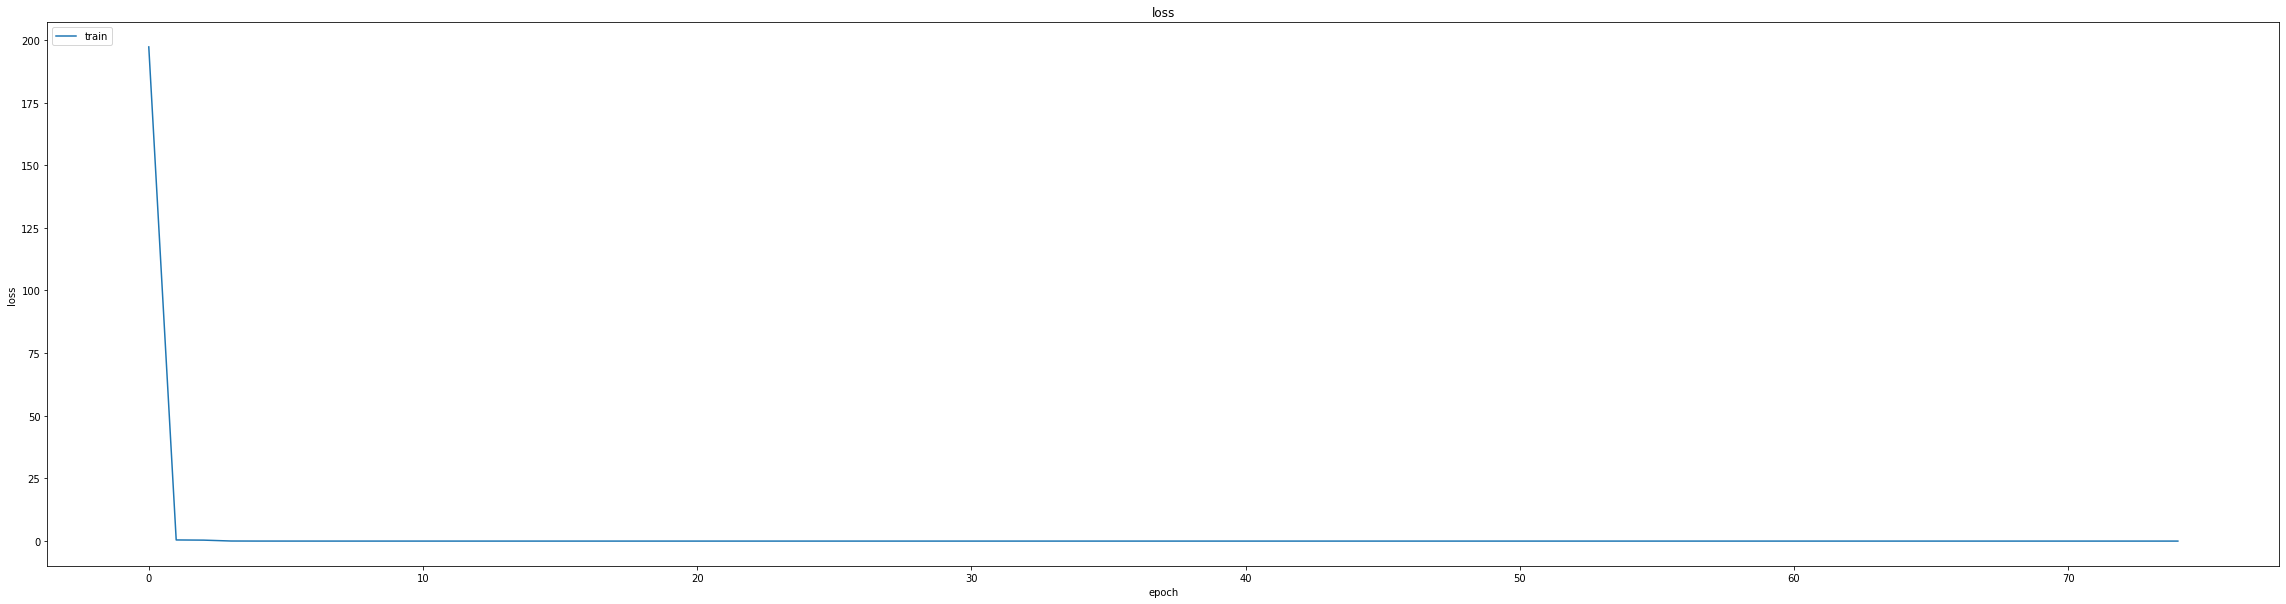

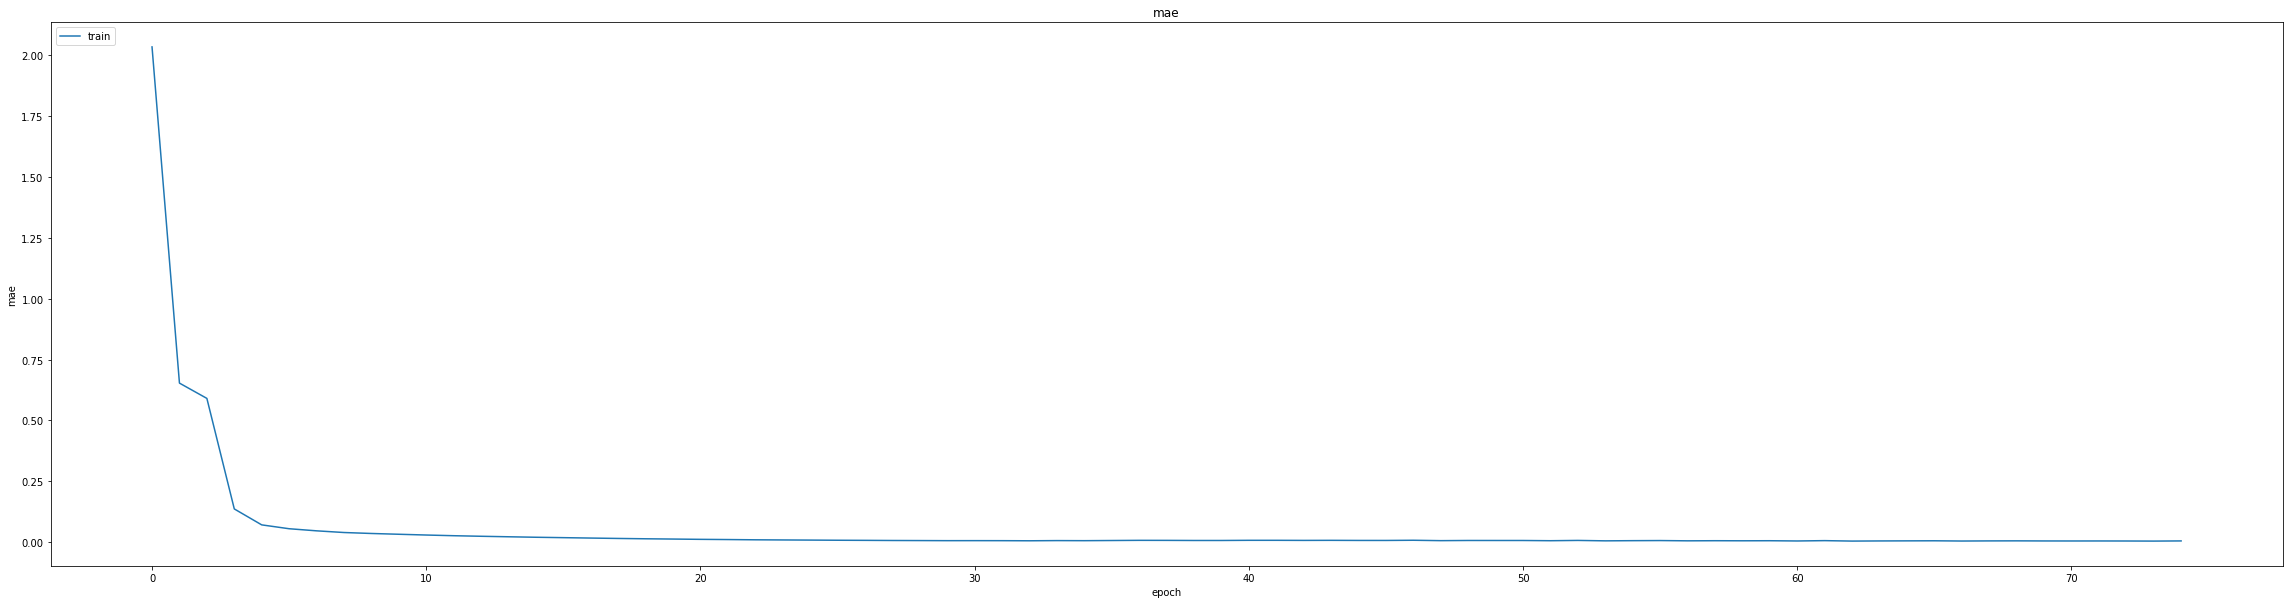

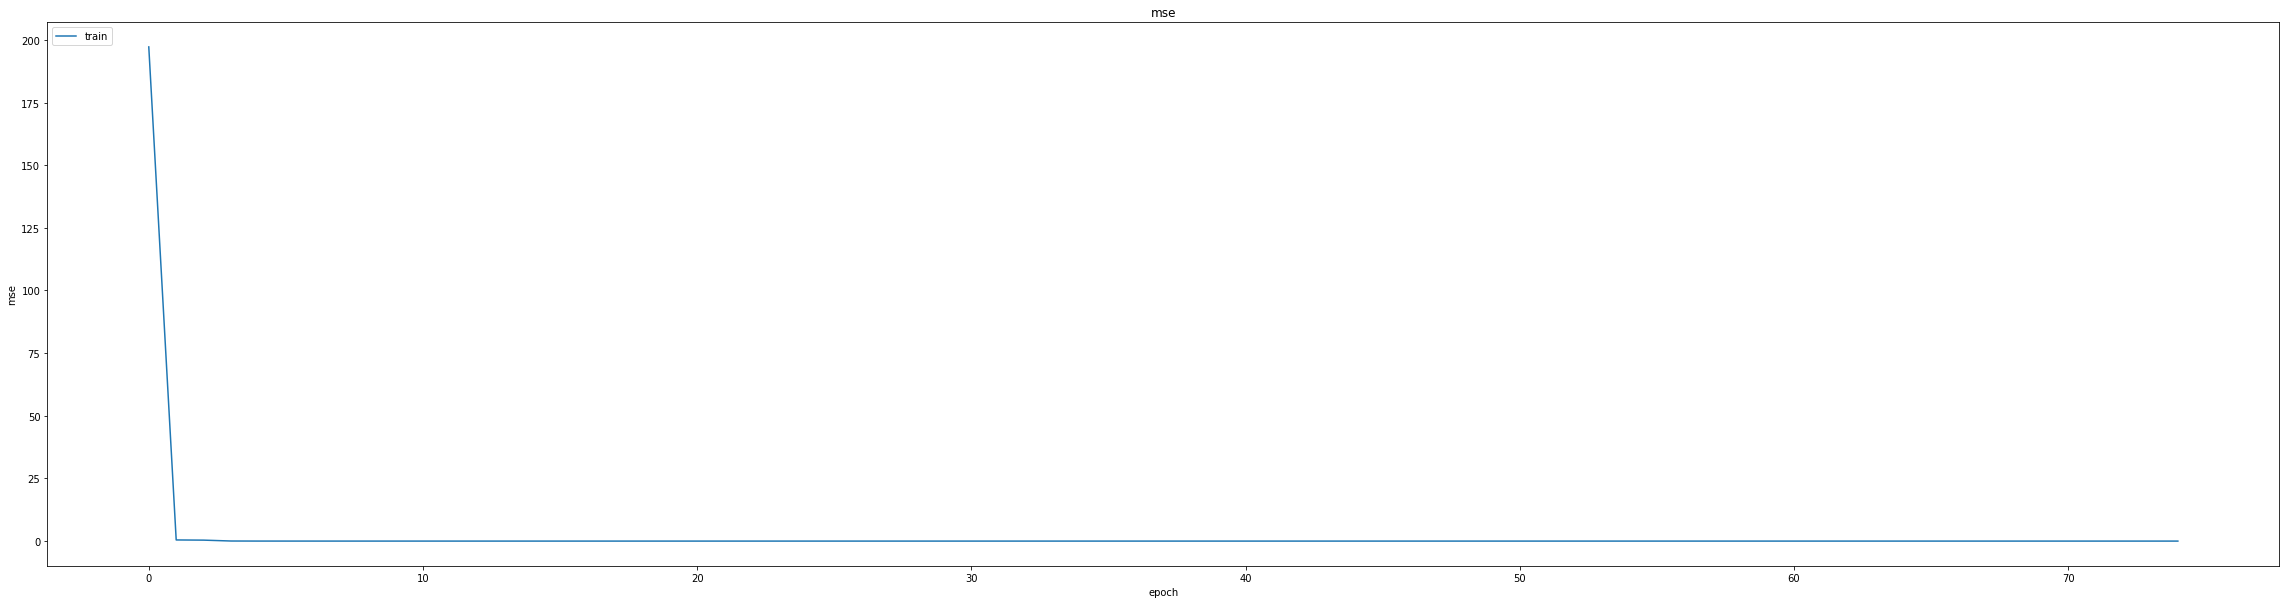

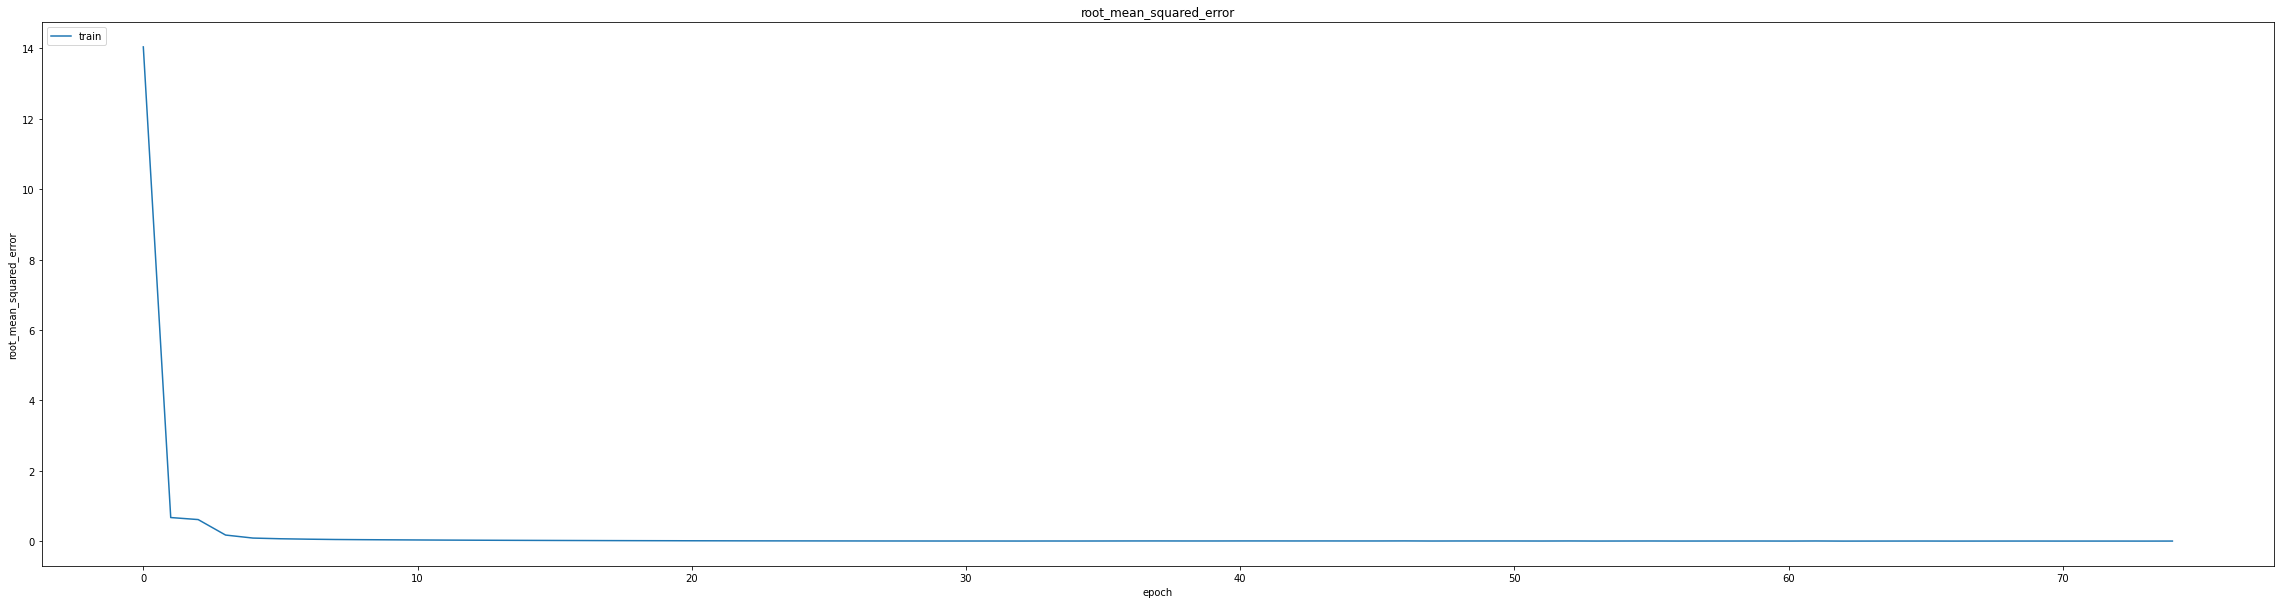

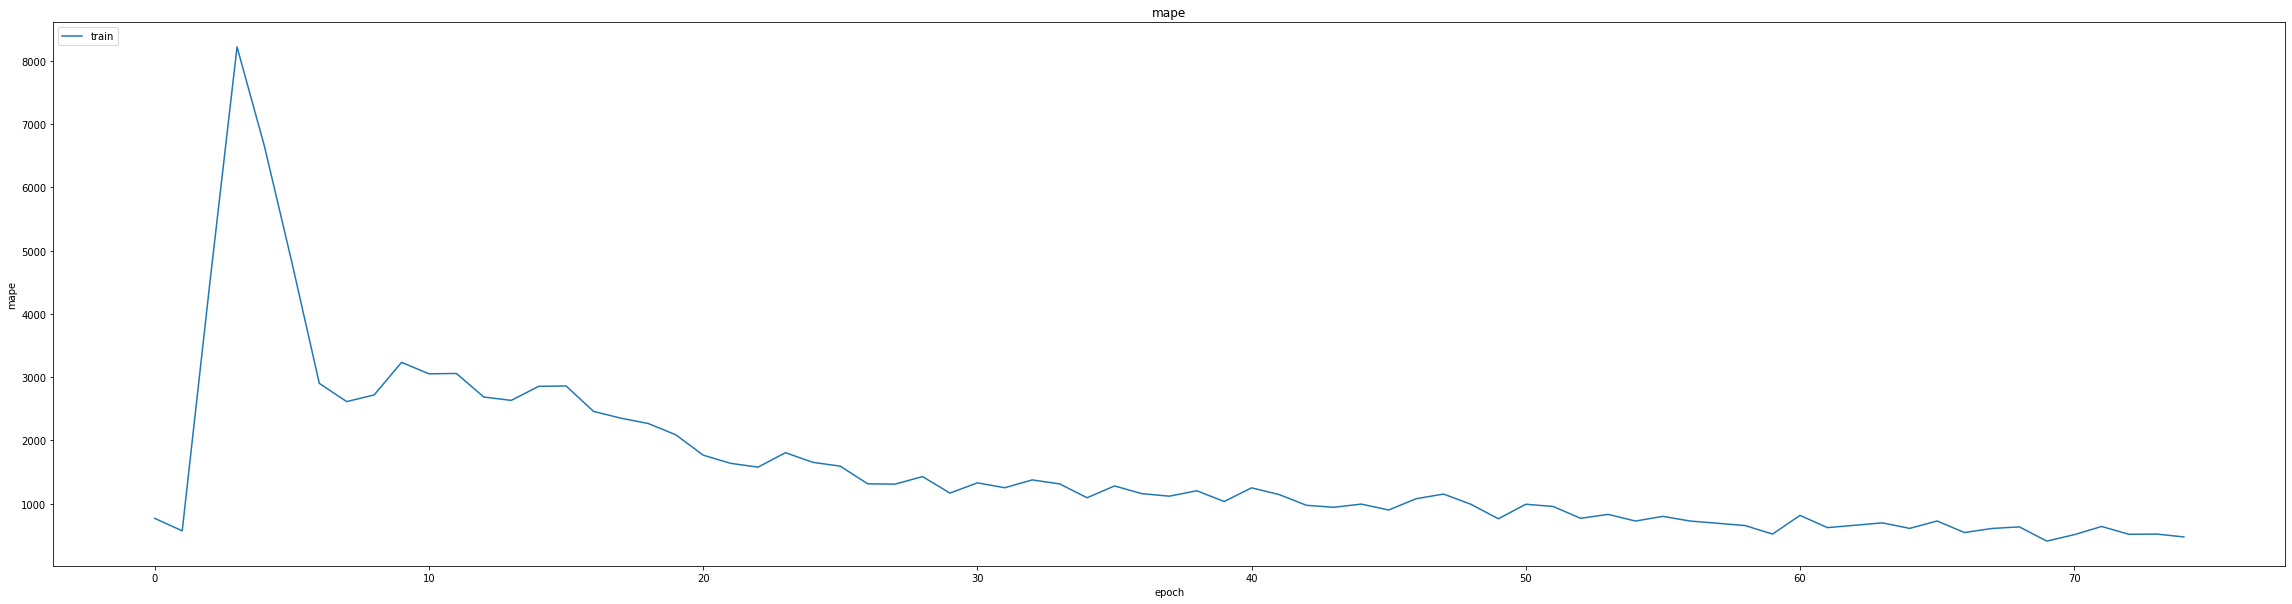

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.037686076015233994
0.04312619939446449
234/234 [==============================] - 10s 35ms/step
0.9540135675531903


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 2.9284e-04 - mae: 0.0061 - mse: 2.9284e-04 - root_mean_squared_error: 0.0171 - mape: 567.1239
Epoch 1: val_mse did not improve from 0.00186
464/464 [==============================] - 140s 285ms/step - loss: 2.9284e-04 - mae: 0.0061 - mse: 2.9284e-04 - root_mean_squared_error: 0.0171 - mape: 567.1239 - val_loss: 0.0023 - val_mae: 0.0452 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0484 - val_mape: 4473.2212 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.0542e-05 - mae: 0.0024 - mse: 1.0542e-05 - root_mean_squared_error: 0.0032 - mape: 733.3336
Epoch 2: val_mse did not improve from 0.00186
464/464 [==============================] - 125s 270ms/step - loss: 1.0542e-05 - mae: 0.0024 - mse: 1.0542e-05 - root_mean_squared_error: 0.0032 - mape: 733.3336 - val_loss: 0.0020 - val_mae: 0.0417 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0451 - val_mape: 4866.0771 - lr: 0.0010
lr

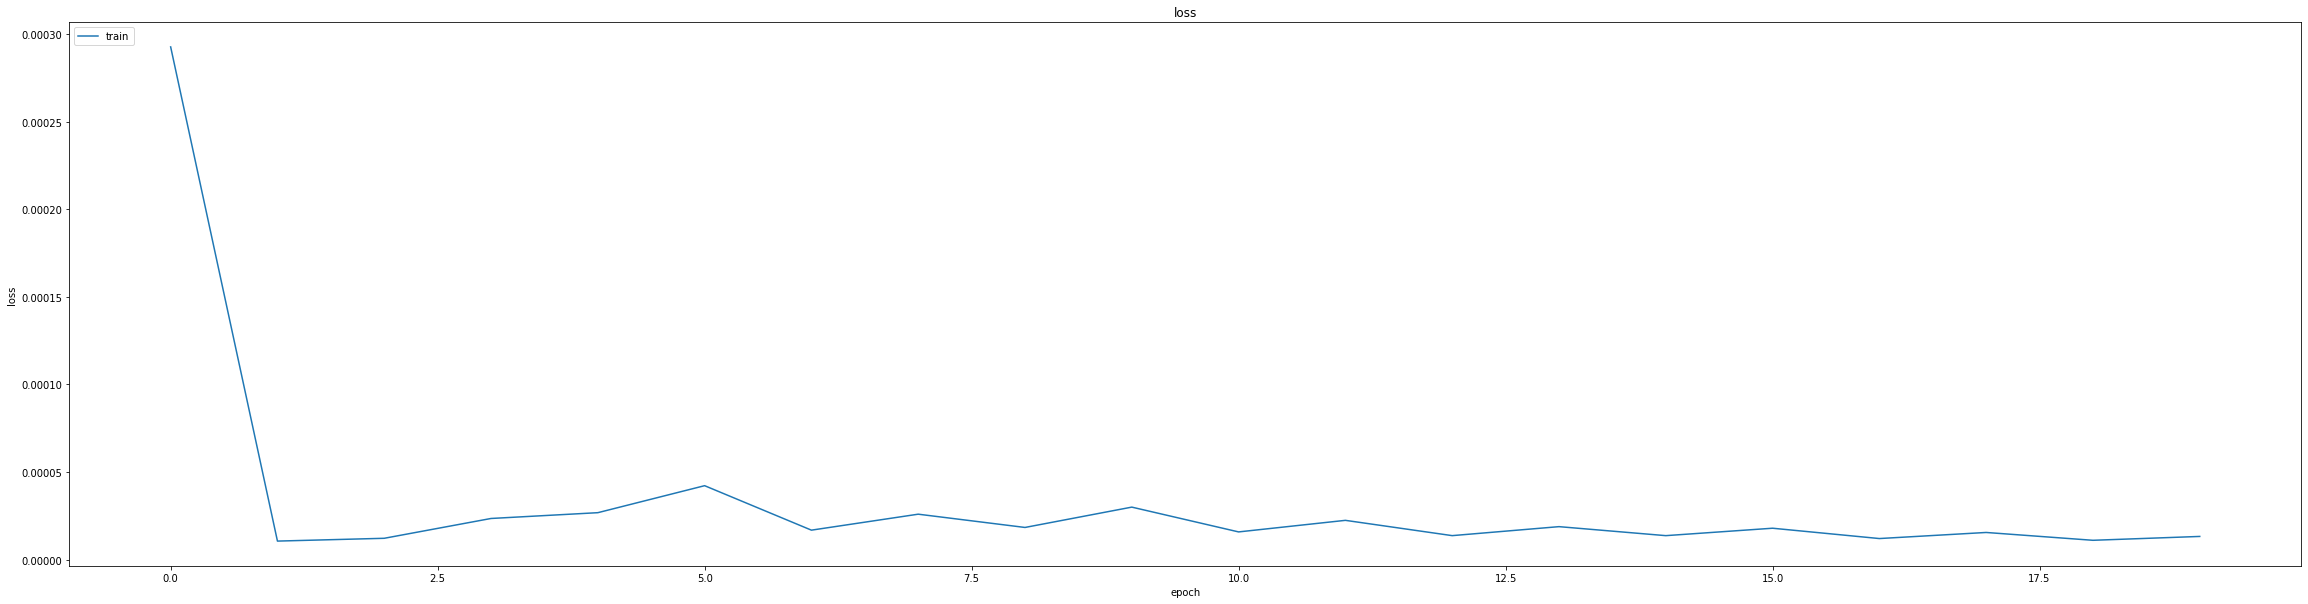

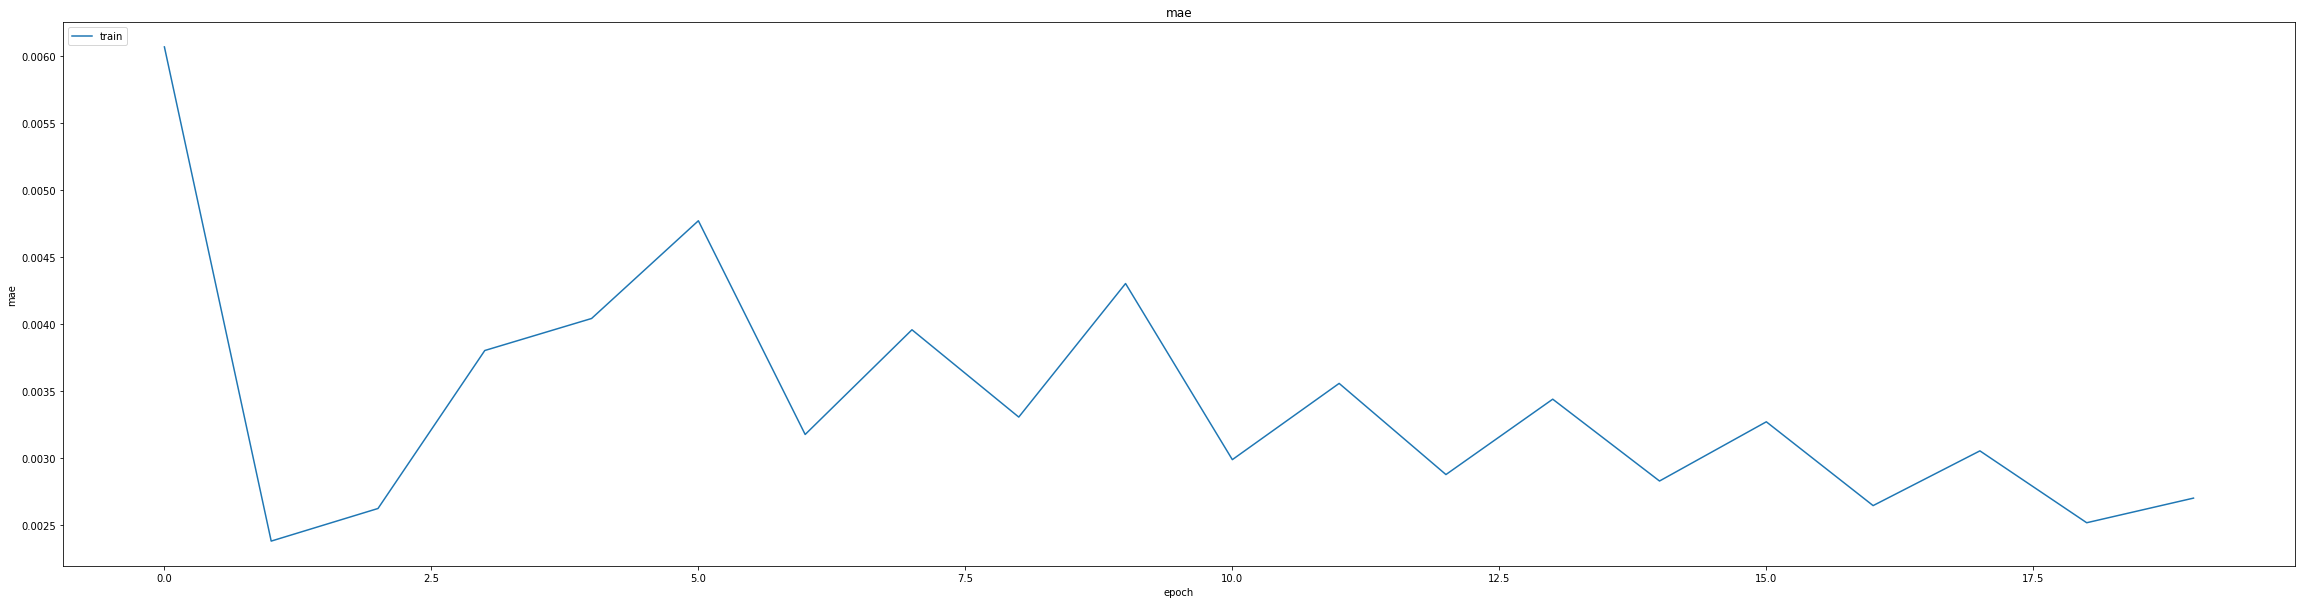

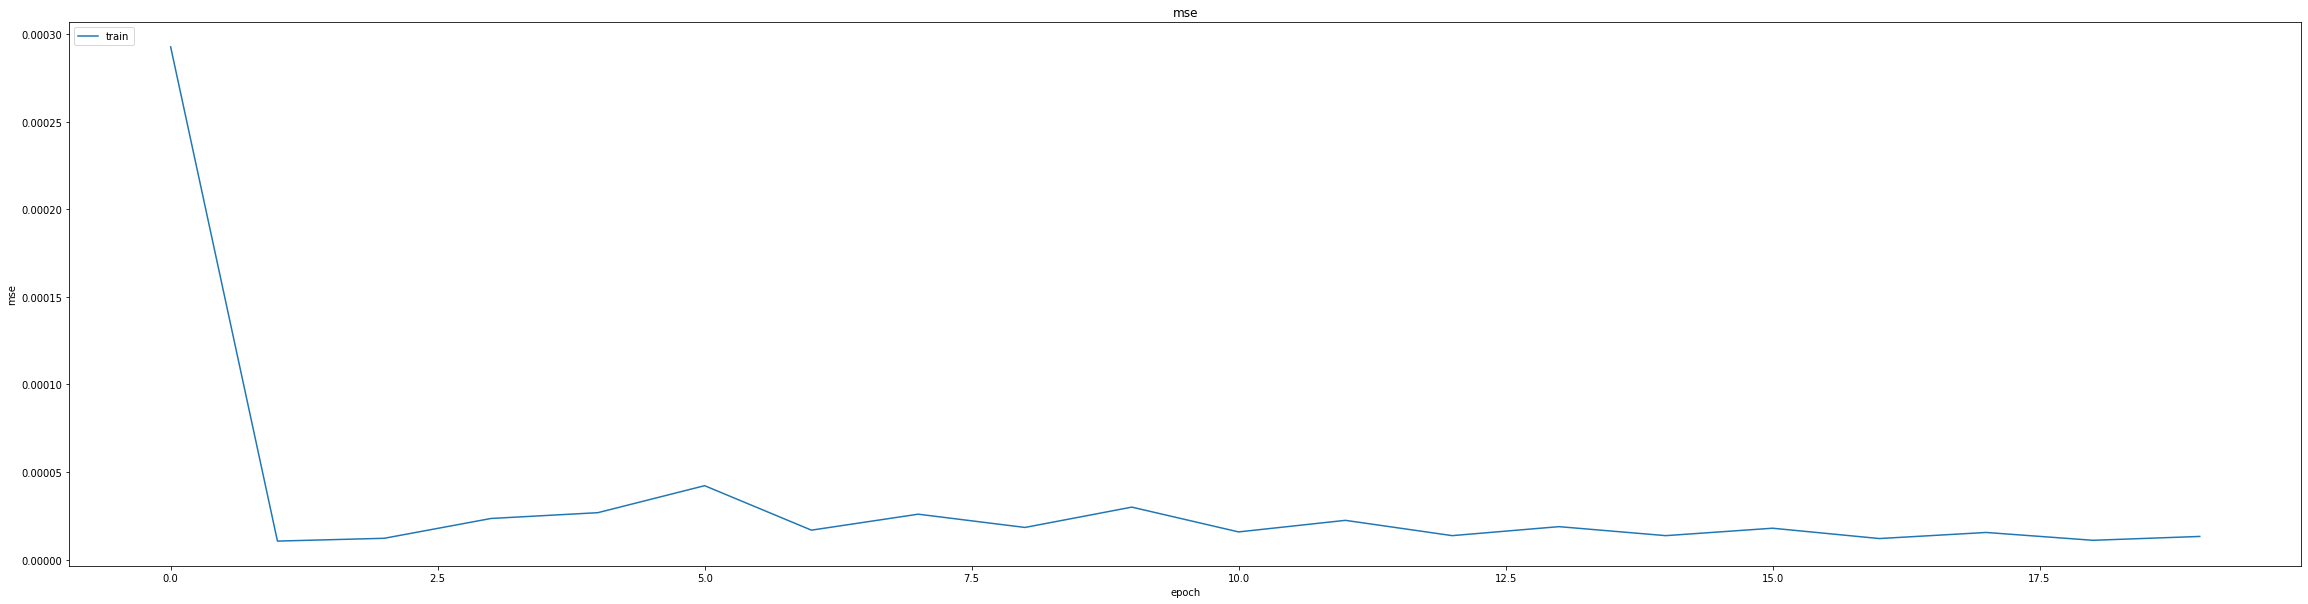

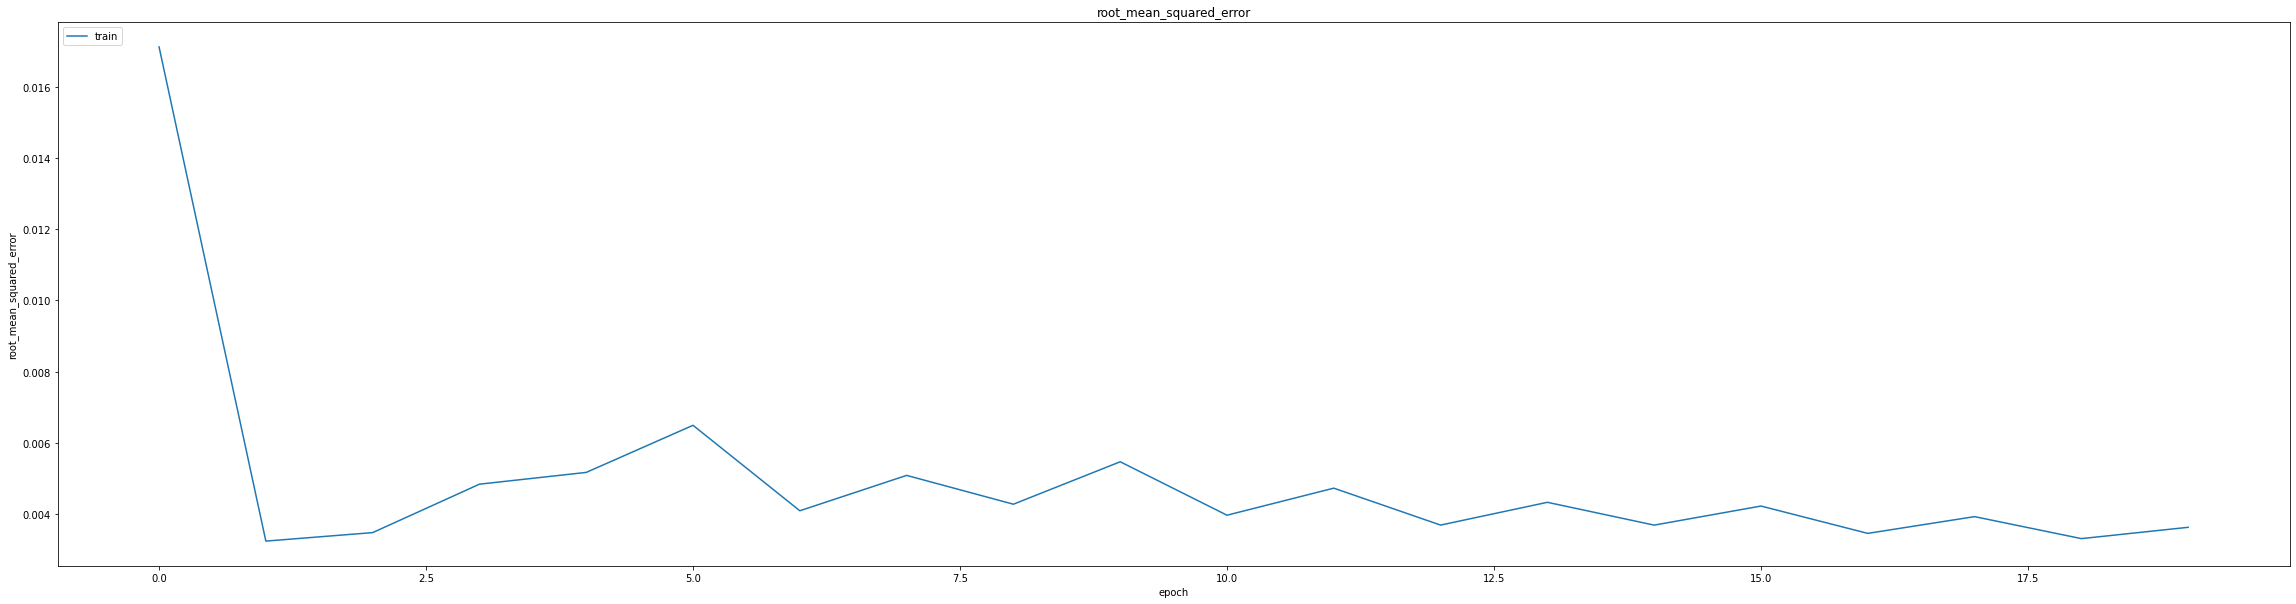

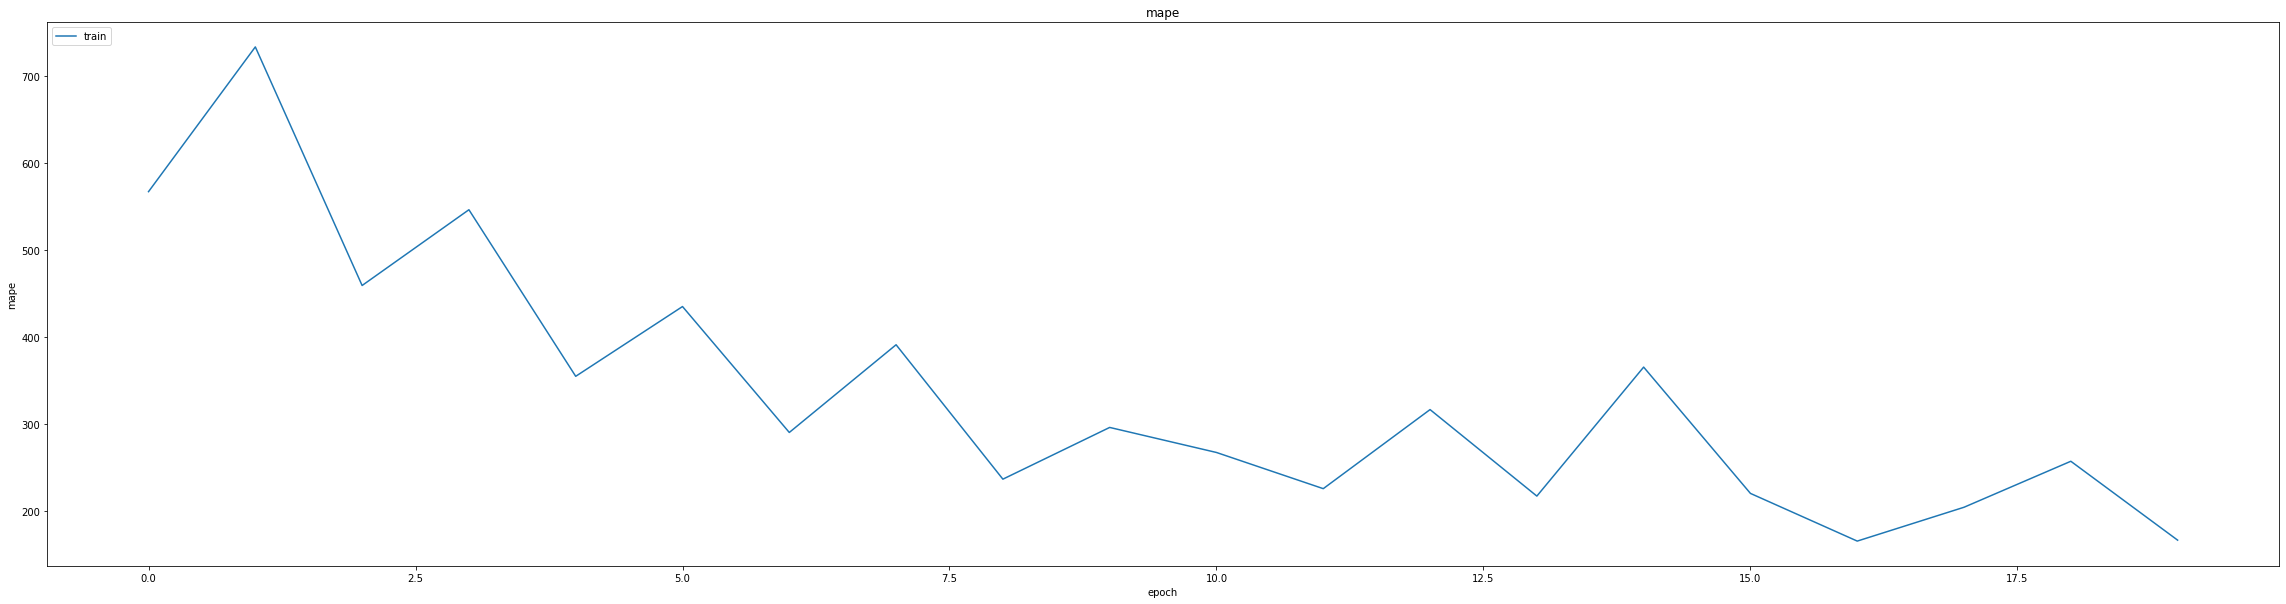

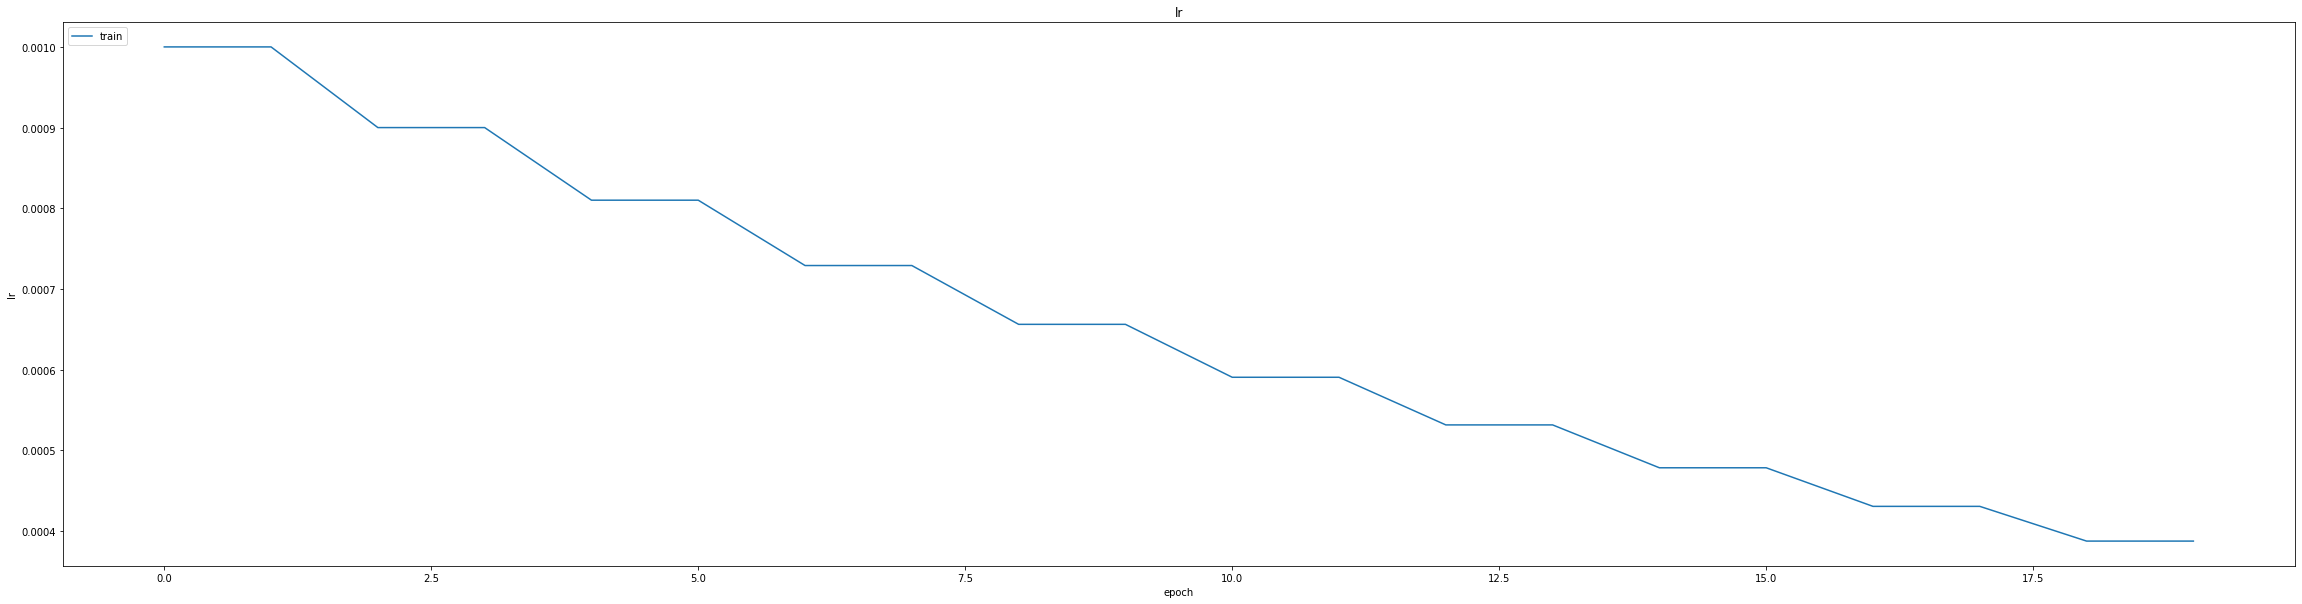

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03742864727973938
0.040868617594242096
234/234 [==============================] - 10s 35ms/step
0.9567086117343245


234/234 [==============================] - 8s 36ms/step


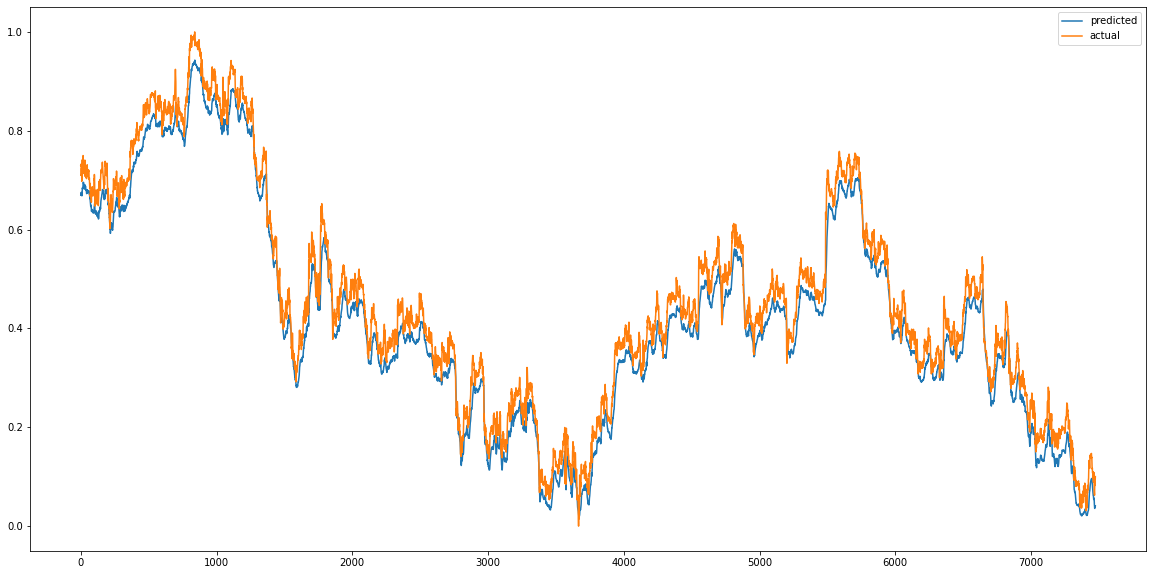

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


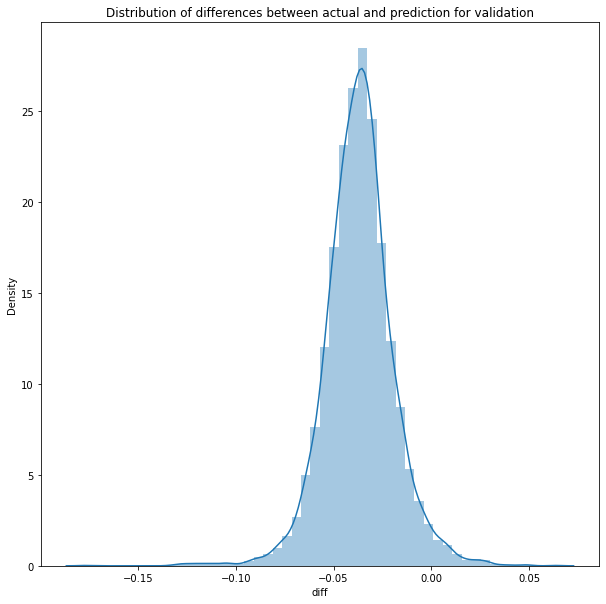

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 8s 36ms/step


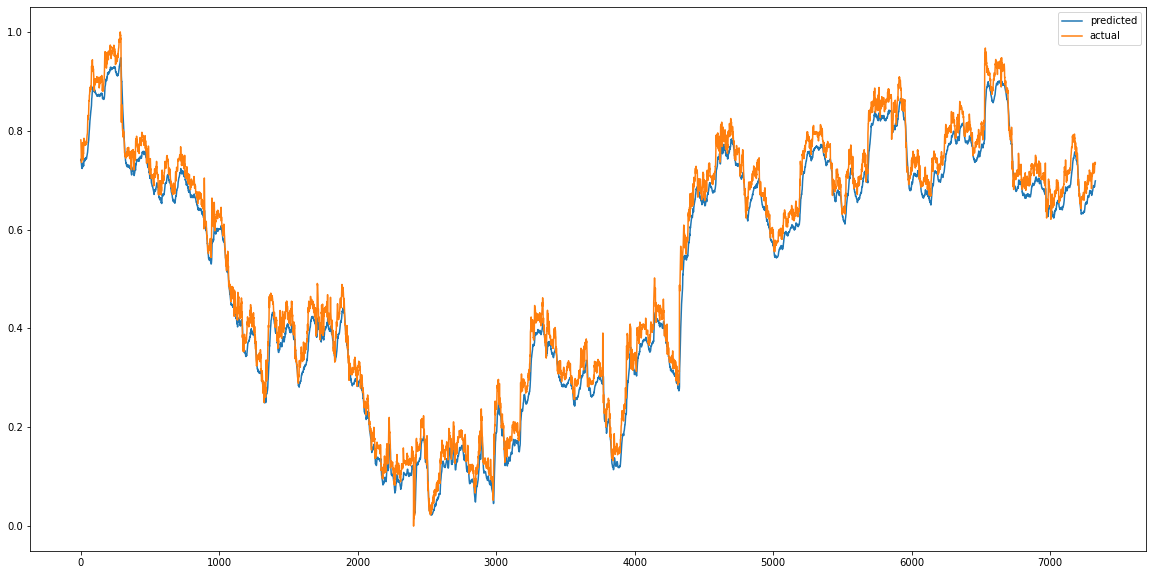

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


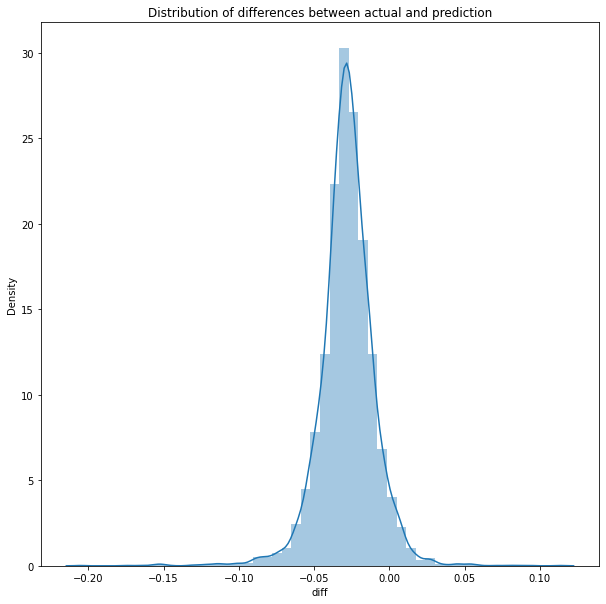

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0011368884298403566
MAE :  0.029300697703563746
RMSE  : 0.03371777616985374
229/229 [==============================] - 8s 35ms/step
R2_Score  : 0.9817134308220163


count    7327.000000
mean       -0.028180
std         0.018516
min        -0.205199
25%        -0.037099
50%        -0.027971
75%        -0.018391
max         0.113022
Name: diff, dtype: float64

In [ ]:
TargetIndex = df.columns.tolist().index('close')
HighIndex = df.columns.tolist().index('high')
LowIndex = df.columns.tolist().index('low')

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 201.3230 - mae: 1.7333 - mse: 201.3230 - root_mean_squared_error: 14.1888 - mape: 5237.4990
Epoch 1: val_mse improved from inf to 0.00546, saving model to weights.best.hdf5
464/464 [==============================] - 133s 274ms/step - loss: 201.3230 - mae: 1.7333 - mse: 201.3230 - root_mean_squared_error: 14.1888 - mape: 5237.4990 - val_loss: 0.0055 - val_mae: 0.0574 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0739 - val_mape: 34280.3086
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0295 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 3961.1729
Epoch 2: val_mse improved from 0.00546 to 0.00451, saving model to weights.best.hdf5
464/464 [==============================] - 126s 271ms/step - loss: 0.0015 - mae: 0.0295 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 3961.1729 - val_loss: 0.0045 - val_mae: 0.0580 - val_mse: 0.0045 - val_root_mean_squared_error: 

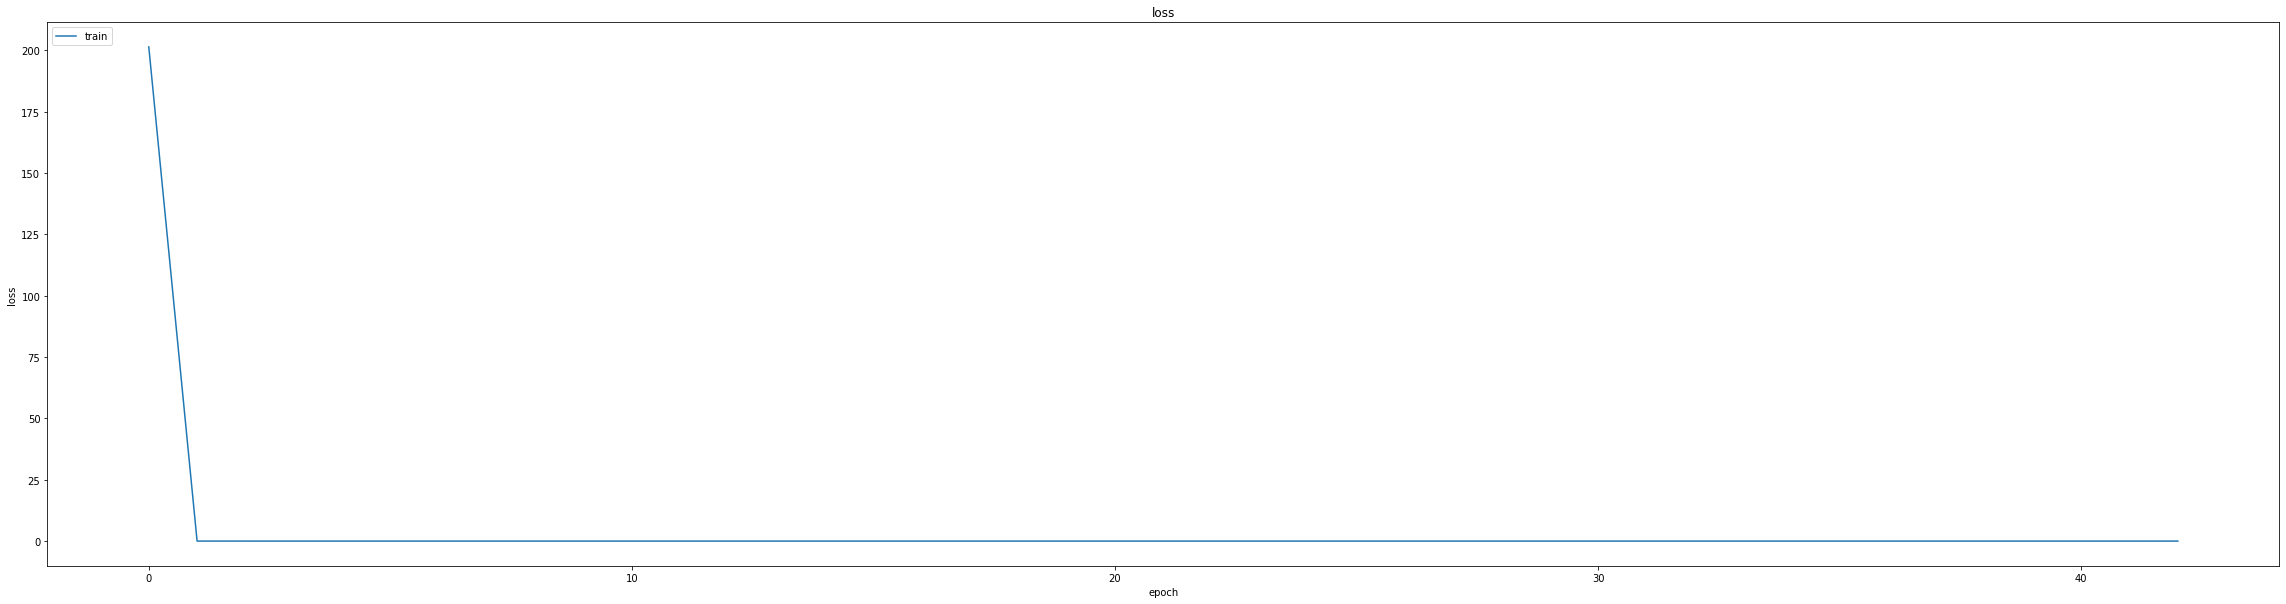

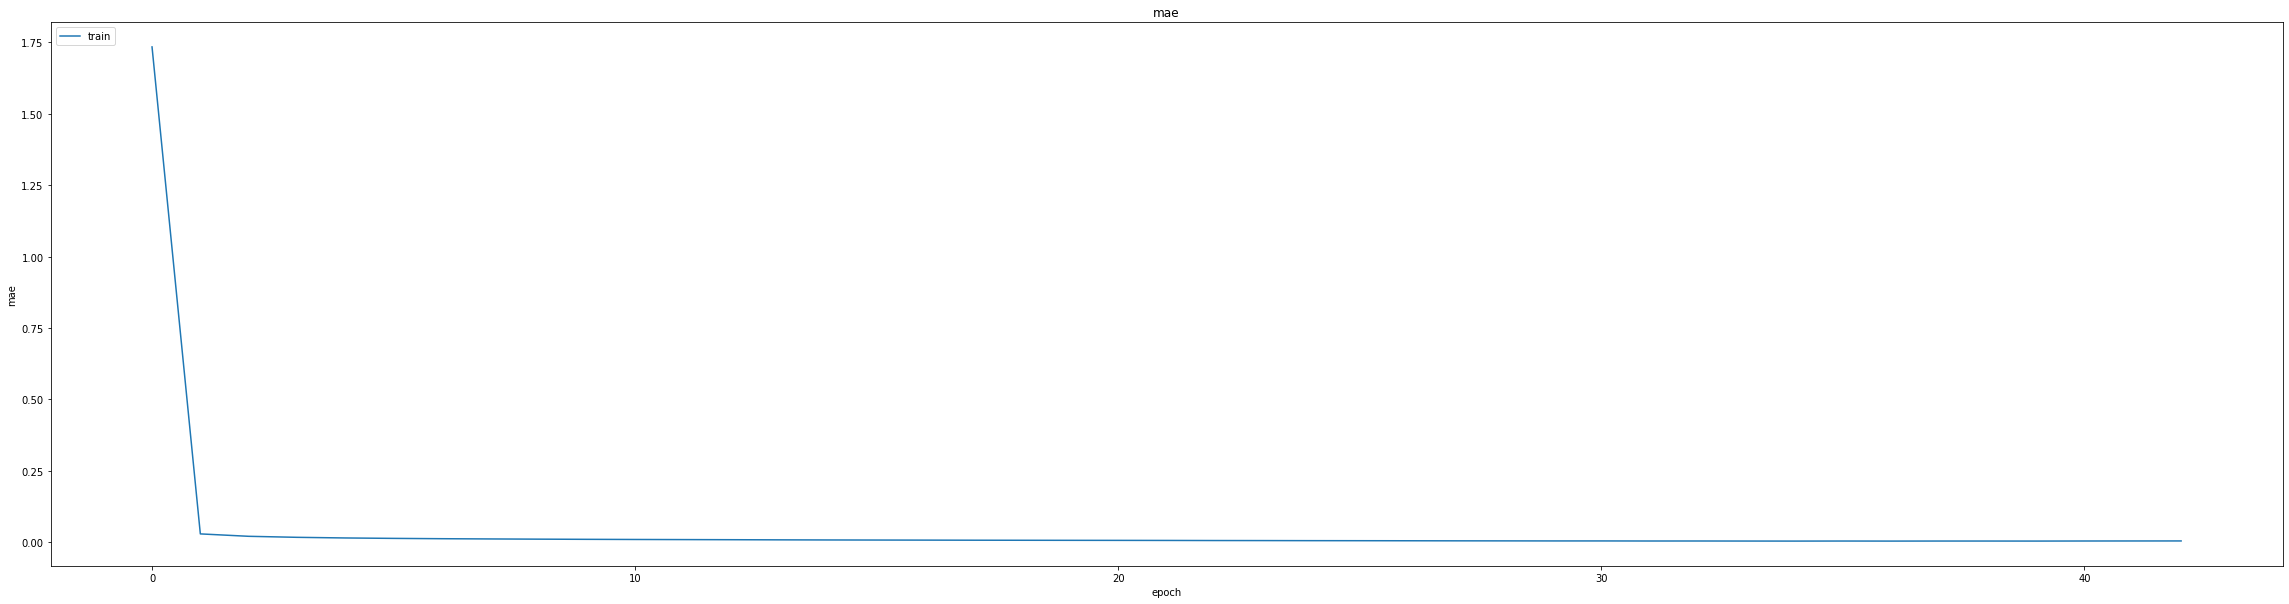

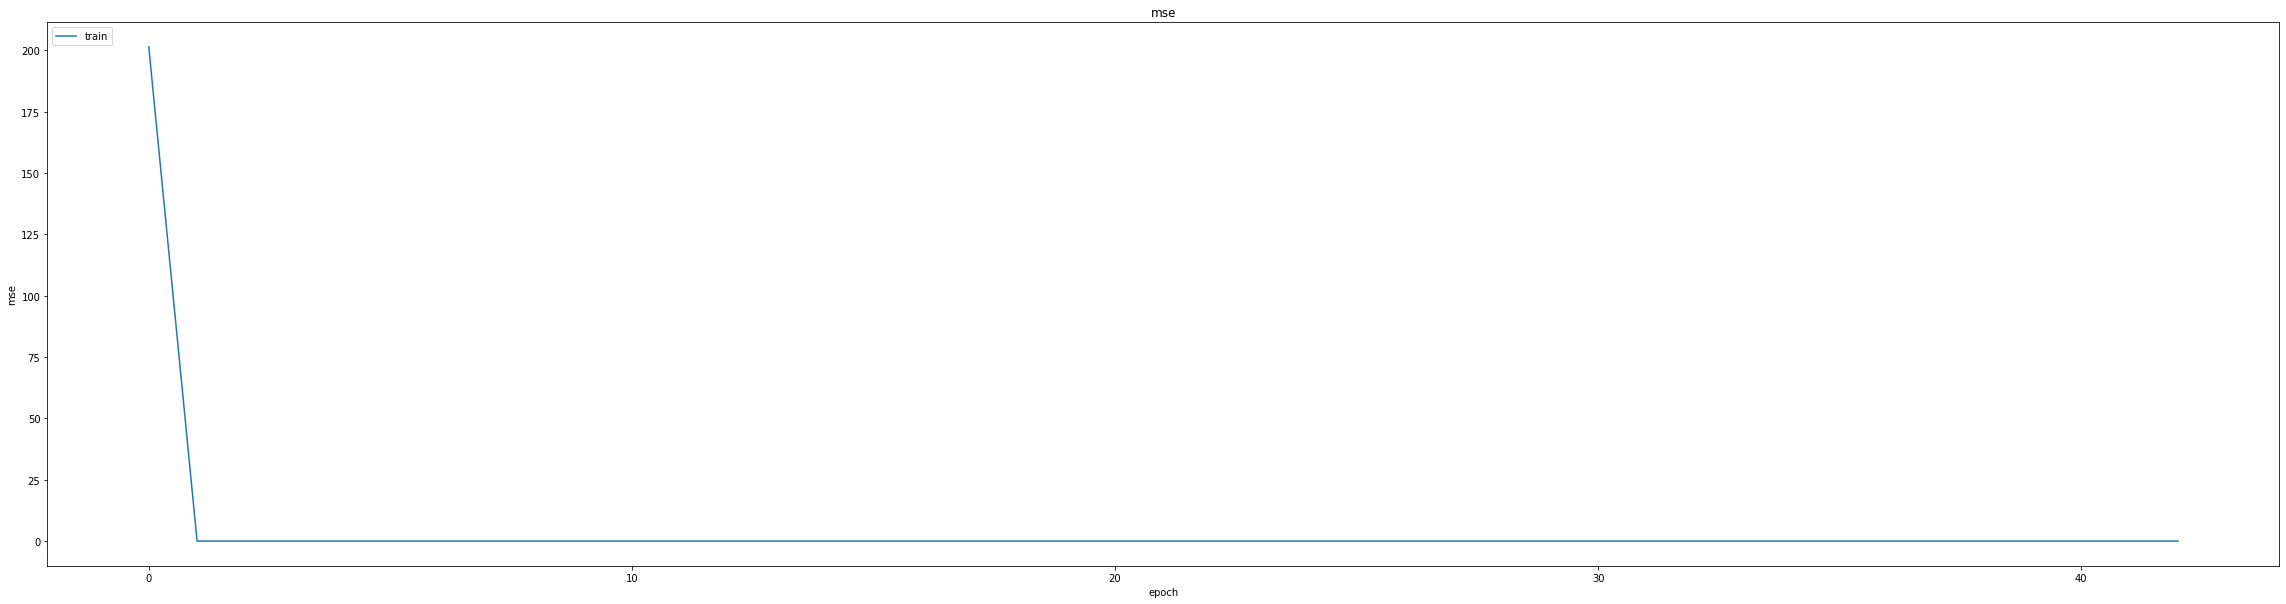

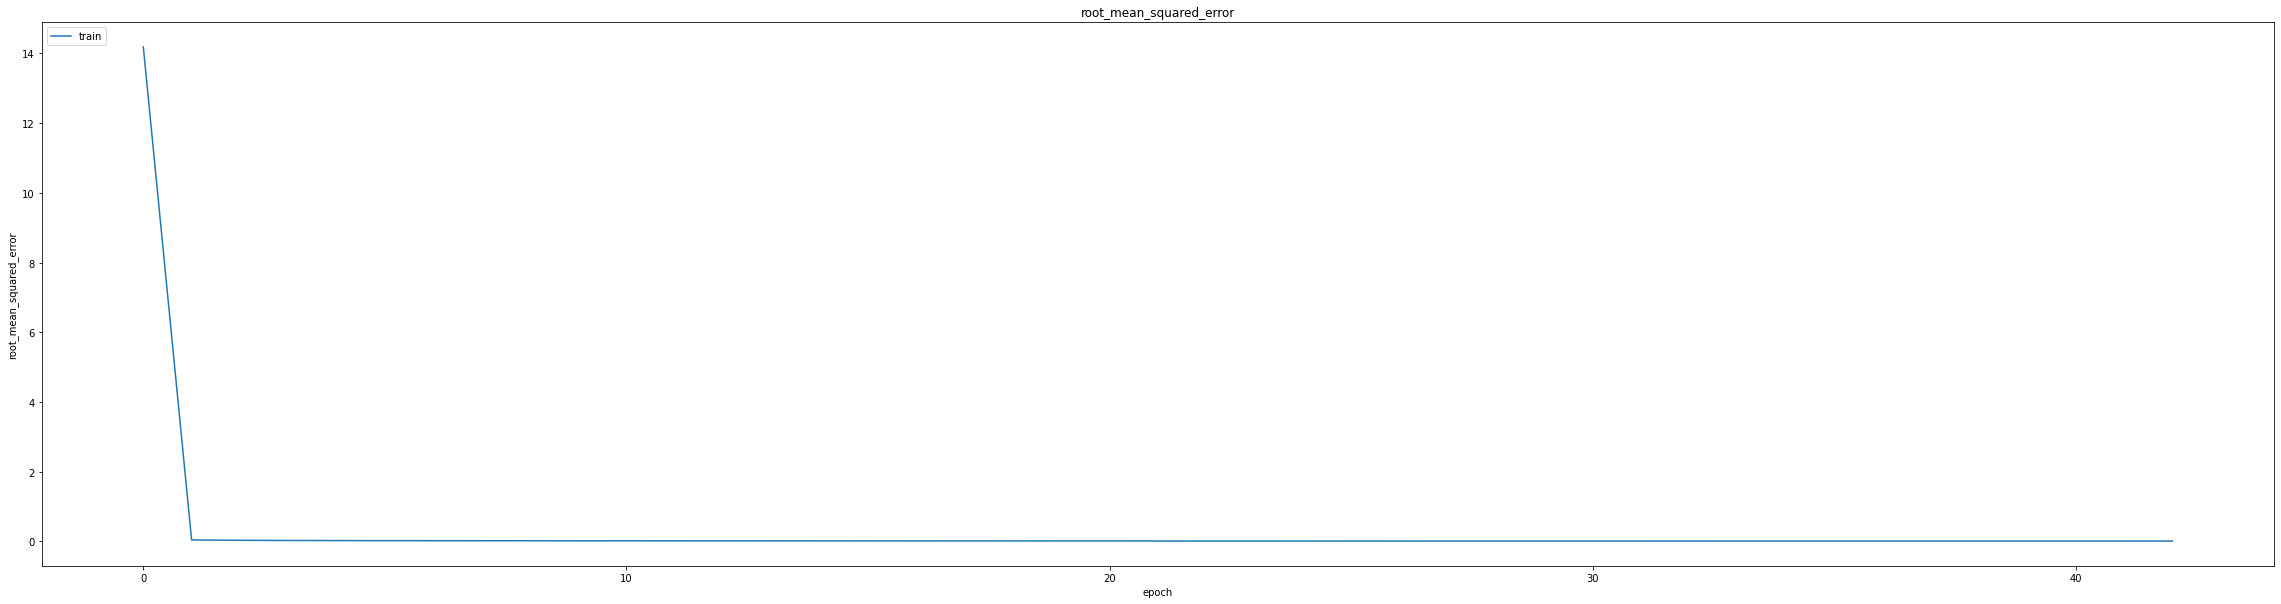

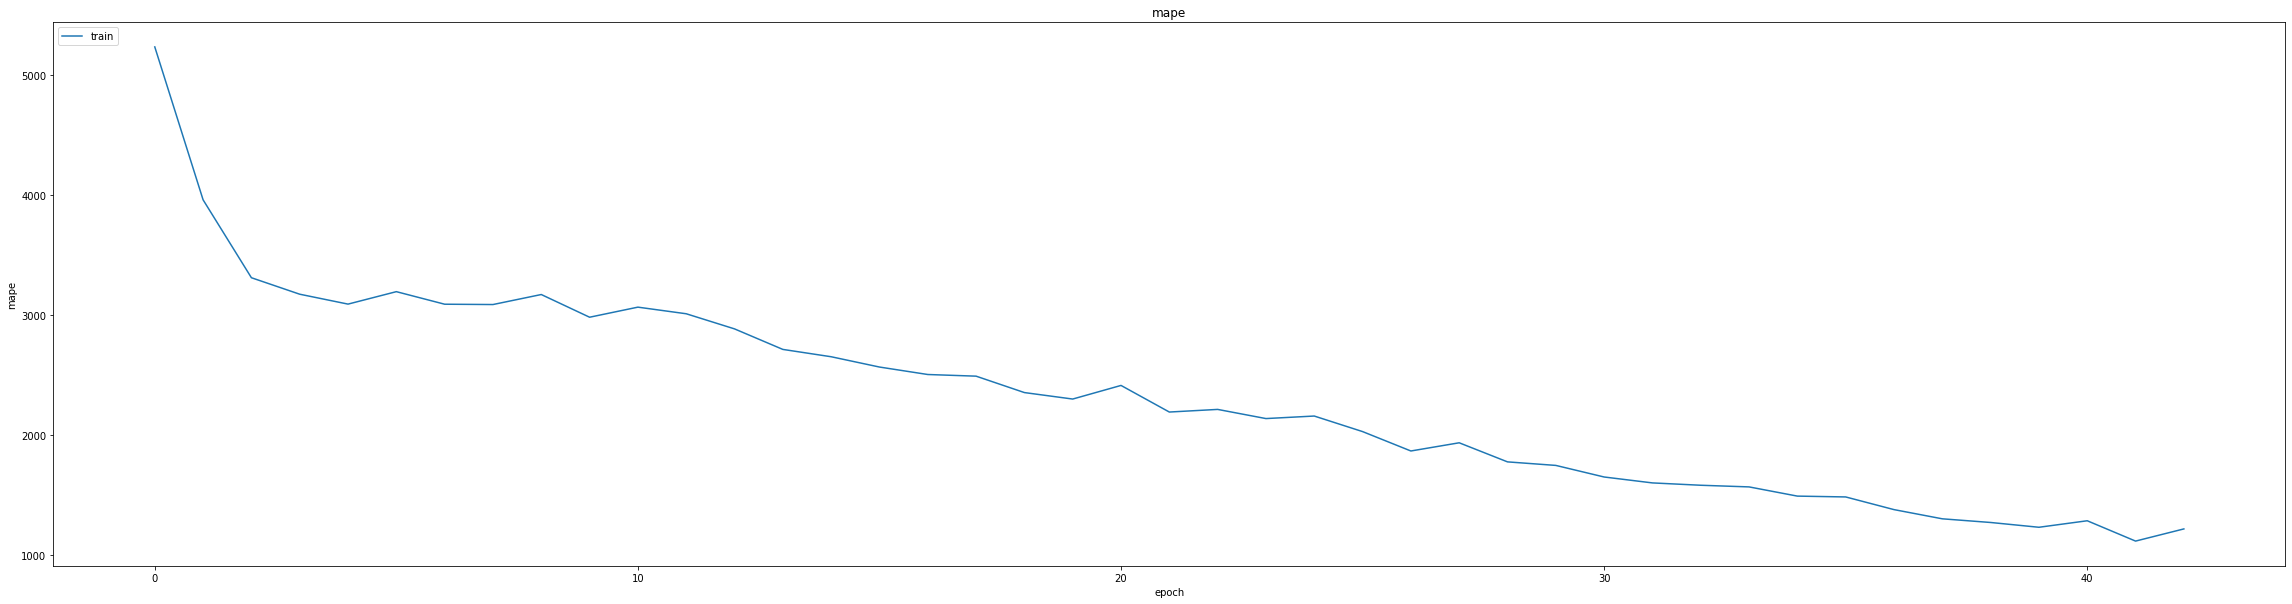

In [ ]:
thesis.SummarizeHistory(history)


In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03474542871117592
0.04281944781541824
234/234 [==============================] - 9s 34ms/step
0.9569101010202629


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 9.1076e-04 - mae: 0.0139 - mse: 9.1076e-04 - root_mean_squared_error: 0.0302 - mape: 2516.0698
Epoch 1: val_mse improved from 0.00183 to 0.00159, saving model to weights.best.hdf5
464/464 [==============================] - 128s 265ms/step - loss: 9.1076e-04 - mae: 0.0139 - mse: 9.1076e-04 - root_mean_squared_error: 0.0302 - mape: 2516.0698 - val_loss: 0.0016 - val_mae: 0.0320 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0399 - val_mape: 14382.7529 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 7.4918e-05 - mae: 0.0067 - mse: 7.4918e-05 - root_mean_squared_error: 0.0087 - mape: 1746.1027
Epoch 2: val_mse did not improve from 0.00159
464/464 [==============================] - 124s 268ms/step - loss: 7.4918e-05 - mae: 0.0067 - mse: 7.4918e-05 - root_mean_squared_error: 0.0087 - mape: 1746.1027 - val_loss: 0.0018 - val_mae: 0.0359 - val_mse: 0.0018 - val_root_mean_squared_error: 

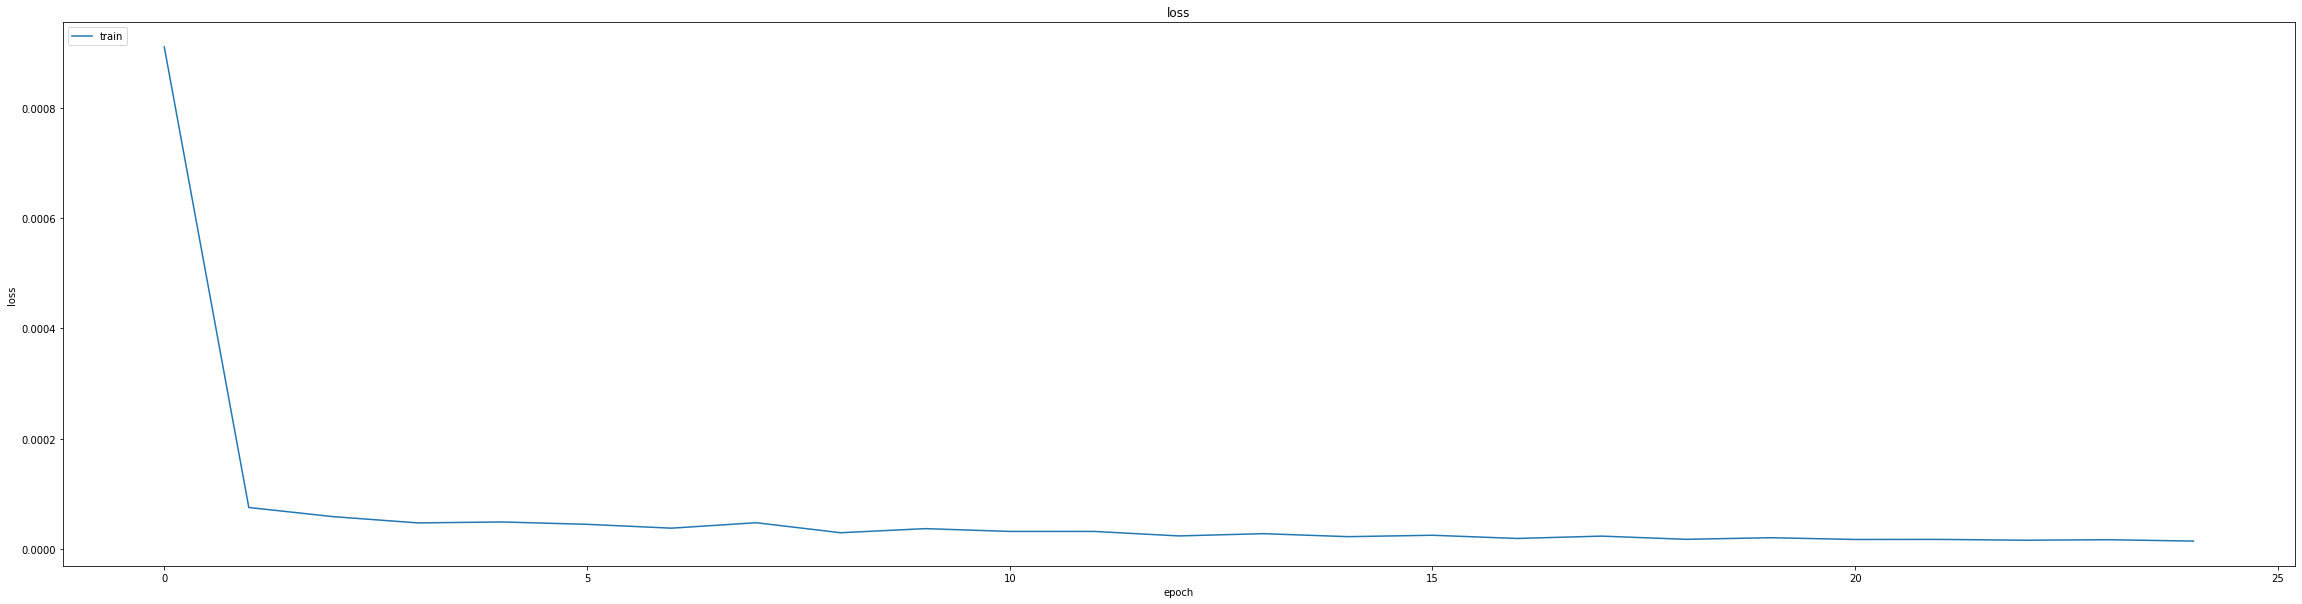

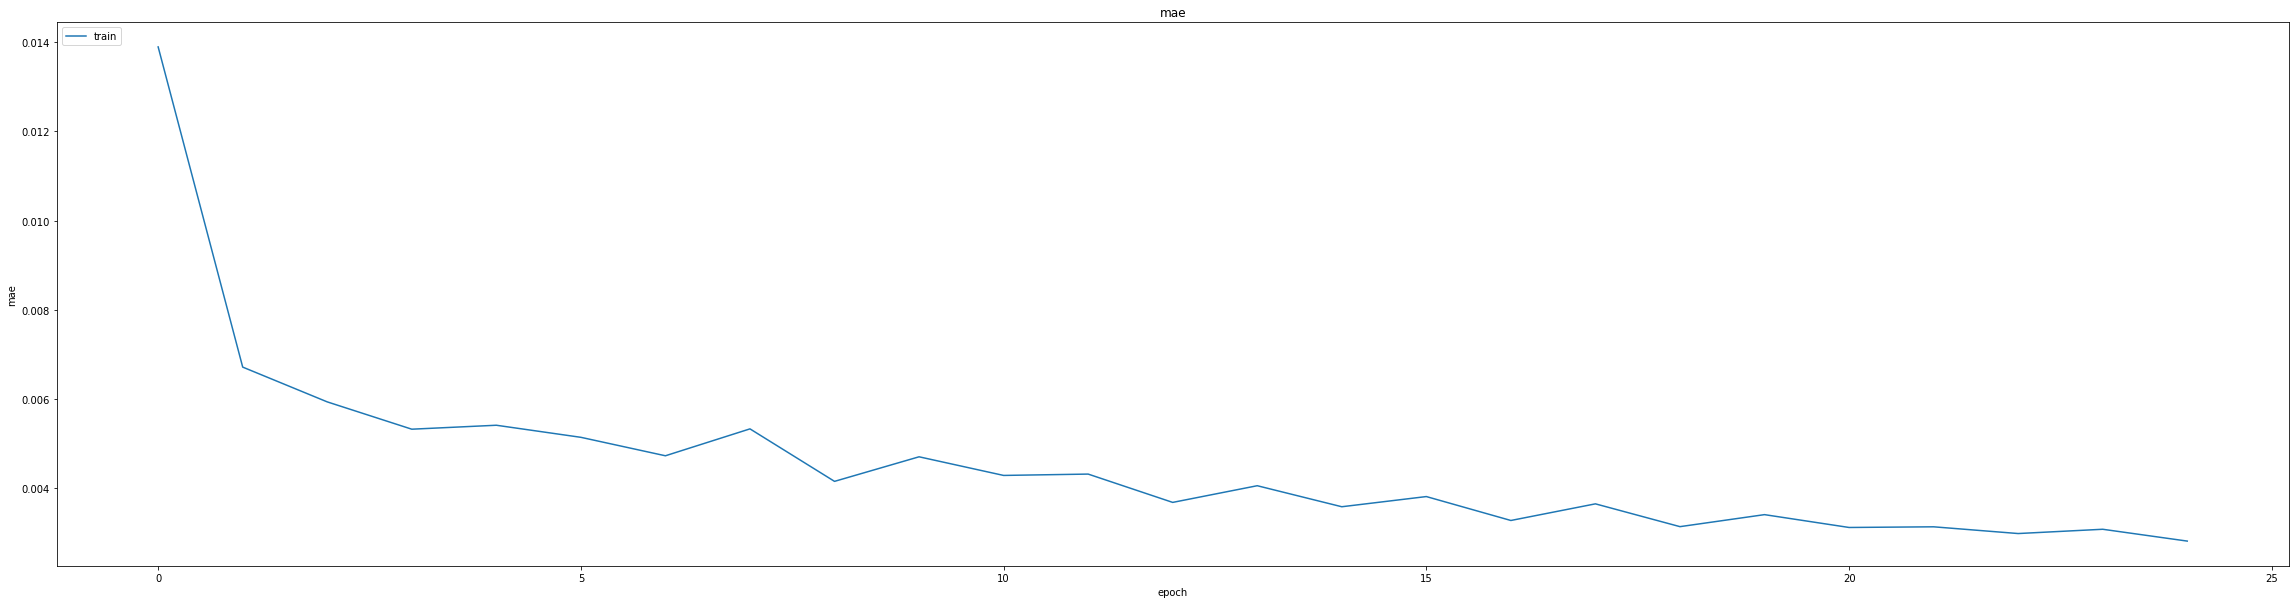

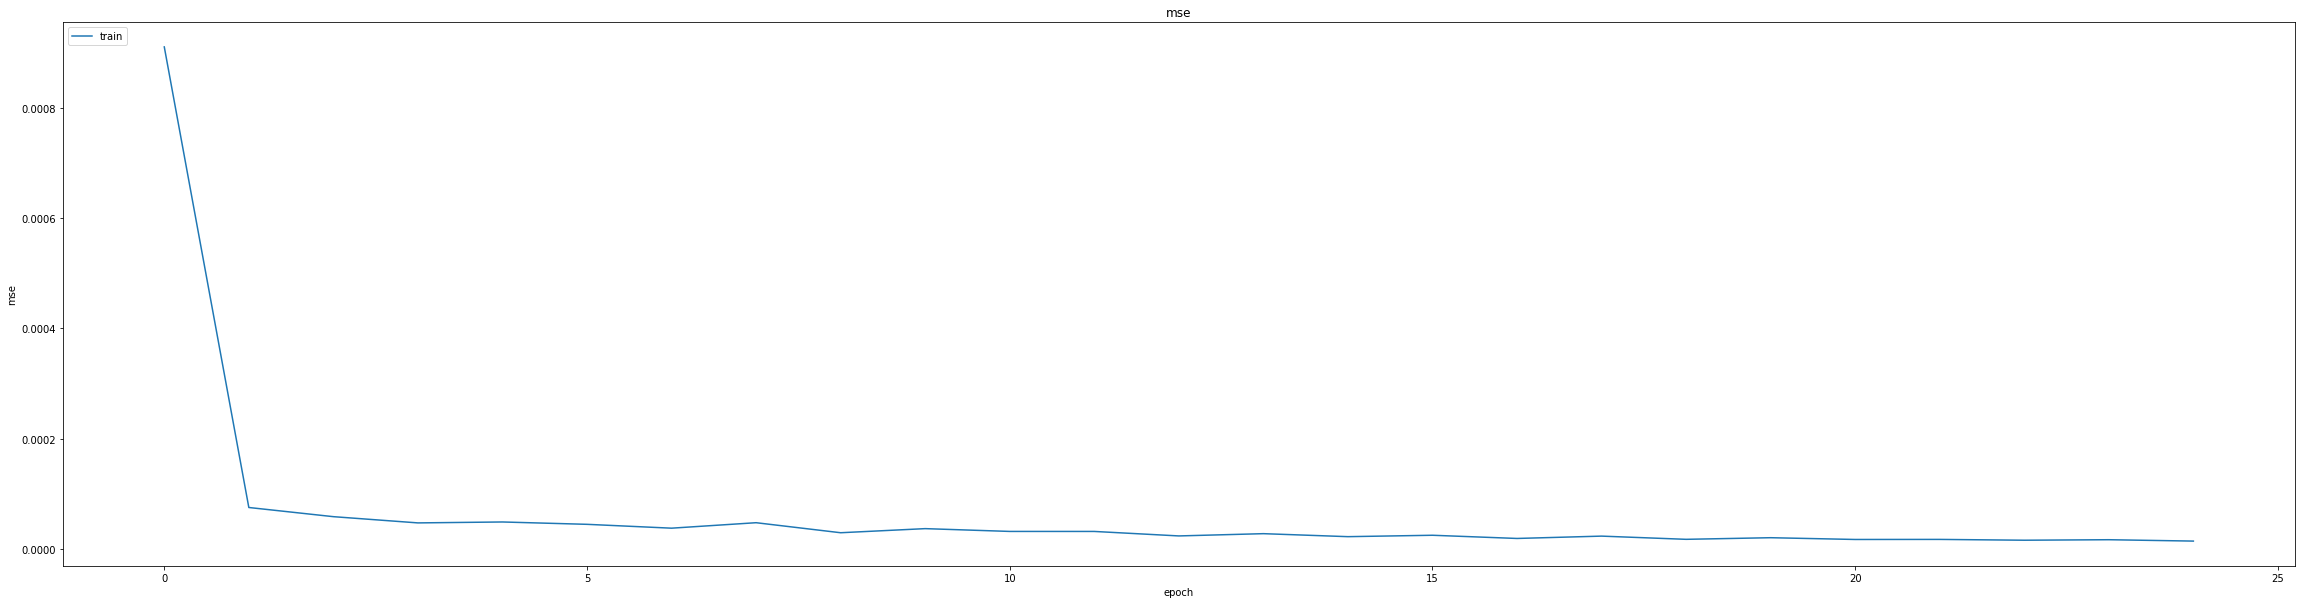

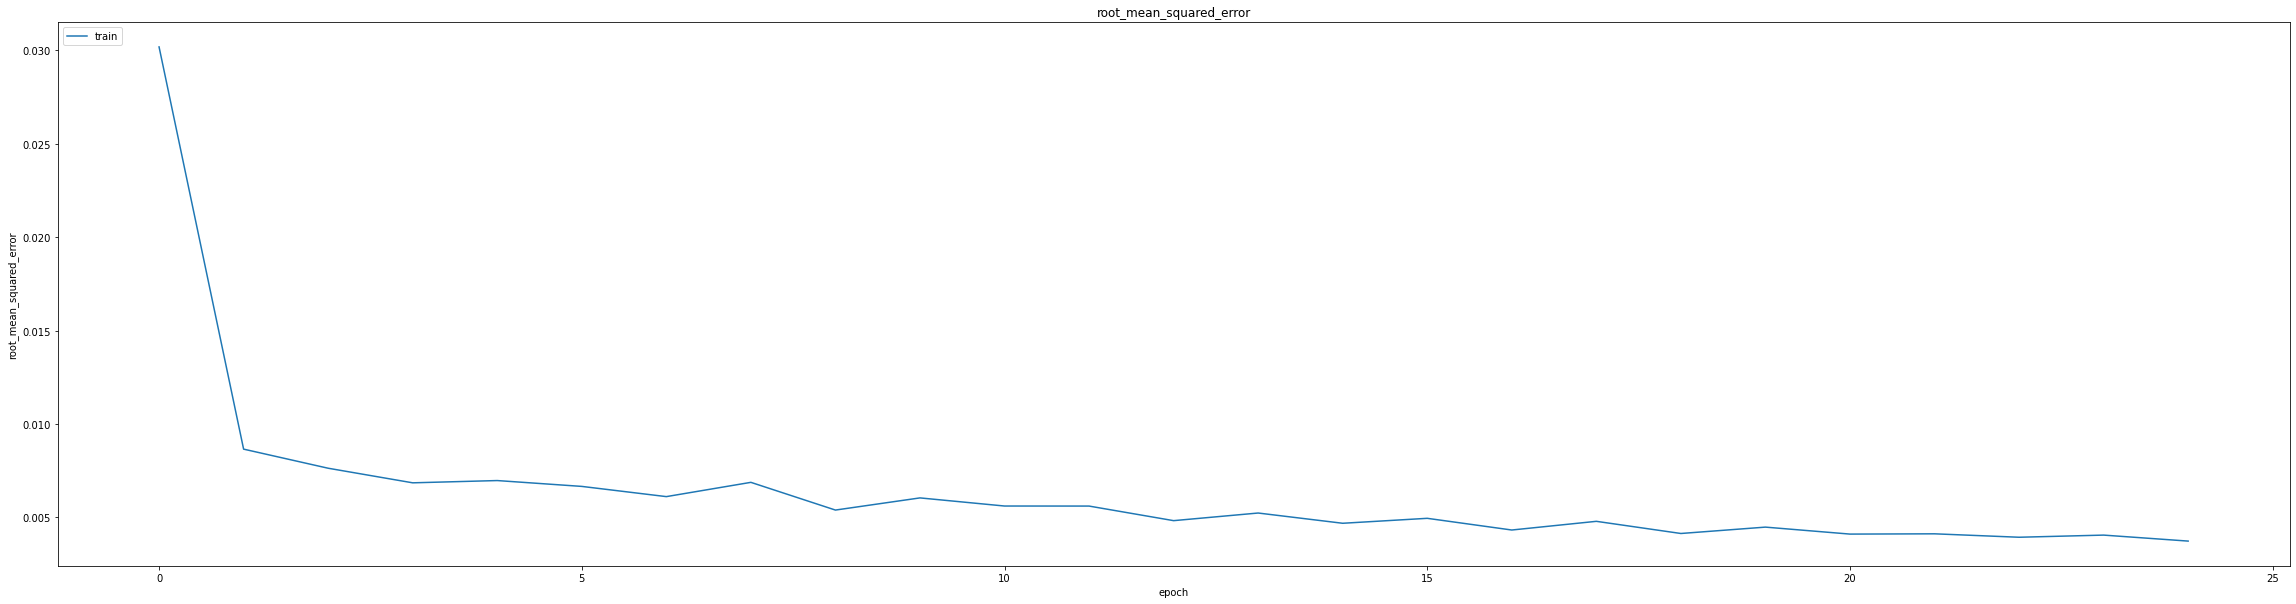

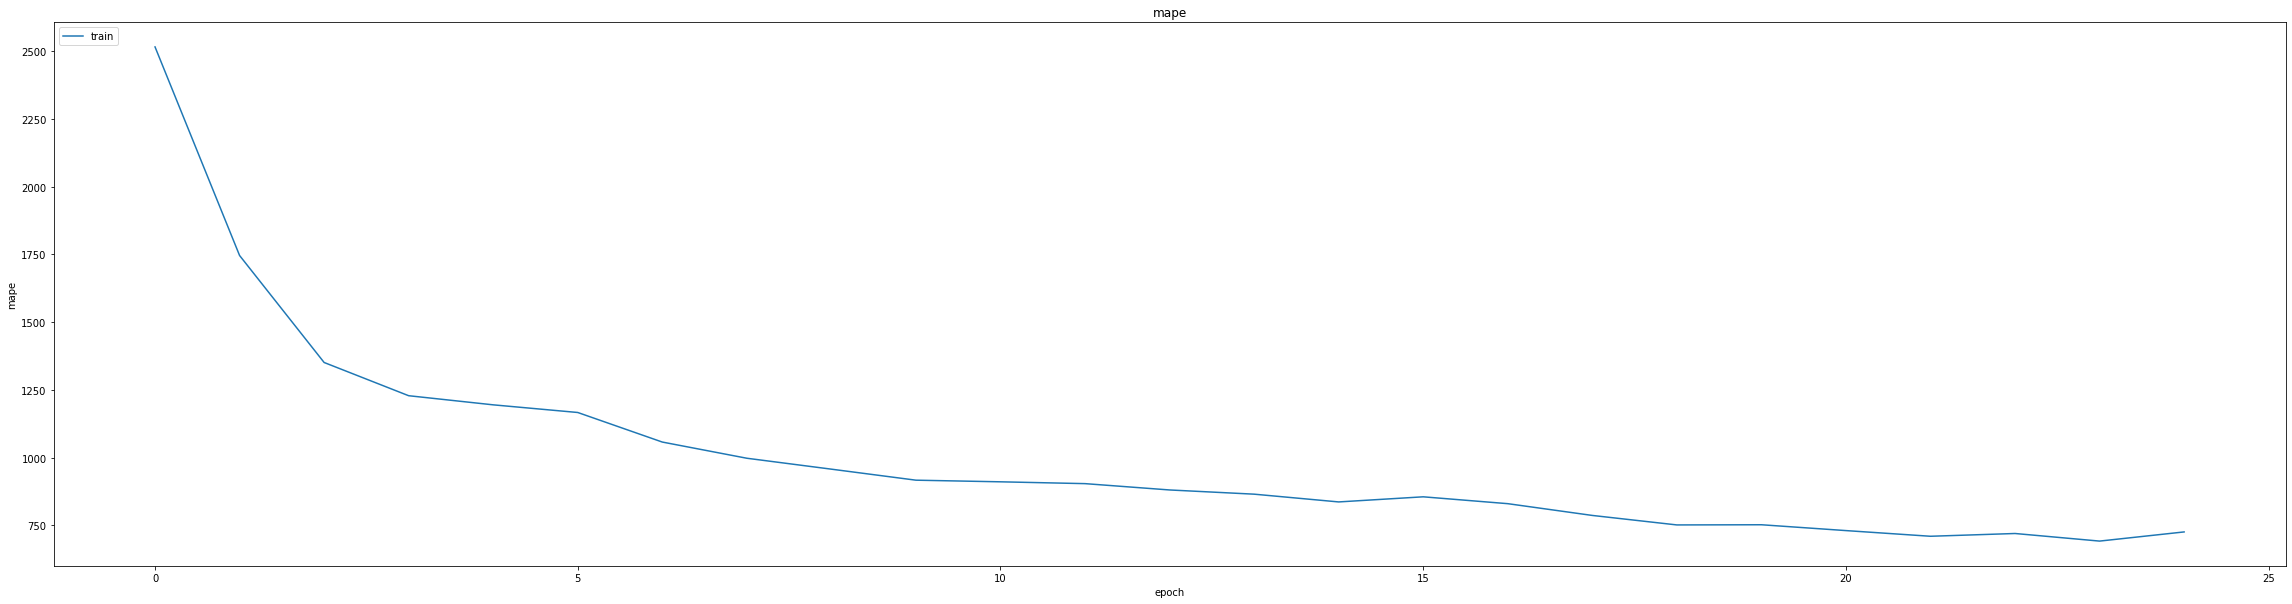

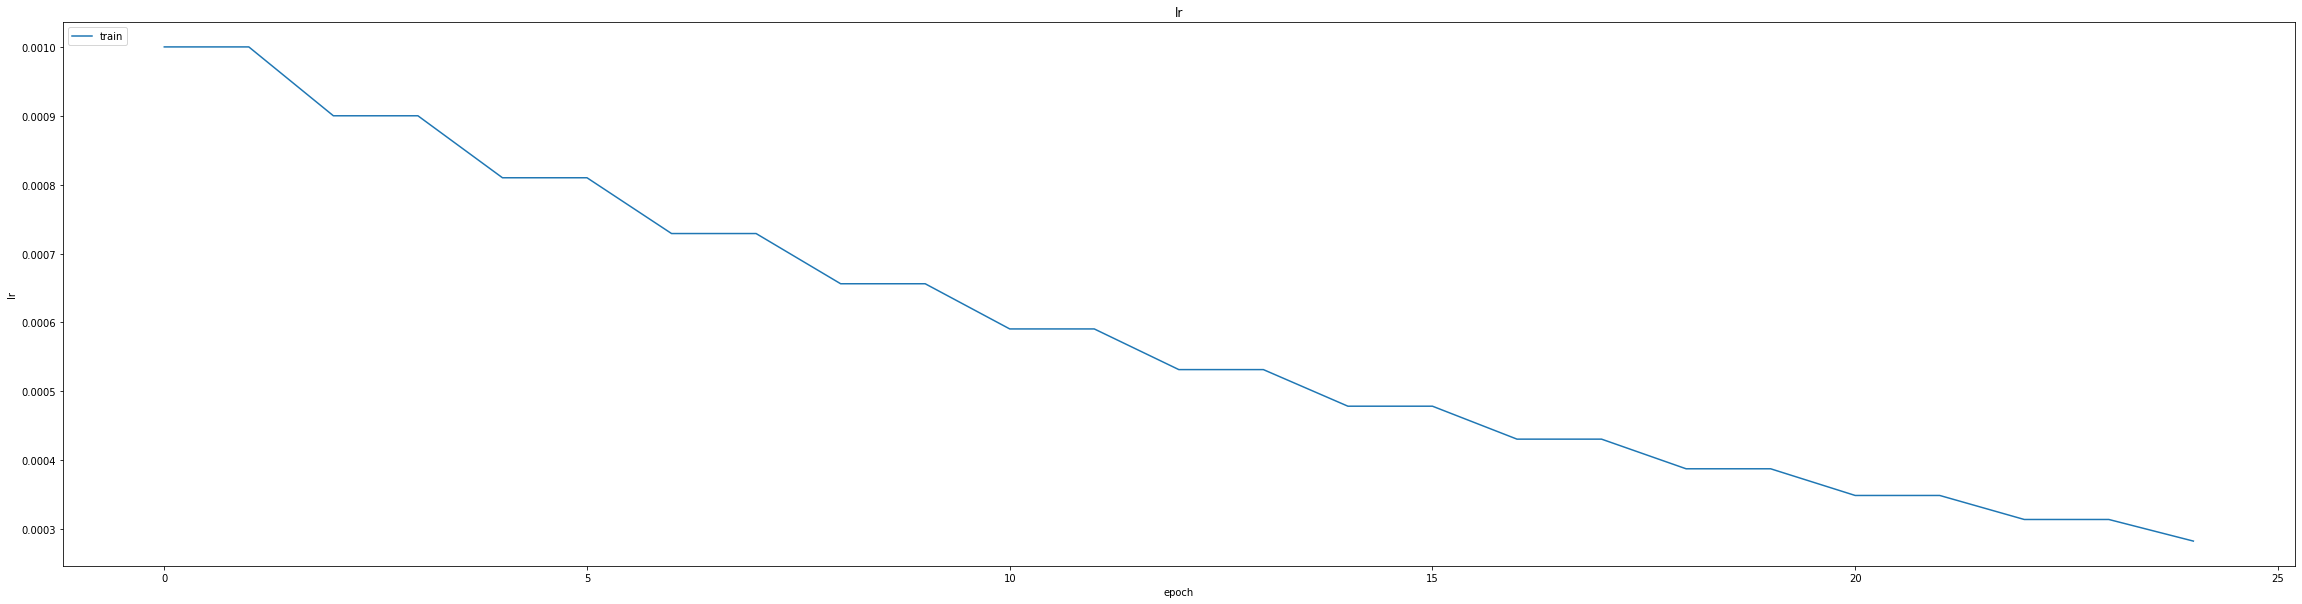

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03199414536356926
0.03864390775561333
234/234 [==============================] - 10s 36ms/step
0.9663025295185337


234/234 [==============================] - 8s 33ms/step


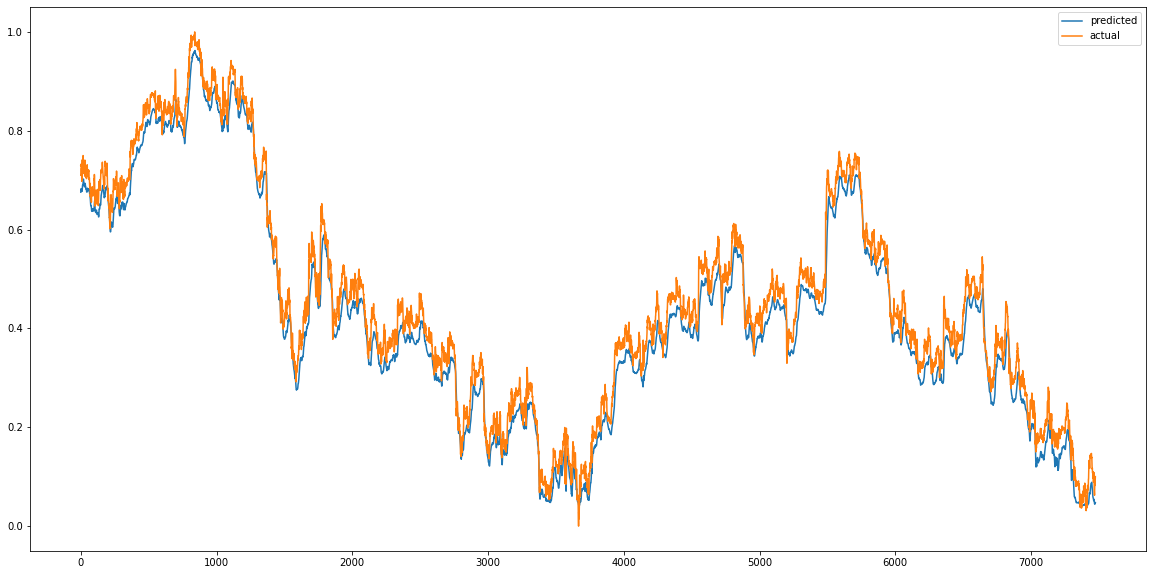

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


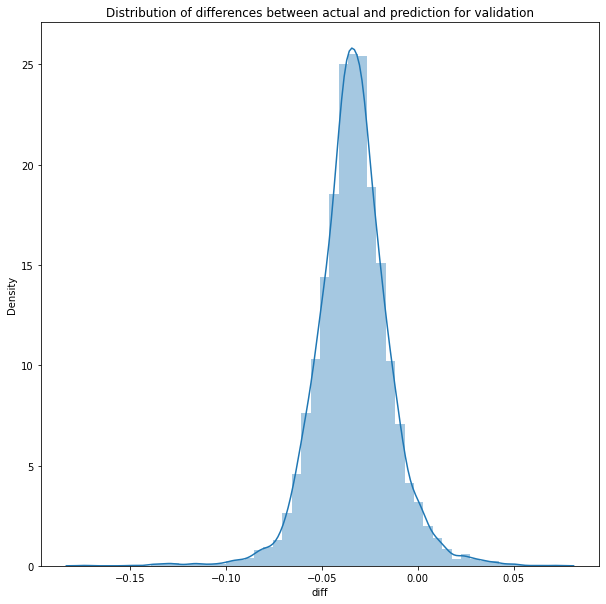

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 8s 34ms/step


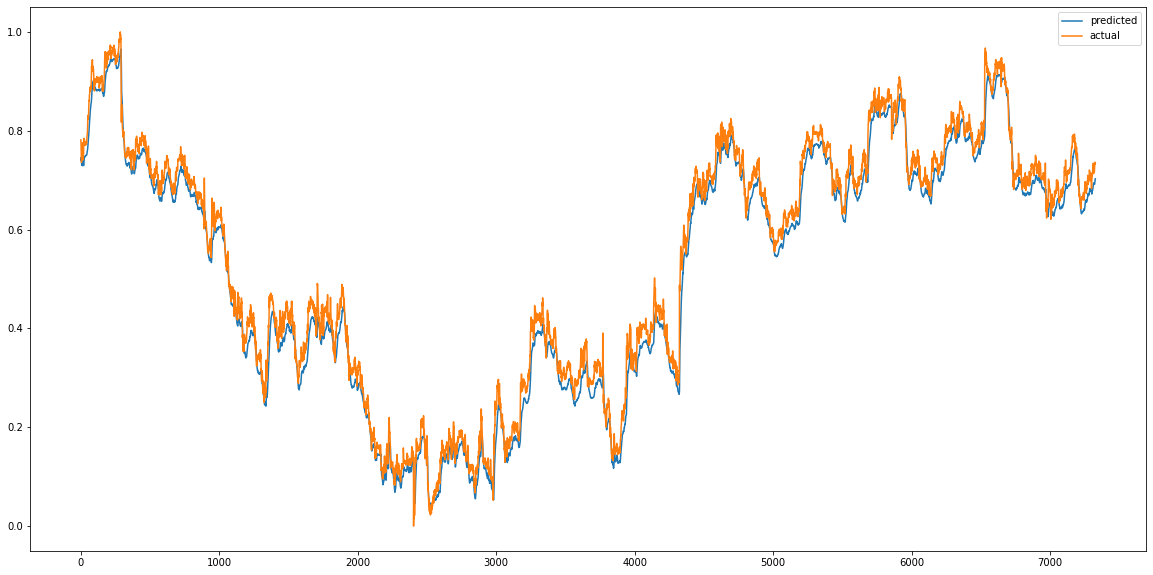

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


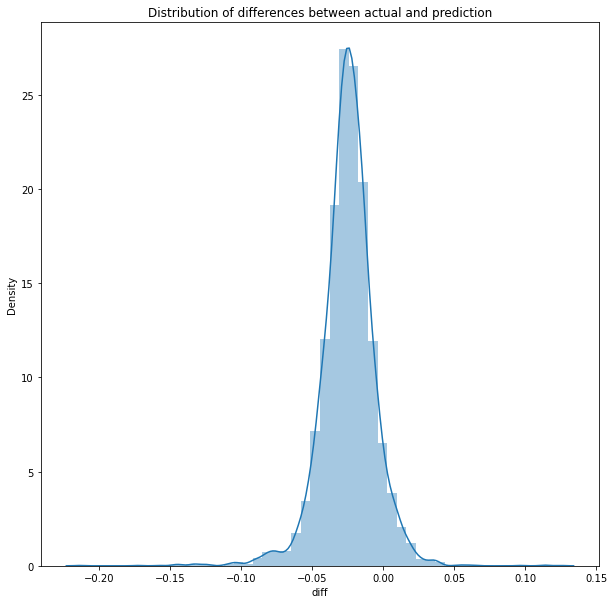

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0009786471412773531
MAE :  0.02644554980966588
RMSE  : 0.031283336479304015
229/229 [==============================] - 8s 34ms/step
R2_Score  : 0.9842587027856486


count    7327.000000
mean       -0.024894
std         0.018947
min        -0.213559
25%        -0.034092
50%        -0.024465
75%        -0.014653
max         0.124304
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 365.4096 - mae: 2.9995 - mse: 365.4096 - root_mean_squared_error: 19.1157 - mape: 15929.7754
Epoch 1: val_mse improved from inf to 0.09356, saving model to weights.best.hdf5
464/464 [==============================] - 141s 290ms/step - loss: 365.4096 - mae: 2.9995 - mse: 365.4096 - root_mean_squared_error: 19.1157 - mape: 15929.7754 - val_loss: 0.0936 - val_mae: 0.2675 - val_mse: 0.0936 - val_root_mean_squared_error: 0.3059 - val_mape: 89738.8594
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0293 - mae: 0.1303 - mse: 0.0293 - root_mean_squared_error: 0.1711 - mape: 10947.7695
Epoch 2: val_mse improved from 0.09356 to 0.09104, saving model to weights.best.hdf5
464/464 [==============================] - 134s 288ms/step - loss: 0.0293 - mae: 0.1303 - mse: 0.0293 - root_mean_squared_error: 0.1711 - mape: 10947.7695 - val_loss: 0.0910 - val_mae: 0.2640 - val_mse: 0.0910 - val_root_mean_squared_err

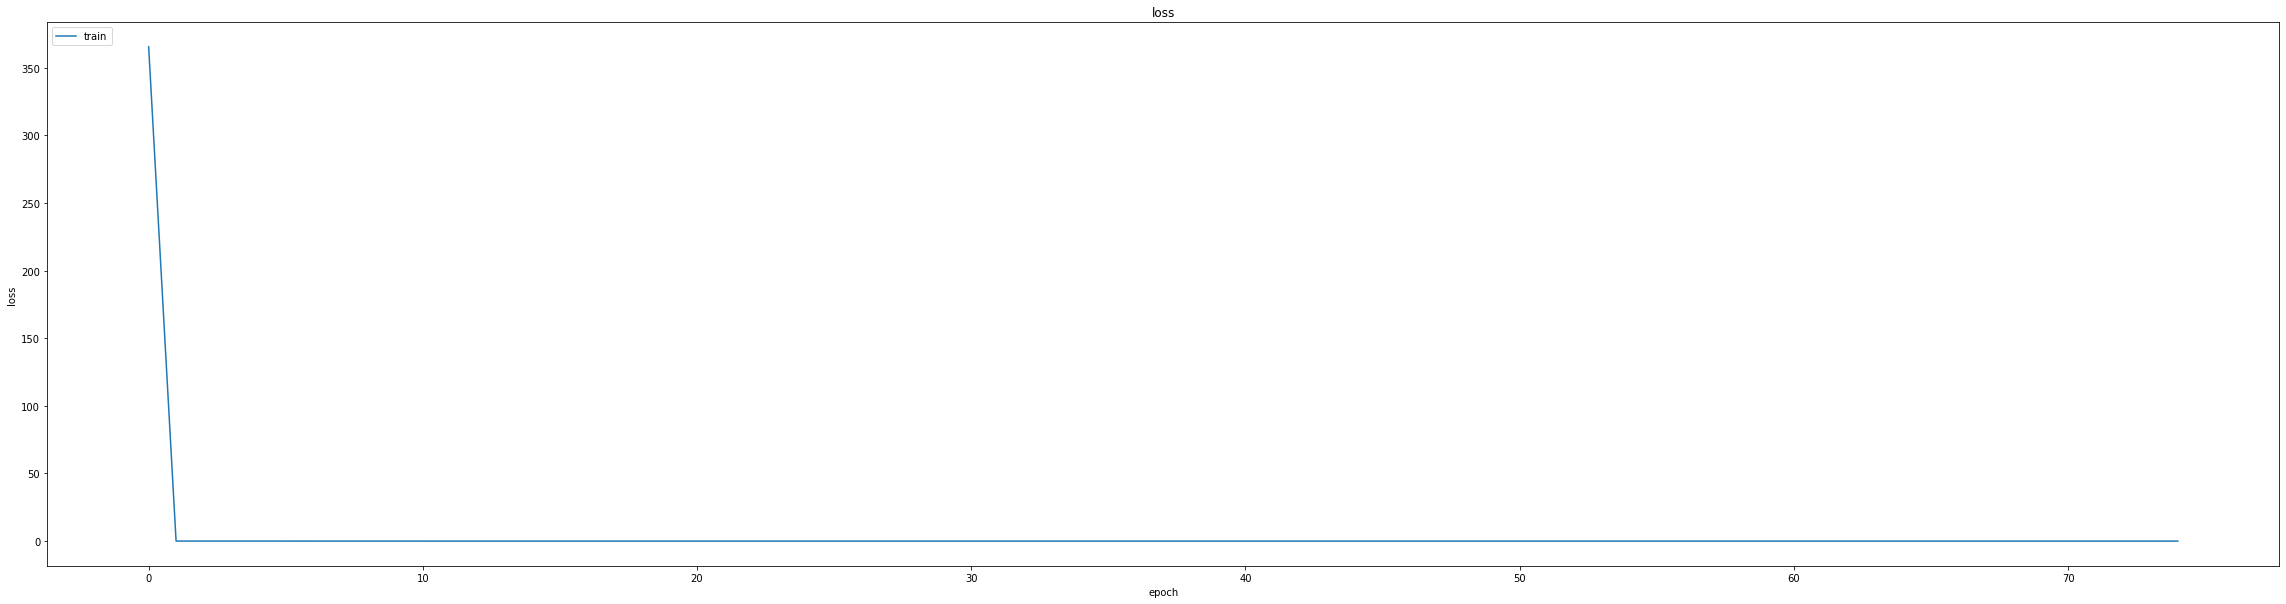

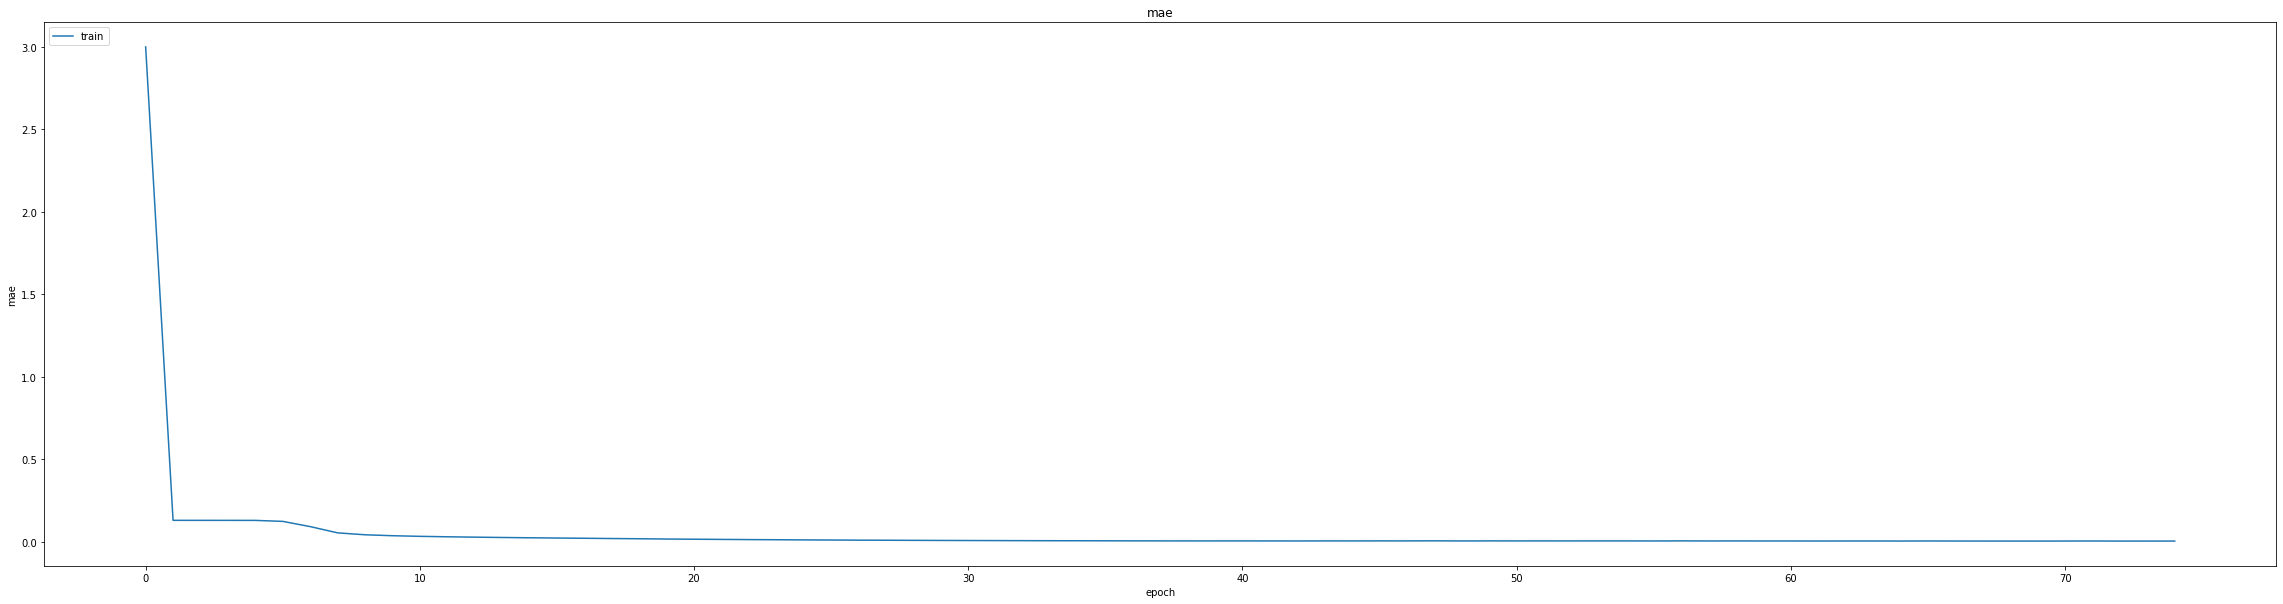

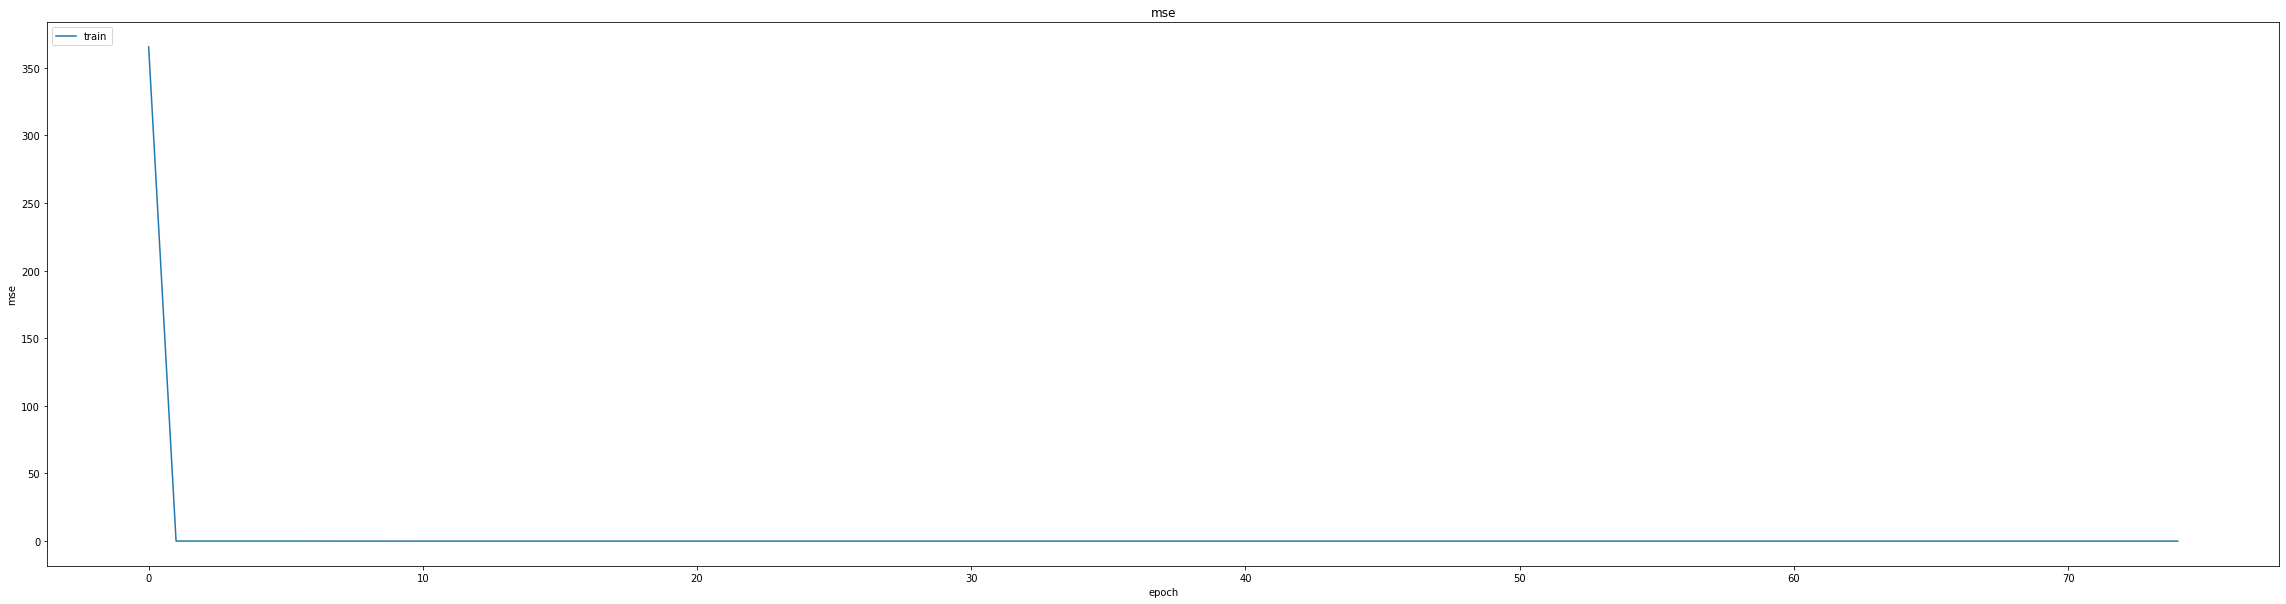

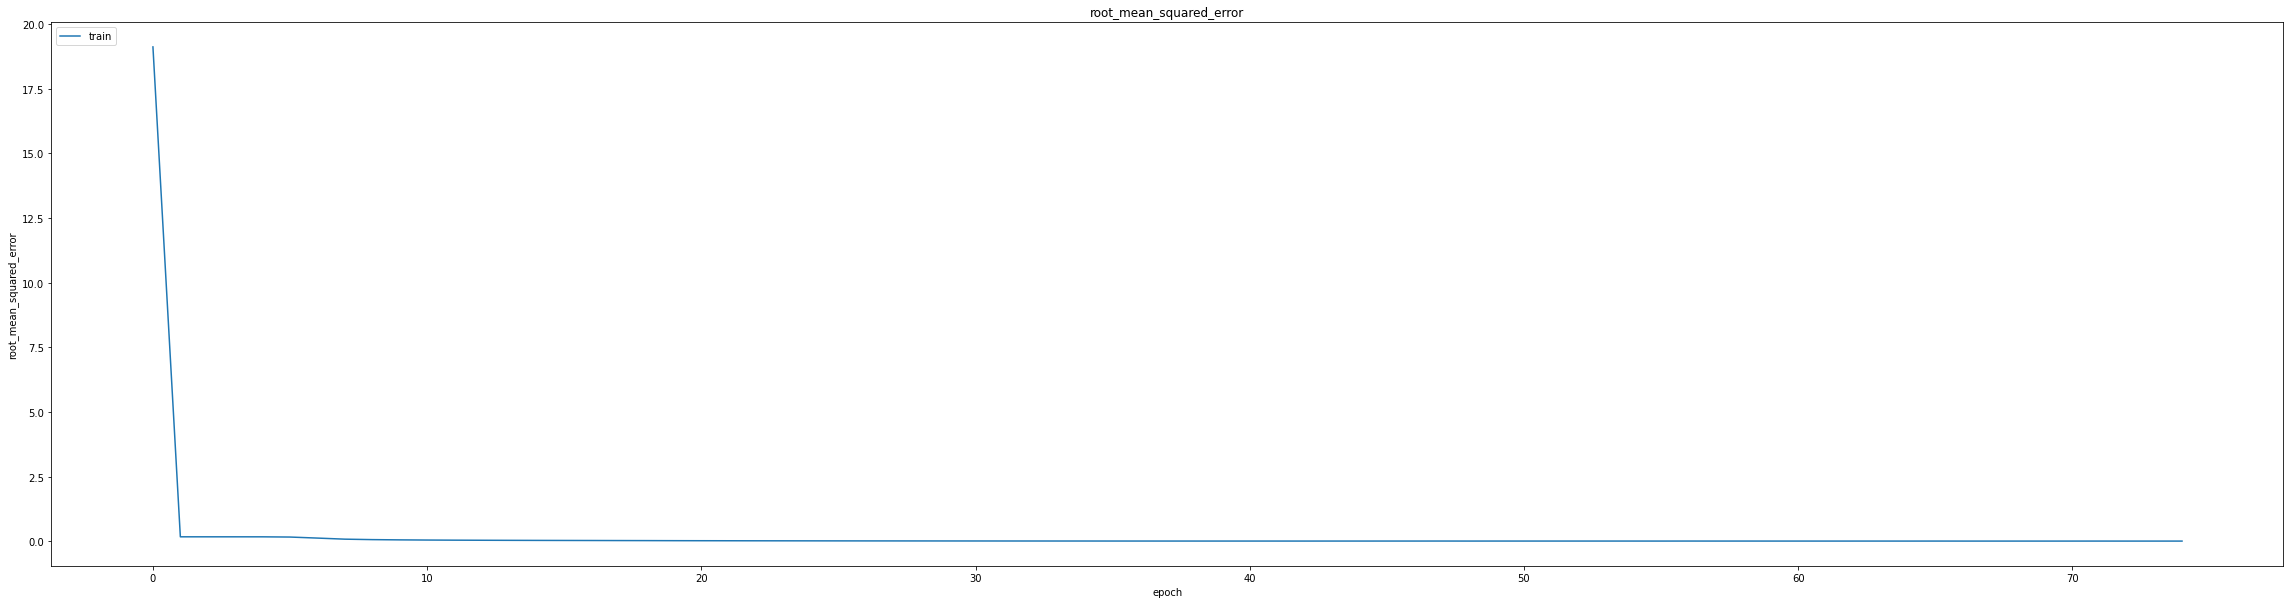

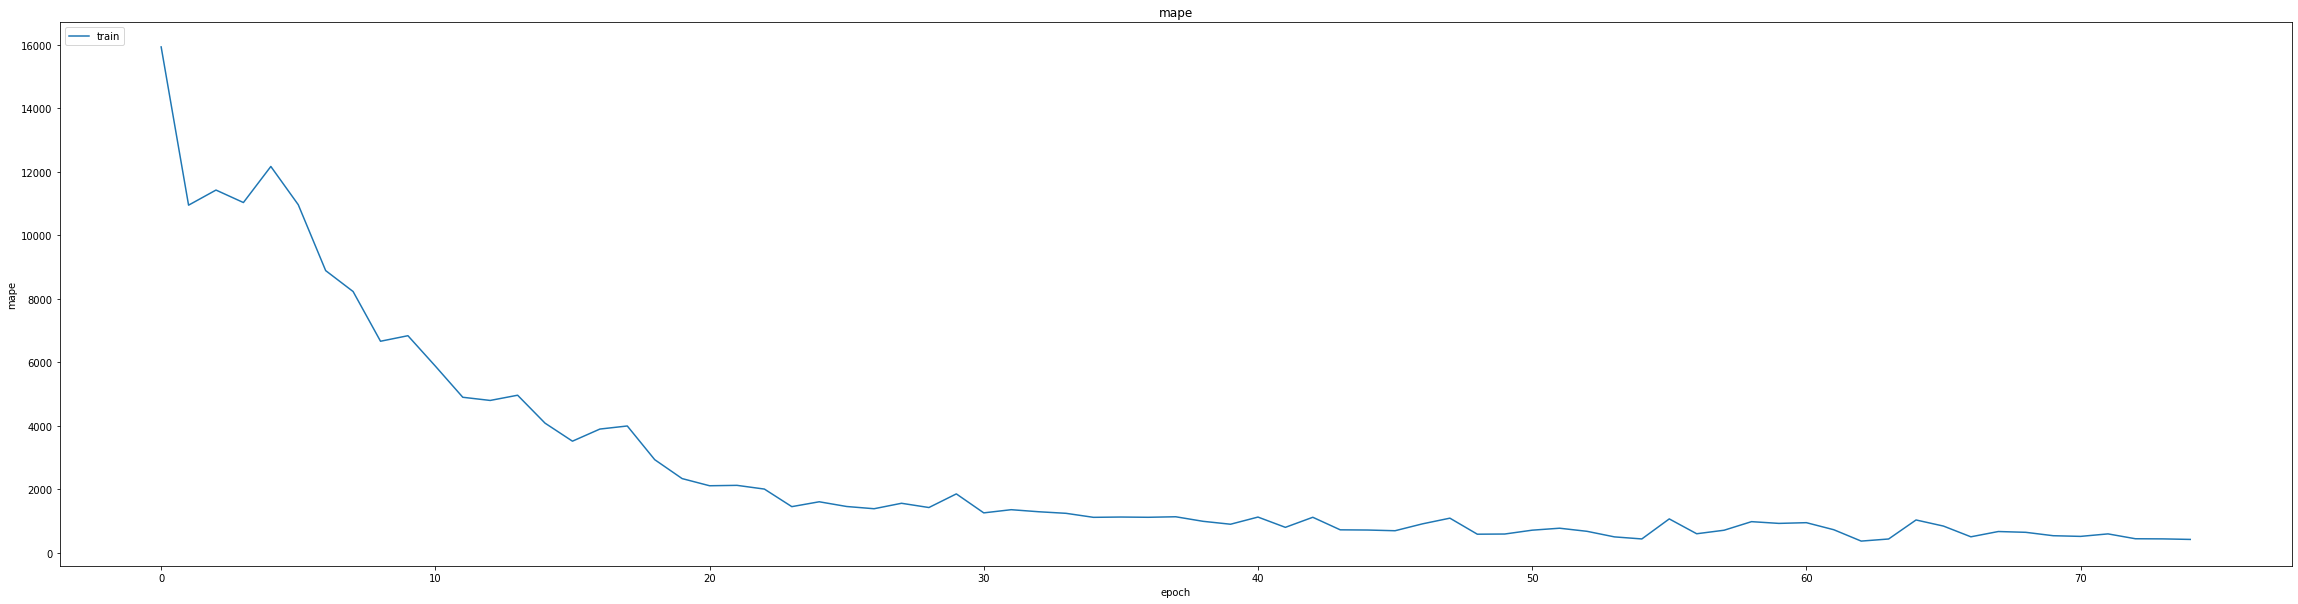

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.045367419719696045
0.0502459816634655
234/234 [==============================] - 15s 53ms/step
0.9323642743239072


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

In [ ]:
Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 2.8295e-04 - mae: 0.0075 - mse: 2.8295e-04 - root_mean_squared_error: 0.0168 - mape: 1132.9020
Epoch 1: val_mse did not improve from 0.00252
464/464 [==============================] - 150s 313ms/step - loss: 2.8295e-04 - mae: 0.0075 - mse: 2.8295e-04 - root_mean_squared_error: 0.0168 - mape: 1132.9020 - val_loss: 0.0036 - val_mae: 0.0550 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0596 - val_mape: 6896.9595 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 2.8229e-05 - mae: 0.0040 - mse: 2.8229e-05 - root_mean_squared_error: 0.0053 - mape: 730.7280
Epoch 2: val_mse did not improve from 0.00252
464/464 [==============================] - 148s 318ms/step - loss: 2.8229e-05 - mae: 0.0040 - mse: 2.8229e-05 - root_mean_squared_error: 0.0053 - mape: 730.7280 - val_loss: 0.0036 - val_mae: 0.0549 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0596 - val_mape: 8856.2148 - lr: 0.0010


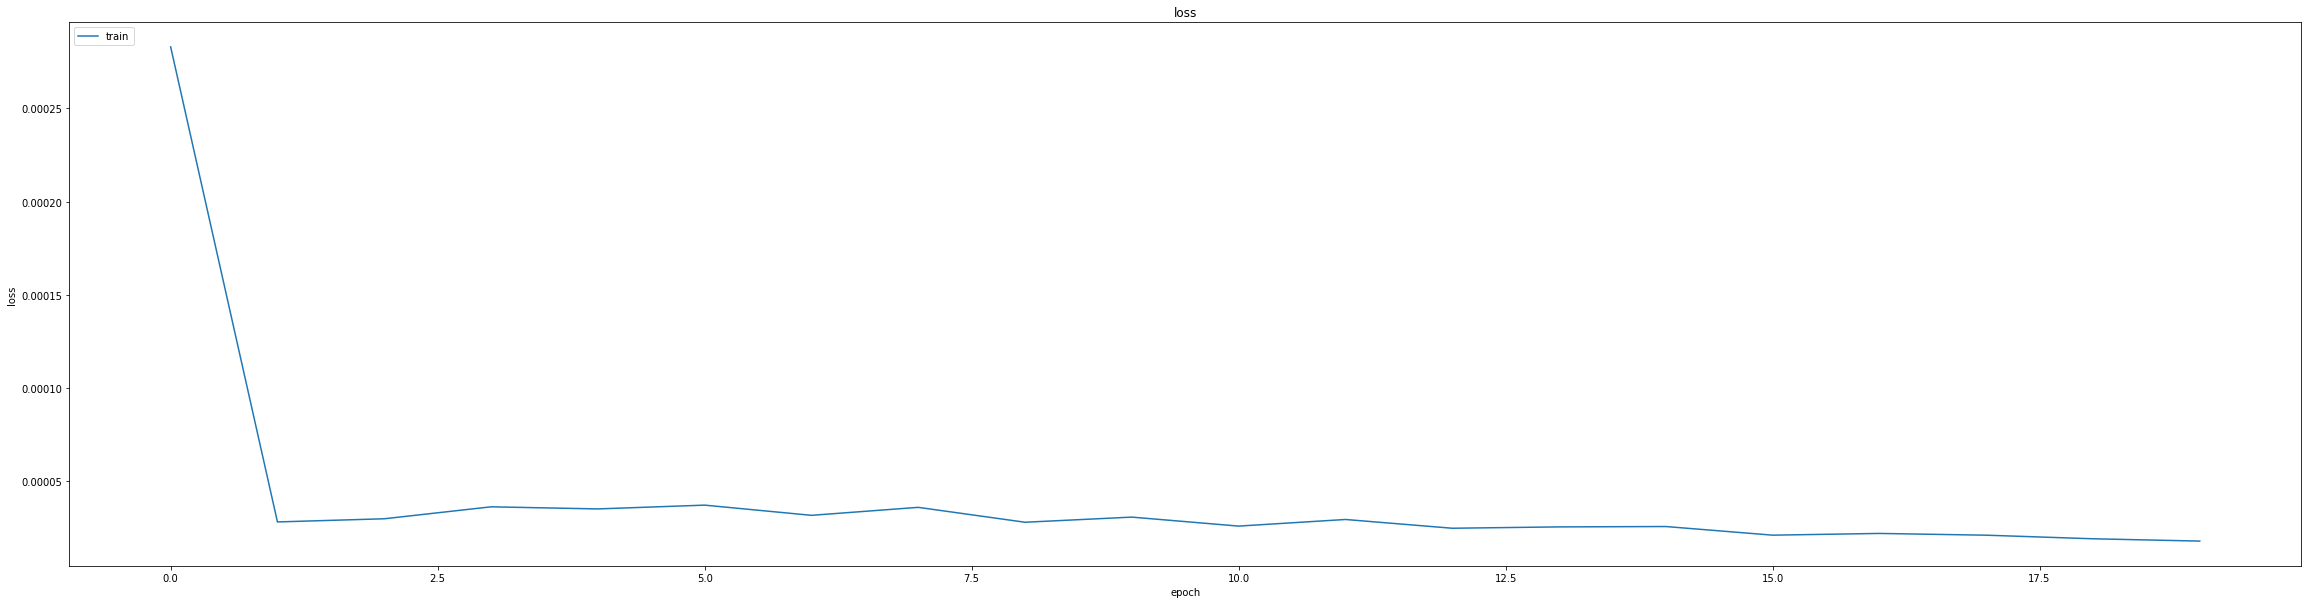

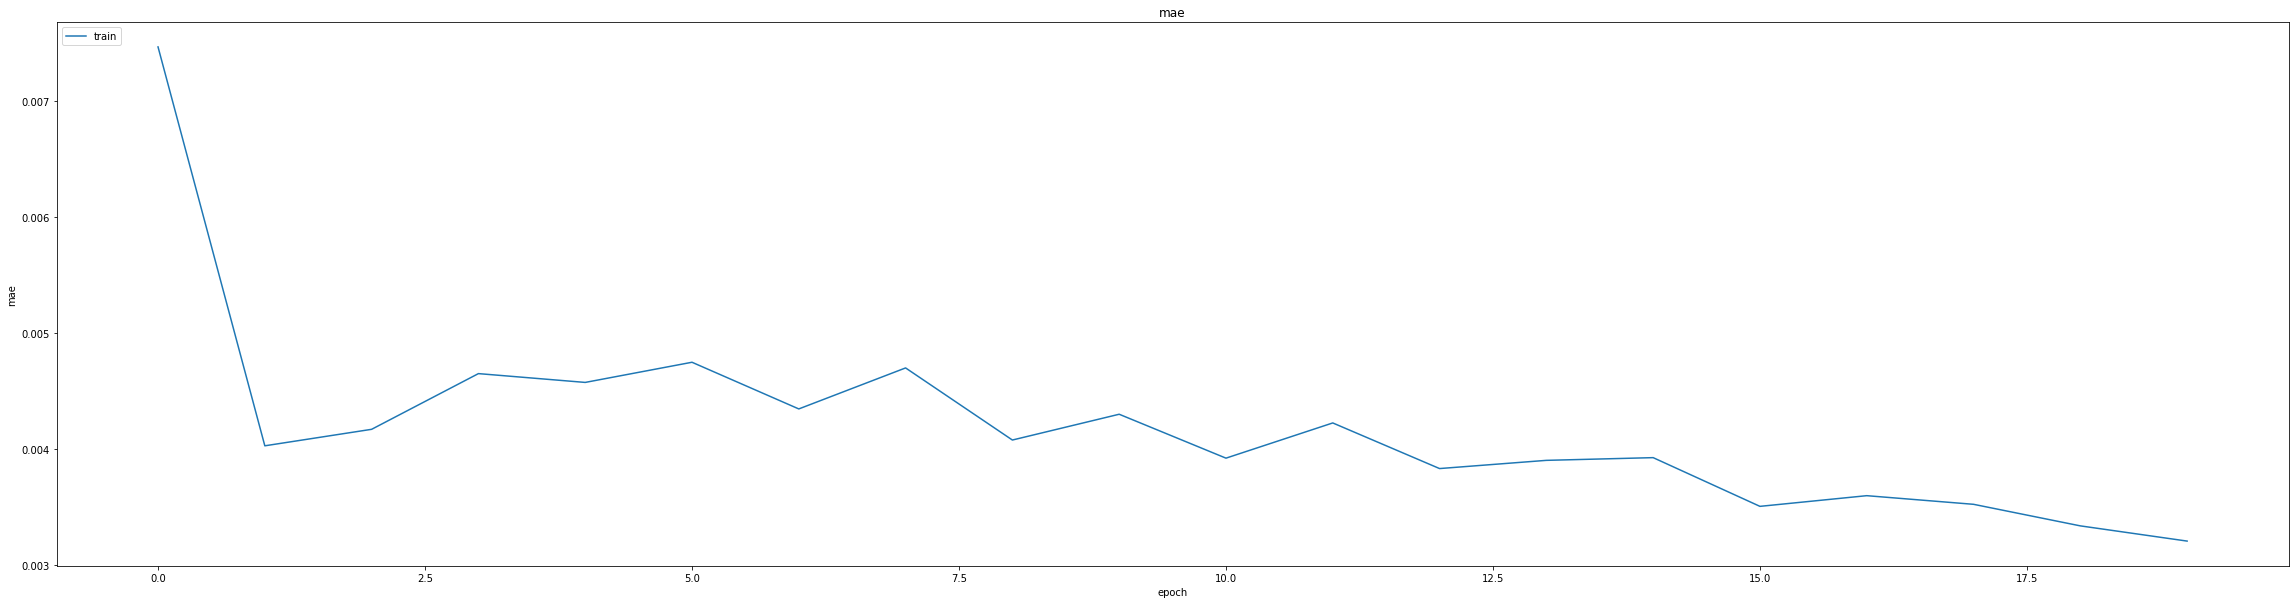

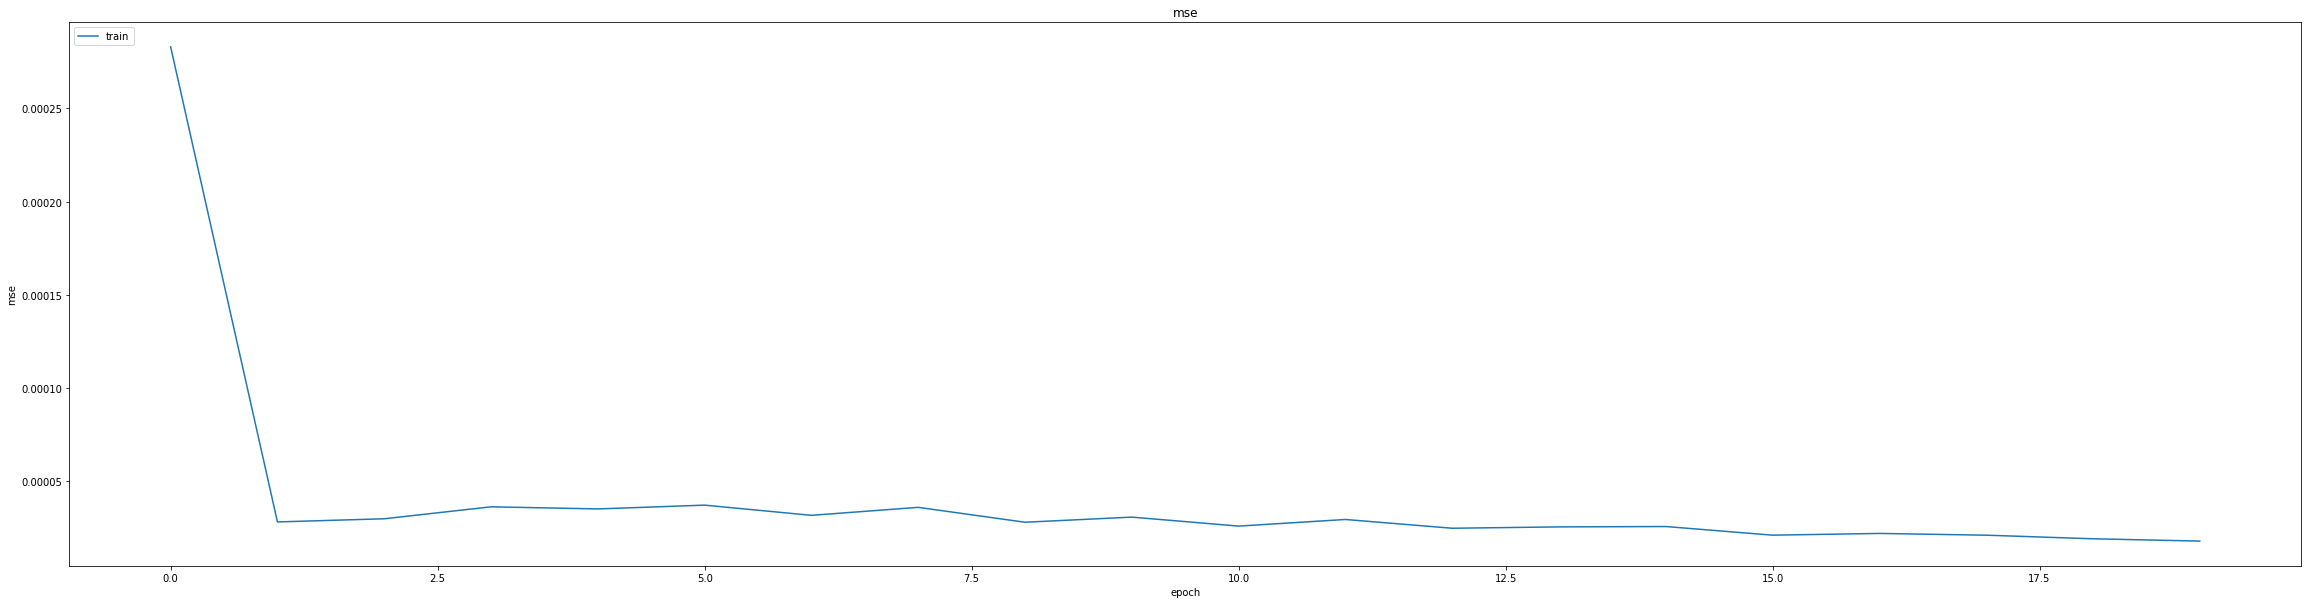

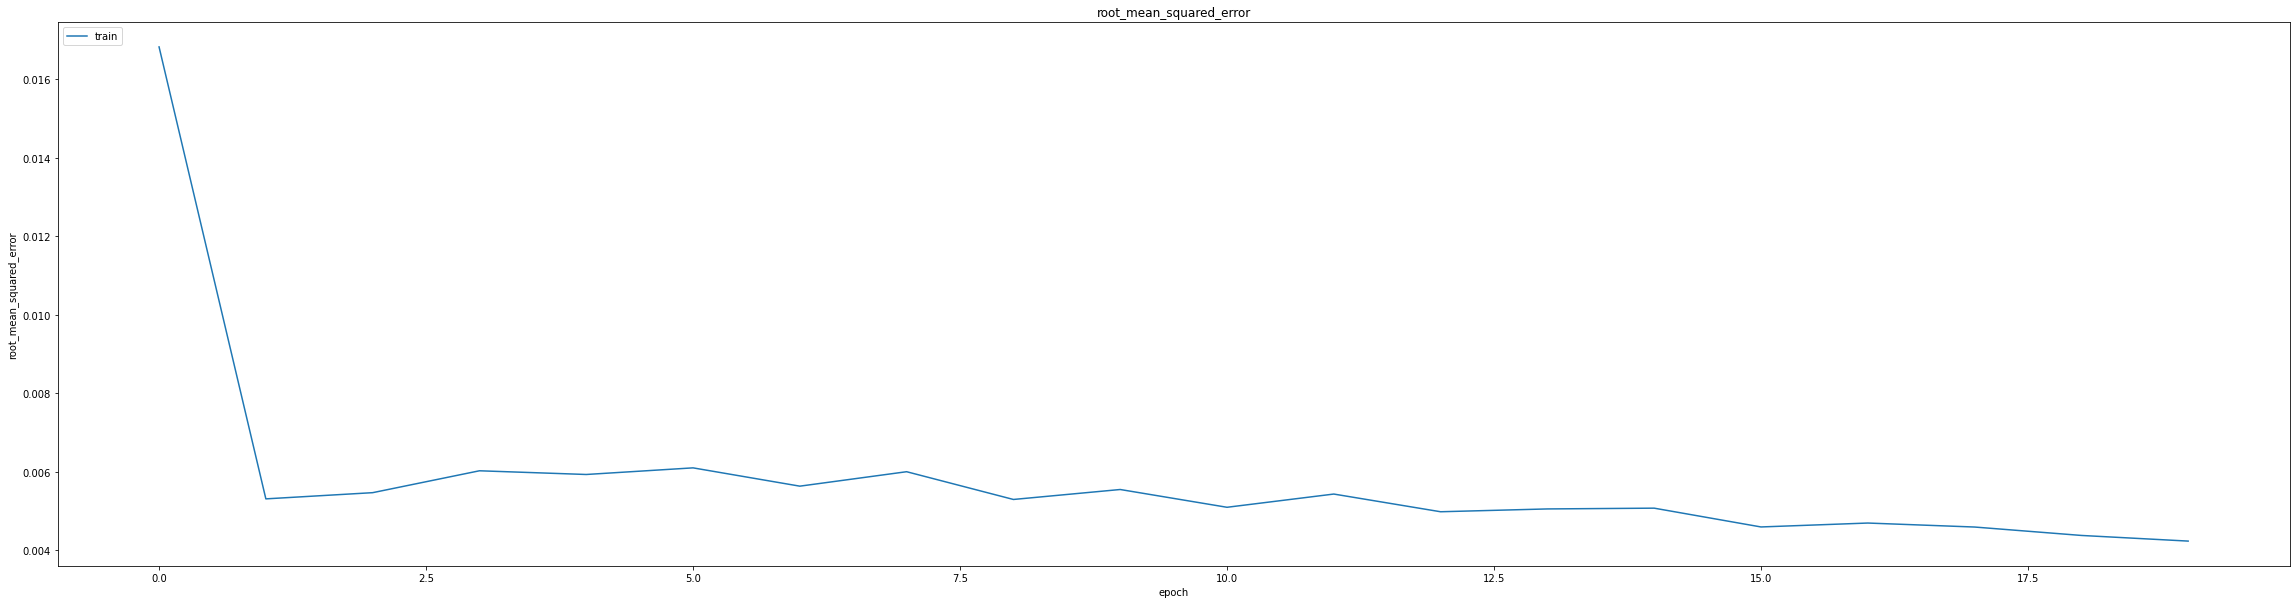

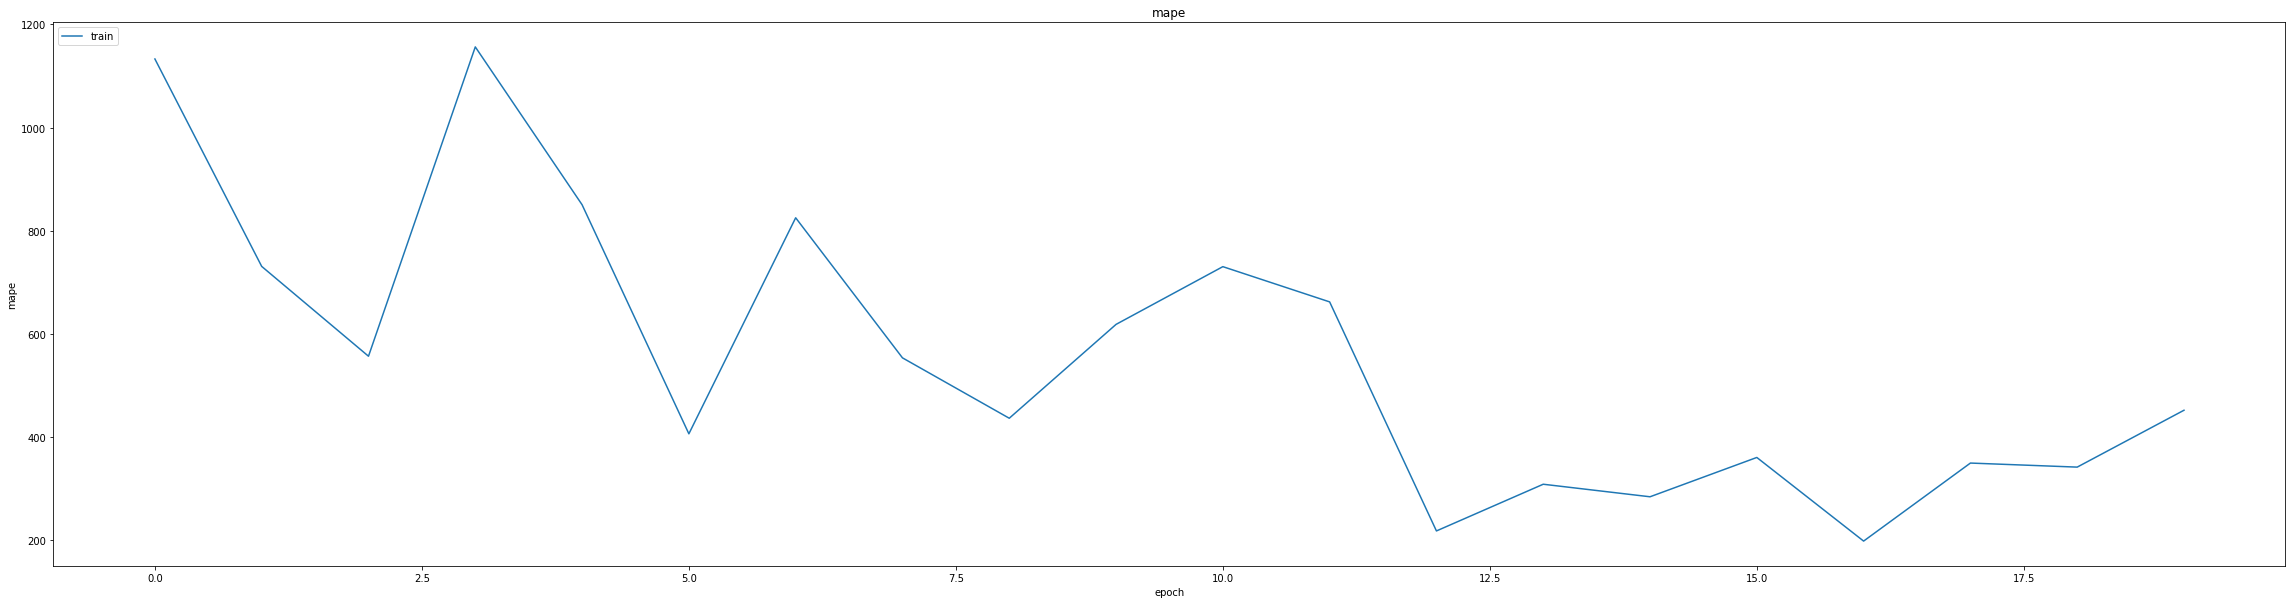

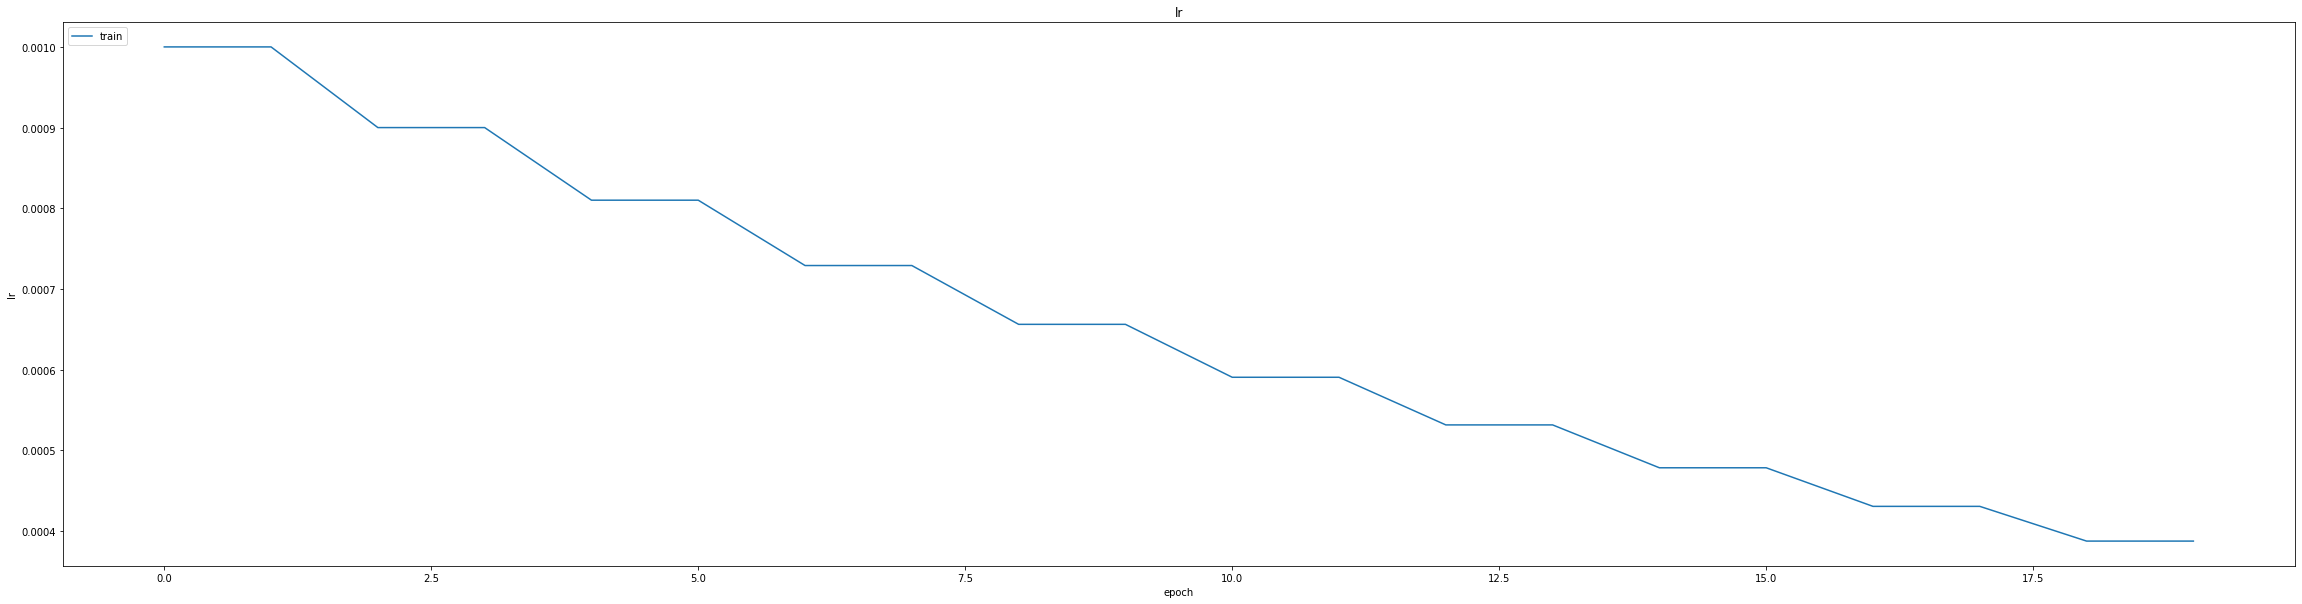

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.043422091752290726
0.048821743577718735
234/234 [==============================] - 13s 48ms/step
0.9322545700489542


In [ ]:
model.load_weights("weights.best.hdf5")

234/234 [==============================] - 15s 63ms/step


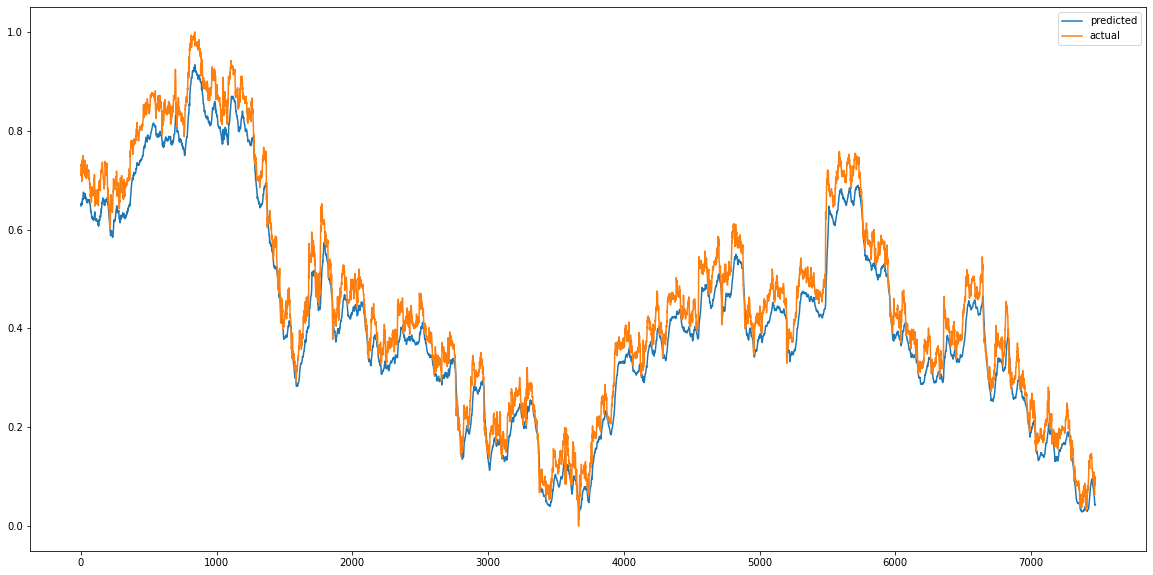

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


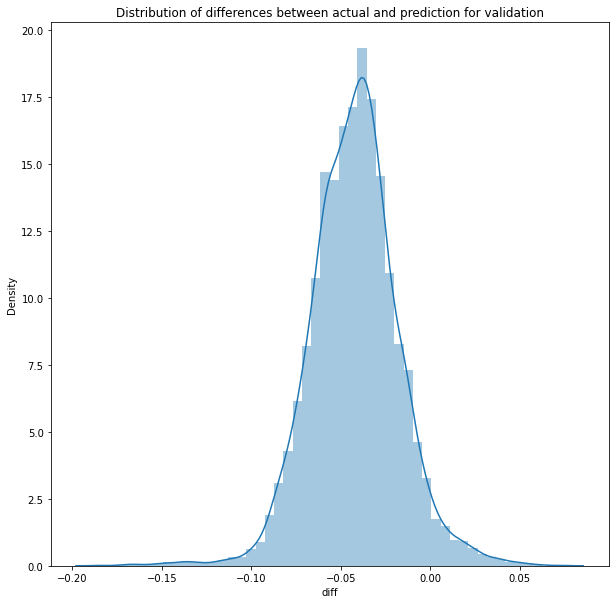

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 11s 49ms/step


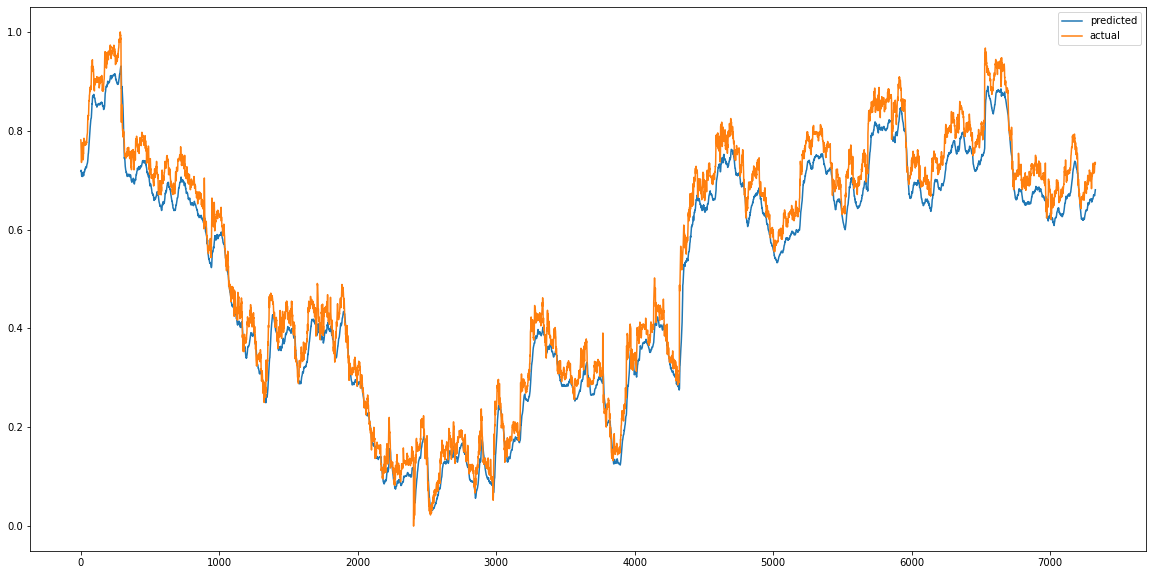

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


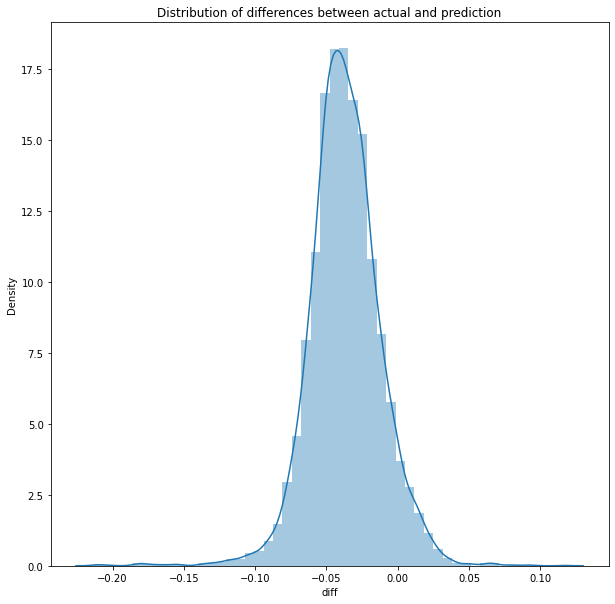

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print(test_r2_scr)
predictions['diff'].describe()

MSE :  0.0019873458217930934
MAE :  0.038708717403754186
229/229 [==============================] - 19s 83ms/step
0.9680340340296671


count    7327.000000
mean       -0.036892
std         0.025028
min        -0.212994
25%        -0.051472
50%        -0.037863
75%        -0.022487
max         0.117450
Name: diff, dtype: float64